In [1]:
from PIL import Image, ImageDraw, ImageFont
#from lungmask import mask     
import SimpleITK as sitk
import numpy as np
#import segmentationtodicomrt as rt
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
def isBoarder(i,j,val,num):
    if num[i,j]==val and sum(sum(num[i-1:i+2,j-1:j+2]==val))<9:
        isBoarder=True
    else:
        isBoarder=False
    return isBoarder

In [97]:
def BorderAlphabet2Numpy(path,file_name,region_number):
    #ds = dicom.read_file(path+'mask/'+file_name, force=True)
    print(path+'TextImage/'+file_name)
    img=Image.open(path+'TextImage/'+file_name)
    img2 = img.convert("P")

    #img2 = Image.open(fname).convert('L')
    #img2 = np.asarray(img2)
    labeled, nr_objects = ndimage.label(img2) 

    plt.imshow(img2)

    Nimg=np.logical_not(img2)
    #Nimg=Nimg[:,:,0]

    plt.imshow(Nimg)

    l1, nr_objects = ndimage.label(Nimg) 
    print("Number of objects is {}".format(nr_objects))
    # Number of objects is 4 
    nl=(l1>1)
    l2=nl*np.ones(l1.shape)
    l3=l2*l1
    l4=l3+nl*np.ones(l1.shape)*(labeled.max()-1)
    plt.imshow(l4)

    l_all=labeled+l4
    plt.imshow(l_all)    

    num = np.array(l_all)   

    print('number of objects',int(l_all.max()))
    
    (bi,bj)=num.shape
    #print(bi,bj)
    # Find Border pixels of each region
    #for region_number in range(2):
    val=region_number
    fi=-1
    fj=-1
    sw=False
    for i in range(bi):
        if sw:
            #print('break')
            break
        for j in range(bj):
            #print(i,j,num[i,j])
            if num[i,j]==val:
                fi=i
                fj=j
                #print(i,j,num[i,j])
                sw=True
                break
    i=fi
    j=fj
    print('initial points',i,j,num[i,j])
    print('val:',val)
    print(np.sum(num==val))
    # Create numpy array of borders cordinations 
    meet=np.zeros(num.shape)
    li=i
    lj=j
    #meet[i,j]=0
    borders=[]
    a=1
    while a<2000:
        borders.append([i,j])
        i=li
        j=lj
        a=a+1
        print(a)
        if num[i+1,j]==val and isBoarder(i+1,j,val,num) and not meet[i+1,j]:
            li=i+1
            lj=j
            print(li,lj,num[li,lj])
            meet[li,lj]=a

        elif num[i+1,j+1]==val and isBoarder(i+1,j+1,val,num) and not meet[i+1,j+1]:
            li=i+1
            lj=j+1
            print(li,lj,num[li,lj])
            meet[li,lj]=a
        elif num[i,j+1]==val and isBoarder(i,j+1,val,num)and not meet[i,j+1]:
            li=i
            lj=j+1
            print(li,lj,num[li,lj])
            meet[li,lj]=a
        elif num[i-1,j+1]==val and isBoarder(i-1,j+1,val,num)and not meet[i-1,j+1]:
            li=i-1
            lj=j+1
            print(li,lj,num[li,lj])
            meet[li,lj]=a

        elif num[i-1,j]==val and isBoarder(i-1,j,val,num)and not meet[i-1,j]:
            li=i-1
            lj=j
            print(li,lj,num[li,lj])
            meet[li,lj]=a

        elif num[i+1,j-1]==val and isBoarder(i+1,j-1,val,num)and not meet[i+1,j-1]:
            li=i+1
            lj=j-1
            print(li,lj,num[li,lj])
            meet[li,lj]=a
        elif num[i,j-1]==val and isBoarder(i,j-1,val,num)and not meet[i,j-1]:
            li=i
            lj=j-1
            print(li,lj,num[li,lj])
            meet[li,lj]=a
        elif num[i-1,j-1]==val and isBoarder(i-1,j-1,val,num)and not meet[i-1,j-1]:
            li=i-1
            lj=j-1
            print(li,lj,num[li,lj])
            meet[li,lj]=a
        if (li==i and lj==j):
            [i,j]=borders.pop(-1)
            num[i,j]=val+1
            if len(borders):
                [i,j]=borders.pop(-1)
            li=i
            lj=j
            print('------------------------a:',len(borders))
            print('Del-----',i,j)
        m=meet[li-1:li+2,lj-1:lj+2]
        print(a,m)
        if a>5 and np.sum((m<4) & (m>0)):
            li=fi
            lj=fj
            print (meet[li-1:li+1,lj-1:lj+1])
            print('++++++++++++++++++++++setting first point')
        if (fi==li and fj==lj and a>2 ):
            break
            
    borders.append([fi,fj])
    print('------------------------a:',a)
    # Shapenning borders pixels 
    for t in range(len(borders)):
        #print(t,borders[t])
        i=borders[t][0]
        j=borders[t][1]
        num[i,j]=100

    file_name=file_name.replace('mask-','') 
    file_name=file_name.replace('.png','.dcm')
    np.save(path+ 'borders/Border'+str(val+2)+'-'+file_name +'.npy', borders)
    print('Border'+str(val+2))

In [4]:
# Alphabet image
img = Image.new('RGB', (500, 80), color = (0, 0, 0))
     
fnt = ImageFont.truetype('Arial.ttf', 60) #'/Library/Fonts/'
d = ImageDraw.Draw(img)
d.text((0,0), "4", font=fnt, fill=(255, 255, 255))
     
img.save('/Users/Alireza/Desktop/mask/Mask-1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-45-6lmuab.png')

orgimage=img

In [46]:
if not 0 :
    print('--')

--


(80, 500)
Number of objects is 1


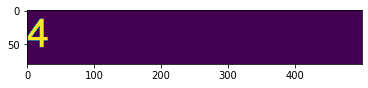

In [6]:

path='/Users/Alireza/Desktop/mask/'
name="Mask-1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-45-6lmuab.png"

fname=path+name


img = Image.open(fname).convert('L')
img = np.asarray(img)
print(img.shape)

# find connected components
labeled, nr_objects = ndimage.label(img) 
print("Number of objects is {}".format(nr_objects))
# Number of objects is 4 

plt.imshow(labeled)
plt.imsave('/Users/Alireza/Desktop/mask/'+name, labeled)
plt.show()


In [22]:
img[32,11]

101

In [27]:
np.max(Nimg)

255

In [7]:
def Text2Mask(path,name):
    fname=path+'TextImage/'+name

    img = Image.open(fname).convert('L')
    img = np.asarray(img)

    # find connected components
    labeled, nr_objects = ndimage.label(img) 
    
    #print("Number of objects is {}".format(nr_objects))
    # Number of objects is 4 

    plt.imshow(labeled)
    #name=name.replace('.png','.dcm')
    plt.imsave(path+'mask/Text-'+name, labeled)    
    return(nr_objects)

In [8]:
#New one
def Text2Mask(path,name):
    fname=path+'TextImage/'+name

    img = Image.open(fname).convert('L')
    img = np.asarray(img)

    # find connected components
    labeled, nr_objects = ndimage.label(img) 
    plt.imshow(labeled)
    
    Nimg=np.logical_not(img)
    #Nimg=Nimg[:,:,0]
    
    plt.imshow(Nimg)
    
    l1, nr_objects = ndimage.label(Nimg) 
    print("Number of objects is {}".format(nr_objects))
    # Number of objects is 4 
    nl=(l1>1)
    l2=nl*np.ones(l1.shape)
    l3=l2*l1
    l4=l3+nl*np.ones(l1.shape)*(labeled.max()-1)
    plt.imshow(l4)
    
    l_all=labeled+l4
    plt.imshow(l_all)    
    #name=name.replace('.png','.dcm')
    plt.imsave(path+'mask/Text-'+name, l_all)    
    return(int(l_all.max()))

In [9]:
def Text2Image(strText,path,name):
    # Alphabet image
    img = Image.new('RGB', (500, 80), color = (0, 0, 0))

    fnt = ImageFont.truetype('Arial.ttf', 60) #'/Library/Fonts/'
    d = ImageDraw.Draw(img)
    d.text((0,0), strText, font=fnt, fill=(255, 255, 255))

    img.save(path+'TextImage/'+name)

In [102]:
def TextImage2NumpyArray(path):
    import os
    import pydicom as dicom
    from matplotlib import pyplot as plt

    arr_aplphabet='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    files = os.listdir(path+'dicom')
    for i,name in enumerate(files):
        name=files[i]
        if name.find('.dcm')>=0:
            fpath=path+'DICOM/'+name
            ds = dicom.read_file(fpath, force=True)
            
            strText=' ' + str(ds.InstanceNumber)
            
            strText=arr_aplphabet[int(ds.InstanceNumber)%len(arr_aplphabet)]
#            strText='4'
            
            print(strText,name)
            name=name.replace('.dcm','.png')
            Text2Image(strText,path,name)
            nr=Text2Mask(path,name)
            print(name)
            print("Number of objects :",nr)
            for j in range(nr):
                rn=j+1
                print('Boarder number:',rn)
                BorderAlphabet2Numpy(path,name,rn)

5 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-5-6lk8ut.dcm
Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-5-6lk8ut.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-5-6lk8ut.png
Number of objects is 1
number of objects 1
initial points 13 7 1.0
val: 1
572
2
14 7 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
15 7 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
16 7 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
17 7 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
18 6 1.0
6 [[0. 0. 5.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
19 6 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
20 6 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
21 6 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
22 6 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
23 5 1.0
11 [[ 0.  0. 10.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
24 5 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.

23 10 1.0
164 [[  0.   0.   0.]
 [  0. 164.   0.]
 [  0. 163.   0.]]
165
22 10 1.0
165 [[  0.   0.   0.]
 [  0. 165.   0.]
 [  0. 164.   0.]]
166
21 10 1.0
166 [[  0.   0.   0.]
 [  0. 166.   0.]
 [  0. 165.   0.]]
167
20 11 1.0
167 [[  0.   0.   0.]
 [  0. 167.   0.]
 [166.   0.   0.]]
168
19 11 1.0
168 [[  0.   0.   0.]
 [  0. 168.   0.]
 [  0. 167.   0.]]
169
18 11 1.0
169 [[  0.   0.   0.]
 [  0. 169.   0.]
 [  0. 168.   0.]]
170
17 12 1.0
170 [[  0.   0.   0.]
 [  0. 170.   0.]
 [169.   0.   0.]]
171
17 13 1.0
171 [[  0.   0.   0.]
 [170. 171.   0.]
 [  0.   0.   0.]]
172
17 14 1.0
172 [[  0.   0.   0.]
 [171. 172.   0.]
 [  0.   0.   0.]]
173
17 15 1.0
173 [[  0.   0.   0.]
 [172. 173.   0.]
 [  0.   0.   0.]]
174
17 16 1.0
174 [[  0.   0.   0.]
 [173. 174.   0.]
 [  0.   0.   0.]]
175
17 17 1.0
175 [[  0.   0.   0.]
 [174. 175.   0.]
 [  0.   0.   0.]]
176
17 18 1.0
176 [[  0.   0.   0.]
 [175. 176.   0.]
 [  0.   0.   0.]]
177
17 19 1.0
177 [[  0.   0.   0.]
 [176. 177.   0.]
 

42 10 1.0
133 [[  0.   0.   0.]
 [  0. 133.   0.]
 [132.   0.   0.]]
134
41 11 1.0
134 [[  0.   0.   0.]
 [  0. 134.   0.]
 [133.   0.   0.]]
135
40 12 1.0
135 [[  0.   0.   0.]
 [  0. 135.   0.]
 [134.   0.   0.]]
136
39 13 1.0
136 [[  0.   0.   0.]
 [  0. 136.   0.]
 [135.   0.   0.]]
137
39 14 1.0
137 [[  0.   0.   0.]
 [136. 137.   0.]
 [  0.   0.   0.]]
138
38 15 1.0
138 [[  0.   0.   0.]
 [  0. 138.   0.]
 [137.   0.   0.]]
139
37 16 1.0
139 [[  0.   0.   0.]
 [  0. 139.   0.]
 [138.   0.   0.]]
140
36 17 1.0
140 [[  0.   0.   0.]
 [  0. 140.   0.]
 [139.   0.   0.]]
141
35 18 1.0
141 [[  0.   0.   0.]
 [  0. 141.   0.]
 [140.   0.   0.]]
142
34 19 1.0
142 [[  0.   0.   0.]
 [  0. 142.   0.]
 [141.   0.   0.]]
143
33 20 1.0
143 [[  0.   0.   0.]
 [  0. 143.   0.]
 [142.   0.   0.]]
144
32 21 1.0
144 [[  0.   0.   0.]
 [  0. 144.   0.]
 [143.   0.   0.]]
145
31 22 1.0
145 [[  0.   0.   0.]
 [  0. 145.   0.]
 [144.   0.   0.]]
146
30 23 1.0
146 [[  0.   0.   0.]
 [  0. 146.   0.]
 

39 3 1.0
130 [[  0.   0.   0.]
 [  0. 130.   0.]
 [  0. 129.   0.]]
131
38 3 1.0
131 [[  0.   0.   0.]
 [  0. 131.   0.]
 [  0. 130.   0.]]
132
37 3 1.0
132 [[  0.   0.   0.]
 [  0. 132.   0.]
 [  0. 131.   0.]]
133
37 2 1.0
133 [[  0.   0.   0.]
 [  0. 133. 132.]
 [  0.   0. 131.]]
134
36 2 1.0
134 [[  0.   0.   0.]
 [  0. 134.   0.]
 [  0. 133. 132.]]
135
35 2 1.0
135 [[  0.   0.   0.]
 [  0. 135.   0.]
 [  0. 134.   0.]]
136
34 2 1.0
136 [[  0.   0.   0.]
 [  0. 136.   0.]
 [  0. 135.   0.]]
137
33 2 1.0
137 [[  0.   0.   0.]
 [  0. 137.   0.]
 [  0. 136.   0.]]
138
32 2 1.0
138 [[  0.   0.   0.]
 [  0. 138.   0.]
 [  0. 137.   0.]]
139
31 2 1.0
139 [[  0.   0.   0.]
 [  0. 139.   0.]
 [  0. 138.   0.]]
140
30 2 1.0
140 [[  0.   0.   0.]
 [  0. 140.   0.]
 [  0. 139.   0.]]
141
29 3 1.0
141 [[  0.   0.   0.]
 [  0. 141.   0.]
 [140.   0.   0.]]
142
28 3 1.0
142 [[  0.   0.   0.]
 [  0. 142.   0.]
 [  0. 141.   0.]]
143
27 3 1.0
143 [[  0.   0.   0.]
 [  0. 143.   0.]
 [  0. 142.   0

Y 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-60-6m0vzx.dcm
Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-60-6m0vzx.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-60-6m0vzx.png
Number of objects is 1
number of objects 1
initial points 12 0 1.0
val: 1
474
2
13 1 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 1 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 2 1.0
4 [[3. 0. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 3 1.0
5 [[4. 0. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 3 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 4 1.0
7 [[6. 0. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 5 1.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 5 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 6 1.0
10 [[ 9.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 7 1.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 7 1.0
12 [[ 0. 11.  0.]
 [ 0. 12. 

number of objects 2
initial points 12 23 1.0
val: 1
574
2
13 23 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 23 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 23 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 23 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 23 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 23 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 23 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 23 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 23 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 23 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 23 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
24 23 1.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
25 23 1.0
14 [[ 0. 13.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
26 23 1.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
26 22 1.0
16 [[ 0.  0. 14.]
 [ 0. 16. 15.]
 [ 0.  0.  0.]]
17
26 21 1.0
17 [[ 0.  0.  0.]
 [ 0. 17. 16.]
 [ 0.  0.  0.]]
18
25 21 1.0
18 [[ 0.  0.  0.]
 [ 0. 18.

50 16 2.0
31 [[ 0.  0. 30.]
 [ 0. 31.  0.]
 [ 0.  0.  0.]]
32
49 16 2.0
32 [[ 0.  0.  0.]
 [ 0. 32. 30.]
 [ 0. 31.  0.]]
33
50 15 2.0
33 [[ 0.  0. 32.]
 [ 0. 33. 31.]
 [ 0.  0.  0.]]
34
49 15 2.0
34 [[ 0.  0.  0.]
 [ 0. 34. 32.]
 [ 0. 33. 31.]]
35
49 14 2.0
35 [[ 0.  0.  0.]
 [ 0. 35. 34.]
 [ 0.  0. 33.]]
36
49 13 2.0
36 [[ 0.  0.  0.]
 [ 0. 36. 35.]
 [ 0.  0.  0.]]
37
49 12 2.0
37 [[ 0.  0.  0.]
 [ 0. 37. 36.]
 [ 0.  0.  0.]]
38
48 12 2.0
38 [[ 0.  0.  0.]
 [ 0. 38.  0.]
 [ 0. 37. 36.]]
39
48 11 2.0
39 [[ 0.  0.  0.]
 [ 0. 39. 38.]
 [ 0.  0. 37.]]
40
47 11 2.0
40 [[ 0.  0.  0.]
 [ 0. 40.  0.]
 [ 0. 39. 38.]]
41
47 10 2.0
41 [[ 0.  0.  0.]
 [ 0. 41. 40.]
 [ 0.  0. 39.]]
42
46 10 2.0
42 [[ 0.  0.  0.]
 [ 0. 42.  0.]
 [ 0. 41. 40.]]
43
46 9 2.0
43 [[ 0.  0.  0.]
 [ 0. 43. 42.]
 [ 0.  0. 41.]]
44
45 9 2.0
44 [[ 0.  0.  0.]
 [ 0. 44.  0.]
 [ 0. 43. 42.]]
45
44 9 2.0
45 [[ 0.  0.  0.]
 [ 0. 45.  0.]
 [ 0. 44.  0.]]
46
43 9 2.0
46 [[ 0.  0.  0.]
 [ 0. 46.  0.]
 [ 0. 45.  0.]]
47
43 8 2.0
47 

22 27 2.0
34 [[ 0.  0.  0.]
 [ 0. 34. 33.]
 [ 0.  0. 32.]]
35
21 27 2.0
35 [[ 0.  0.  0.]
 [ 0. 35.  0.]
 [ 0. 34. 33.]]
36
20 27 2.0
36 [[ 0.  0.  0.]
 [ 0. 36.  0.]
 [ 0. 35.  0.]]
37
20 26 2.0
37 [[ 0.  0.  0.]
 [ 0. 37. 36.]
 [ 0.  0. 35.]]
38
19 26 2.0
38 [[ 0.  0.  0.]
 [ 0. 38.  0.]
 [ 0. 37. 36.]]
39
19 25 2.0
39 [[ 0.  0.  0.]
 [ 0. 39. 38.]
 [ 0.  0. 37.]]
40
18 25 2.0
40 [[ 0.  0.  0.]
 [ 0. 40.  0.]
 [ 0. 39. 38.]]
41
18 24 2.0
41 [[ 0.  0.  0.]
 [ 0. 41. 40.]
 [ 0.  0. 39.]]
42
18 23 2.0
42 [[ 0.  0.  0.]
 [ 0. 42. 41.]
 [ 0.  0.  0.]]
43
18 22 2.0
43 [[ 0.  0.  0.]
 [ 0. 43. 42.]
 [ 0.  0.  0.]]
44
18 21 2.0
44 [[ 0.  0.  0.]
 [ 0. 44. 43.]
 [ 0.  0.  0.]]
45
17 21 2.0
45 [[ 0.  0.  0.]
 [ 0. 45.  0.]
 [ 0. 44. 43.]]
46
17 20 2.0
46 [[ 0.  0.  0.]
 [ 0. 46. 45.]
 [ 0.  0. 44.]]
47
17 19 2.0
47 [[ 0.  0.  0.]
 [ 0. 47. 46.]
 [ 0.  0.  0.]]
48
17 18 2.0
48 [[ 0.  0.  0.]
 [ 0. 48. 47.]
 [ 0.  0.  0.]]
49
17 17 2.0
49 [[ 0.  0.  0.]
 [ 0. 49. 48.]
 [ 0.  0.  0.]]
50
17 16 2.

Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-121-6m5ee0.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-121-6m5ee0.png
Number of objects is 1
number of objects 1
initial points 12 2 1.0
val: 1
622
2
13 3 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 3 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 4 1.0
4 [[3. 0. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 5 1.0
5 [[4. 0. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 6 1.0
6 [[5. 0. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 6 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 7 1.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 8 1.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 8 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 9 1.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 10 1.0
12 [[11.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
24 11 1.0
13 [[12.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.

Number of objects is 2
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-50-6m0tru.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-50-6m0tru.png
Number of objects is 2
number of objects 2
initial points 11 17 1.0
val: 1
733
2
12 17 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
11 18 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
11 19 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
11 20 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
11 21 1.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
11 22 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
11 23 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
11 24 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
11 25 1.0
10 [[ 0.  0.  0.]
 [ 9. 10.  0.]
 [ 0.  0.  0.]]
11
11 26 1.0
11 [[ 0.  0.  0.]
 [10. 11.  0.]
 [ 0.  0.  0.]]
12
11 27 1.0
12 [[ 0.  0.  0.]
 [11. 12.  0.]
 [ 0.  0.  0.]]
13
11 28 1.0
13 [[ 0.  0.  0.]
 [12. 13.  0.]
 [ 0

19 7 1.0
133 [[  0.   0.   0.]
 [  0. 133.   0.]
 [132.   0.   0.]]
134
18 8 1.0
134 [[  0.   0.   0.]
 [  0. 134.   0.]
 [133.   0.   0.]]
135
17 9 1.0
135 [[  0.   0.   0.]
 [  0. 135.   0.]
 [134.   0.   0.]]
136
16 10 1.0
136 [[  0.   0.   0.]
 [  0. 136.   0.]
 [135.   0.   0.]]
137
15 11 1.0
137 [[  0.   0.   0.]
 [  0. 137.   0.]
 [136.   0.   0.]]
138
14 12 1.0
138 [[  0.   0.   0.]
 [  0. 138.   0.]
 [137.   0.   0.]]
139
14 13 1.0
139 [[  0.   0.   0.]
 [138. 139.   0.]
 [  0.   0.   0.]]
140
13 14 1.0
140 [[  0.   0.   0.]
 [  0. 140.   0.]
 [139.   0.   0.]]
141
12 15 1.0
141 [[  0.   0.   0.]
 [  0. 141.   0.]
 [140.   0.   0.]]
142
12 16 1.0
142 [[  0.   0.   0.]
 [141. 142.   2.]
 [  0.   0.   0.]]
[[0. 0.]
 [0. 0.]]
++++++++++++++++++++++setting first point
------------------------a: 142
Border3
Boarder number: 2
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-50-6m0tru.png
Number of objects is 2
num

28 3 1.0
124 [[  0.   0.   0.]
 [  0. 124.   0.]
 [  0. 123.   0.]]
125
27 3 1.0
125 [[  0.   0.   0.]
 [  0. 125.   0.]
 [  0. 124.   0.]]
126
26 4 1.0
126 [[  0.   0.   0.]
 [  0. 126.   0.]
 [125.   0.   0.]]
127
25 4 1.0
127 [[  0.   0.   0.]
 [  0. 127.   0.]
 [  0. 126.   0.]]
128
24 4 1.0
128 [[  0.   0.   0.]
 [  0. 128.   0.]
 [  0. 127.   0.]]
129
23 5 1.0
129 [[  0.   0.   0.]
 [  0. 129.   0.]
 [128.   0.   0.]]
130
22 5 1.0
130 [[  0.   0.   0.]
 [  0. 130.   0.]
 [  0. 129.   0.]]
131
21 6 1.0
131 [[  0.   0.   0.]
 [  0. 131.   0.]
 [130.   0.   0.]]
132
20 6 1.0
132 [[  0.   0.   0.]
 [  0. 132.   0.]
 [  0. 131.   0.]]
133
19 7 1.0
133 [[  0.   0.   0.]
 [  0. 133.   0.]
 [132.   0.   0.]]
134
18 8 1.0
134 [[  0.   0.   0.]
 [  0. 134.   0.]
 [133.   0.   0.]]
135
17 9 1.0
135 [[  0.   0.   0.]
 [  0. 135.   0.]
 [134.   0.   0.]]
136
16 10 1.0
136 [[  0.   0.   0.]
 [  0. 136.   0.]
 [135.   0.   0.]]
137
15 11 1.0
137 [[  0.   0.   0.]
 [  0. 137.   0.]
 [136.   0.  

 [ 0. 59.  0.]]
61
41 9 1.0
61 [[ 0.  0.  0.]
 [ 0. 61.  0.]
 [ 0. 60.  0.]]
62
40 9 1.0
62 [[ 0.  0.  0.]
 [ 0. 62.  0.]
 [ 0. 61.  0.]]
63
39 9 1.0
63 [[ 0.  0.  0.]
 [ 0. 63.  0.]
 [ 0. 62.  0.]]
64
38 9 1.0
64 [[ 0.  0.  0.]
 [ 0. 64.  0.]
 [ 0. 63.  0.]]
65
37 9 1.0
65 [[ 0.  0.  0.]
 [ 0. 65.  0.]
 [ 0. 64.  0.]]
66
36 9 1.0
66 [[ 0.  0.  0.]
 [ 0. 66.  0.]
 [ 0. 65.  0.]]
67
35 9 1.0
67 [[ 0.  0.  0.]
 [ 0. 67.  0.]
 [ 0. 66.  0.]]
68
34 9 1.0
68 [[ 0.  0.  0.]
 [ 0. 68.  0.]
 [ 0. 67.  0.]]
69
33 9 1.0
69 [[ 0.  0.  0.]
 [ 0. 69.  0.]
 [ 0. 68.  0.]]
70
32 10 1.0
70 [[ 0.  0.  0.]
 [ 0. 70.  0.]
 [69.  0.  0.]]
71
31 10 1.0
71 [[ 0.  0.  0.]
 [ 0. 71.  0.]
 [ 0. 70.  0.]]
72
30 11 1.0
72 [[ 0.  0.  0.]
 [ 0. 72.  0.]
 [71.  0.  0.]]
73
29 12 1.0
73 [[ 0.  0.  0.]
 [ 0. 73.  0.]
 [72.  0.  0.]]
74
28 13 1.0
74 [[ 0.  0.  0.]
 [ 0. 74.  0.]
 [73.  0.  0.]]
75
28 14 1.0
75 [[ 0.  0.  0.]
 [74. 75.  0.]
 [ 0.  0.  0.]]
76
28 15 1.0
76 [[ 0.  0.  0.]
 [75. 76.  0.]
 [ 0.  0.  0.]]
7

Number of objects is 2
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-51-6lmvrp.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-51-6lmvrp.png
Number of objects is 2
number of objects 2
initial points 12 4 1.0
val: 1
639
2
13 4 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 4 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 4 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 4 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 4 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 4 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 4 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 4 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 4 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 4 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 4 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
24 4 1.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
1

Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-83-6m2vxa.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-83-6m2vxa.png
Number of objects is 1
number of objects 1
initial points 12 3 1.0
val: 1
301
2
13 3 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 3 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 3 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 3 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 3 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 3 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 3 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 3 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 3 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 3 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 3 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
24 3 1.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
1

135 [[  0.   0.   0.]
 [  0. 135.   0.]
 [  0. 134. 133.]]
136
45 18 1.0
136 [[  0.   0.   0.]
 [  0. 136.   0.]
 [  0. 135.   0.]]
137
44 18 1.0
137 [[  0.   0.   0.]
 [  0. 137.   0.]
 [  0. 136.   0.]]
138
44 17 1.0
138 [[  0.   0.   0.]
 [  0. 138. 137.]
 [  0.   0. 136.]]
139
43 17 1.0
139 [[  0.   0.   0.]
 [  0. 139.   0.]
 [  0. 138. 137.]]
140
42 17 1.0
140 [[  0.   0.   0.]
 [  0. 140.   0.]
 [  0. 139.   0.]]
141
41 17 1.0
141 [[  0.   0.   0.]
 [  0. 141.   0.]
 [  0. 140.   0.]]
142
41 16 1.0
142 [[  0.   0.   0.]
 [  0. 142. 141.]
 [  0.   0. 140.]]
143
40 16 1.0
143 [[  0.   0.   0.]
 [  0. 143.   0.]
 [  0. 142. 141.]]
144
39 16 1.0
144 [[  0.   0.   0.]
 [  0. 144.   0.]
 [  0. 143.   0.]]
145
38 16 1.0
145 [[  0.   0.   0.]
 [  0. 145.   0.]
 [  0. 144.   0.]]
146
38 15 1.0
146 [[  0.   0.   0.]
 [  0. 146. 145.]
 [  0.   0. 144.]]
147
37 15 1.0
147 [[  0.   0.   0.]
 [  0. 147.   0.]
 [  0. 146. 145.]]
148
36 15 1.0
148 [[  0.   0.   0.]
 [  0. 148.   0.]
 [  0. 147.

number of objects 2
initial points 18 15 2.0
val: 2
210
2
19 15 2.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
18 16 2.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
19 17 2.0
4 [[3. 0. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
19 18 2.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
19 19 2.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
20 20 2.0
7 [[6. 0. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
21 21 2.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
22 22 2.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
23 23 2.0
10 [[ 9.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
24 23 2.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
25 23 2.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
26 23 2.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
27 23 2.0
14 [[ 0. 13.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
28 23 2.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
29 23 2.0
16 [[ 0. 15.  0.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
30 23 2.0
17 [[ 0. 16.  0.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
31 22 2.0
18 [[ 0.  0. 17.]
 [ 0. 18.

3
29 17 2.0
3 [[0. 0. 0.]
 [2. 3. 0.]
 [0. 0. 0.]]
4
29 18 2.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
29 19 2.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
30 20 2.0
6 [[5. 0. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
31 21 2.0
7 [[6. 0. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
32 22 2.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
33 23 2.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
34 23 2.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
35 24 2.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
36 24 2.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
37 24 2.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
38 24 2.0
14 [[ 0. 13.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
39 24 2.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
40 24 2.0
16 [[ 0. 15.  0.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
41 24 2.0
17 [[ 0. 16.  0.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
42 24 2.0
18 [[ 0. 17.  0.]
 [ 0. 18.  0.]
 [ 0.  0.  0.]]
19
43 24 2.0
19 [[ 0. 18.  0.]
 [ 0. 19.  0.]
 [ 0.  0.  0.]]
20
44 24 2.0
20 [[ 0. 1

Number of objects is 2
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-14-6lkyt4.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-14-6lkyt4.png
Number of objects is 2
number of objects 2
initial points 23 11 1.0
val: 1
555
2
24 11 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
23 12 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
23 13 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
23 14 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
23 15 1.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
23 16 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
23 17 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
23 18 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
23 19 1.0
10 [[ 0.  0.  0.]
 [ 9. 10.  0.]
 [ 0.  0.  0.]]
11
23 20 1.0
11 [[ 0.  0.  0.]
 [10. 11.  0.]
 [ 0.  0.  0.]]
12
24 21 1.0
12 [[11.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
24 22 1.0
13 [[ 0.  0.  0.]
 [12. 13.  0.]
 [ 0

8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
33 23 2.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
34 23 2.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
35 23 2.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
35 24 2.0
12 [[10.  0.  0.]
 [11. 12.  0.]
 [ 0.  0.  0.]]
13
34 24 2.0
13 [[ 9.  0.  0.]
 [10. 13.  0.]
 [11. 12.  0.]]
14
------------------------a: 11
Del----- 35 23
14 [[ 0. 10. 13.]
 [ 0. 11. 12.]
 [ 0.  0.  0.]]
15
35 22 2.0
15 [[ 0.  0. 10.]
 [ 0. 15. 11.]
 [ 0.  0.  0.]]
16
35 21 2.0
16 [[ 0.  0.  0.]
 [ 0. 16. 15.]
 [ 0.  0.  0.]]
17
35 20 2.0
17 [[ 0.  0.  0.]
 [ 0. 17. 16.]
 [ 0.  0.  0.]]
18
35 19 2.0
18 [[ 0.  0.  0.]
 [ 0. 18. 17.]
 [ 0.  0.  0.]]
19
35 18 2.0
19 [[ 0.  0.  0.]
 [ 0. 19. 18.]
 [ 0.  0.  0.]]
20
35 17 2.0
20 [[ 0.  0.  0.]
 [ 0. 20. 19.]
 [ 0.  0.  0.]]
21
35 16 2.0
21 [[ 0.  0.  0.]
 [ 0. 21. 20.]
 [ 0.  0.  0.]]
22
35 15 2.0
22 [[ 0.  0.  0.]
 [ 0. 22. 21.]
 [ 0.  0.  0.]]
23
35 14 2.0
23 [[ 0.  0.  0.]
 [ 0. 23. 22.]
 [ 0.  0.  0.]]
24
35 1

31 36 1.0
142 [[  0.   0.   0.]
 [  0. 142.   0.]
 [141.   0.   0.]]
143
30 37 1.0
143 [[  0.   0.   0.]
 [  0. 143.   0.]
 [142.   0.   0.]]
144
29 37 1.0
144 [[  0.   0.   0.]
 [  0. 144.   0.]
 [  0. 143.   0.]]
145
28 38 1.0
145 [[  0.   0.   0.]
 [  0. 145.   0.]
 [144.   0.   0.]]
146
27 38 1.0
146 [[  0.   0.   0.]
 [  0. 146.   0.]
 [  0. 145.   0.]]
147
26 38 1.0
147 [[  0.   0.   0.]
 [  0. 147.   0.]
 [  0. 146.   0.]]
148
25 38 1.0
148 [[  0.   0.   0.]
 [  0. 148.   0.]
 [  0. 147.   0.]]
149
24 38 1.0
149 [[  0.   0.   0.]
 [  0. 149.   0.]
 [  0. 148.   0.]]
150
23 38 1.0
150 [[  0.   0.   0.]
 [  0. 150.   0.]
 [  0. 149.   0.]]
151
22 38 1.0
151 [[  0.   0.   0.]
 [  0. 151.   0.]
 [  0. 150.   0.]]
152
21 38 1.0
152 [[  0.   0.   0.]
 [  0. 152.   0.]
 [  0. 151.   0.]]
153
20 38 1.0
153 [[  0.   0.   0.]
 [  0. 153.   0.]
 [  0. 152.   0.]]
154
19 38 1.0
154 [[  0.   0.   0.]
 [  0. 154.   0.]
 [  0. 153.   0.]]
155
19 37 1.0
155 [[  0.   0.   0.]
 [  0. 155. 154.]
 

12 23 1.0
129 [[  0.   0.   0.]
 [  0. 129. 128.]
 [  0.   0.   0.]]
130
12 22 1.0
130 [[  0.   0.   0.]
 [  0. 130. 129.]
 [  0.   0.   0.]]
131
12 21 1.0
131 [[  0.   0.   0.]
 [  0. 131. 130.]
 [  0.   0.   0.]]
132
12 20 1.0
132 [[  0.   0.   0.]
 [  0. 132. 131.]
 [  0.   0.   0.]]
133
12 19 1.0
133 [[  0.   0.   0.]
 [  0. 133. 132.]
 [  0.   0.   0.]]
134
12 18 1.0
134 [[  0.   0.   0.]
 [  0. 134. 133.]
 [  0.   0.   0.]]
135
12 17 1.0
135 [[  0.   0.   0.]
 [  0. 135. 134.]
 [  0.   0.   0.]]
136
12 16 1.0
136 [[  0.   0.   0.]
 [  0. 136. 135.]
 [  0.   0.   0.]]
137
12 15 1.0
137 [[  0.   0.   0.]
 [  0. 137. 136.]
 [  0.   0.   0.]]
138
12 14 1.0
138 [[  0.   0.   0.]
 [  0. 138. 137.]
 [  0.   0.   0.]]
139
12 13 1.0
139 [[  0.   0.   0.]
 [  0. 139. 138.]
 [  0.   0.   0.]]
140
12 12 1.0
140 [[  0.   0.   0.]
 [  0. 140. 139.]
 [  0.   0.   0.]]
141
12 11 1.0
141 [[  0.   0.   0.]
 [  0. 141. 140.]
 [  0.   0.   0.]]
142
12 10 1.0
142 [[  0.   0.   0.]
 [  0. 142. 141.]
 

207
47 42 1.0
207 [[  0. 206.   0.]
 [  0. 207.   0.]
 [  0.   0.   0.]]
208
47 41 1.0
208 [[  0.   0. 206.]
 [  0. 208. 207.]
 [  0.   0.   0.]]
209
47 40 1.0
209 [[  0.   0.   0.]
 [  0. 209. 208.]
 [  0.   0.   0.]]
210
46 40 1.0
210 [[  0.   0.   0.]
 [  0. 210.   0.]
 [  0. 209. 208.]]
211
45 40 1.0
211 [[  0.   0.   0.]
 [  0. 211.   0.]
 [  0. 210.   0.]]
212
44 40 1.0
212 [[  0.   0.   0.]
 [  0. 212.   0.]
 [  0. 211.   0.]]
213
43 40 1.0
213 [[  0.   0.   0.]
 [  0. 213.   0.]
 [  0. 212.   0.]]
214
42 40 1.0
214 [[  0.   0.   0.]
 [  0. 214.   0.]
 [  0. 213.   0.]]
215
42 39 1.0
215 [[  0.   0.   0.]
 [  0. 215. 214.]
 [  0.   0. 213.]]
216
41 39 1.0
216 [[  0.   0.   0.]
 [  0. 216.   0.]
 [  0. 215. 214.]]
217
40 39 1.0
217 [[  0.   0.   0.]
 [  0. 217.   0.]
 [  0. 216.   0.]]
218
39 39 1.0
218 [[  0.   0.   0.]
 [  0. 218.   0.]
 [  0. 217.   0.]]
219
38 39 1.0
219 [[  0.   0.   0.]
 [  0. 219.   0.]
 [  0. 218.   0.]]
220
38 38 1.0
220 [[  0.   0.   0.]
 [  0. 220. 219

47 3 1.0
36 [[ 0. 35.  0.]
 [ 0. 36.  0.]
 [ 0.  0.  0.]]
37
48 3 1.0
37 [[ 0. 36.  0.]
 [ 0. 37.  0.]
 [ 0.  0.  0.]]
38
49 3 1.0
38 [[ 0. 37.  0.]
 [ 0. 38.  0.]
 [ 0.  0.  0.]]
39
50 3 1.0
39 [[ 0. 38.  0.]
 [ 0. 39.  0.]
 [ 0.  0.  0.]]
40
51 3 1.0
40 [[ 0. 39.  0.]
 [ 0. 40.  0.]
 [ 0.  0.  0.]]
41
52 3 1.0
41 [[ 0. 40.  0.]
 [ 0. 41.  0.]
 [ 0.  0.  0.]]
42
53 3 1.0
42 [[ 0. 41.  0.]
 [ 0. 42.  0.]
 [ 0.  0.  0.]]
43
54 3 1.0
43 [[ 0. 42.  0.]
 [ 0. 43.  0.]
 [ 0.  0.  0.]]
44
54 4 1.0
44 [[42.  0.  0.]
 [43. 44.  0.]
 [ 0.  0.  0.]]
45
54 5 1.0
45 [[ 0.  0.  0.]
 [44. 45.  0.]
 [ 0.  0.  0.]]
46
54 6 1.0
46 [[ 0.  0.  0.]
 [45. 46.  0.]
 [ 0.  0.  0.]]
47
54 7 1.0
47 [[ 0.  0.  0.]
 [46. 47.  0.]
 [ 0.  0.  0.]]
48
54 8 1.0
48 [[ 0.  0.  0.]
 [47. 48.  0.]
 [ 0.  0.  0.]]
49
53 8 1.0
49 [[ 0.  0.  0.]
 [ 0. 49.  0.]
 [47. 48.  0.]]
50
52 8 1.0
50 [[ 0.  0.  0.]
 [ 0. 50.  0.]
 [ 0. 49.  0.]]
51
51 9 1.0
51 [[ 0.  0.  0.]
 [ 0. 51.  0.]
 [50.  0.  0.]]
52
52 10 1.0
52 [[51.  0.  

 [ 0.  0. 41.]]
44
45 10 2.0
44 [[ 0.  0.  0.]
 [ 0. 44.  0.]
 [ 0. 43. 42.]]
45
44 10 2.0
45 [[ 0.  0.  0.]
 [ 0. 45.  0.]
 [ 0. 44.  0.]]
46
43 10 2.0
46 [[ 0.  0.  0.]
 [ 0. 46.  0.]
 [ 0. 45.  0.]]
47
43 9 2.0
47 [[ 0.  0.  0.]
 [ 0. 47. 46.]
 [ 0.  0. 45.]]
48
42 9 2.0
48 [[ 0.  0.  0.]
 [ 0. 48.  0.]
 [ 0. 47. 46.]]
49
41 9 2.0
49 [[ 0.  0.  0.]
 [ 0. 49.  0.]
 [ 0. 48.  0.]]
50
40 9 2.0
50 [[ 0.  0.  0.]
 [ 0. 50.  0.]
 [ 0. 49.  0.]]
51
39 9 2.0
51 [[ 0.  0.  0.]
 [ 0. 51.  0.]
 [ 0. 50.  0.]]
52
38 9 2.0
52 [[ 0.  0.  0.]
 [ 0. 52.  0.]
 [ 0. 51.  0.]]
53
37 9 2.0
53 [[ 0.  0.  0.]
 [ 0. 53.  0.]
 [ 0. 52.  0.]]
54
36 10 2.0
54 [[ 0.  0.  0.]
 [ 0. 54.  0.]
 [53.  0.  0.]]
55
35 10 2.0
55 [[ 0.  0.  0.]
 [ 0. 55.  0.]
 [ 0. 54.  0.]]
56
34 10 2.0
56 [[ 0.  0.  0.]
 [ 0. 56.  0.]
 [ 0. 55.  0.]]
57
33 11 2.0
57 [[ 0.  0.  0.]
 [ 0. 57.  0.]
 [56.  0.  0.]]
58
32 12 2.0
58 [[ 0.  0.  0.]
 [ 0. 58.  0.]
 [57.  0.  0.]]
59
31 12 2.0
59 [[ 0.  0.  0.]
 [ 0. 59.  0.]
 [ 0. 58.  0.]]

1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-22-6ll0ai.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-22-6ll0ai.png
Number of objects is 1
number of objects 1
initial points 23 14 1.0
val: 1
708
2
24 14 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
23 15 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
23 16 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
23 17 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
23 18 1.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
23 19 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
23 20 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
23 21 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
24 22 1.0
10 [[ 9.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
25 23 1.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
26 24 1.0
12 [[11.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
27 25 1.0
13 [[12.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
27 26 1.

156 [[  0.   0.   0.]
 [  0. 156.   0.]
 [  0. 155.   0.]]
157
33 22 1.0
157 [[  0.   0.   0.]
 [  0. 157.   0.]
 [  0. 156.   0.]]
158
32 22 1.0
158 [[  0.   0.   0.]
 [  0. 158.   0.]
 [  0. 157.   0.]]
159
31 22 1.0
159 [[  0.   0.   0.]
 [  0. 159.   0.]
 [  0. 158.   0.]]
160
30 22 1.0
160 [[  0.   0.   0.]
 [  0. 160.   0.]
 [  0. 159.   0.]]
161
30 21 1.0
161 [[  0.   0.   0.]
 [  0. 161. 160.]
 [  0.   0. 159.]]
162
29 21 1.0
162 [[  0.   0.   0.]
 [  0. 162.   0.]
 [  0. 161. 160.]]
163
29 20 1.0
163 [[  0.   0.   0.]
 [  0. 163. 162.]
 [  0.   0. 161.]]
164
28 20 1.0
164 [[  0.   0.   0.]
 [  0. 164.   0.]
 [  0. 163. 162.]]
165
28 19 1.0
165 [[  0.   0.   0.]
 [  0. 165. 164.]
 [  0.   0. 163.]]
166
28 18 1.0
166 [[  0.   0.   0.]
 [  0. 166. 165.]
 [  0.   0.   0.]]
167
27 18 1.0
167 [[  0.   0.   0.]
 [  0. 167.   0.]
 [  0. 166. 165.]]
168
27 17 1.0
168 [[  0.   0.   0.]
 [  0. 168. 167.]
 [  0.   0. 166.]]
169
27 16 1.0
169 [[  0.   0.   0.]
 [  0. 169. 168.]
 [  0.   0.

1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-21-6llkb9.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-21-6llkb9.png
Number of objects is 1
number of objects 1
initial points 12 3 1.0
val: 1
301
2
13 3 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 3 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 3 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 3 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 3 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 3 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 3 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 3 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 3 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 3 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 3 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
24 3 1.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
25 3 1.0
14 [[ 0. 13.

 [ 0.  0.  0.]]
43
44 29 1.0
43 [[ 0. 42.  0.]
 [ 0. 43.  0.]
 [ 0.  0.  0.]]
44
45 28 1.0
44 [[ 0.  0. 43.]
 [ 0. 44.  0.]
 [ 0.  0.  0.]]
45
46 28 1.0
45 [[ 0. 44.  0.]
 [ 0. 45.  0.]
 [ 0.  0.  0.]]
46
47 28 1.0
46 [[ 0. 45.  0.]
 [ 0. 46.  0.]
 [ 0.  0.  0.]]
47
48 27 1.0
47 [[ 0.  0. 46.]
 [ 0. 47.  0.]
 [ 0.  0.  0.]]
48
49 27 1.0
48 [[ 0. 47.  0.]
 [ 0. 48.  0.]
 [ 0.  0.  0.]]
49
50 26 1.0
49 [[ 0.  0. 48.]
 [ 0. 49.  0.]
 [ 0.  0.  0.]]
50
49 26 1.0
50 [[ 0.  0. 47.]
 [ 0. 50. 48.]
 [ 0. 49.  0.]]
51
50 25 1.0
51 [[ 0.  0. 50.]
 [ 0. 51. 49.]
 [ 0.  0.  0.]]
52
51 25 1.0
52 [[ 0. 51. 49.]
 [ 0. 52.  0.]
 [ 0.  0.  0.]]
53
52 24 1.0
53 [[ 0.  0. 52.]
 [ 0. 53.  0.]
 [ 0.  0.  0.]]
54
51 24 1.0
54 [[ 0.  0. 51.]
 [ 0. 54. 52.]
 [ 0. 53.  0.]]
55
52 23 1.0
55 [[ 0.  0. 54.]
 [ 0. 55. 53.]
 [ 0.  0.  0.]]
56
53 23 1.0
56 [[ 0. 55. 53.]
 [ 0. 56.  0.]
 [ 0.  0.  0.]]
57
53 22 1.0
57 [[ 0.  0. 55.]
 [ 0. 57. 56.]
 [ 0.  0.  0.]]
58
54 21 1.0
58 [[ 0.  0. 57.]
 [ 0. 58.  0.]
 [ 0.  0

 [ 0.  0.  0.]]
12
35 3 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
36 4 1.0
13 [[12.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
37 4 1.0
14 [[ 0. 13.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
38 4 1.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
39 5 1.0
16 [[15.  0.  0.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
40 5 1.0
17 [[ 0. 16.  0.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
41 5 1.0
18 [[ 0. 17.  0.]
 [ 0. 18.  0.]
 [ 0.  0.  0.]]
19
42 5 1.0
19 [[ 0. 18.  0.]
 [ 0. 19.  0.]
 [ 0.  0.  0.]]
20
43 6 1.0
20 [[19.  0.  0.]
 [ 0. 20.  0.]
 [ 0.  0.  0.]]
21
44 6 1.0
21 [[ 0. 20.  0.]
 [ 0. 21.  0.]
 [ 0.  0.  0.]]
22
45 6 1.0
22 [[ 0. 21.  0.]
 [ 0. 22.  0.]
 [ 0.  0.  0.]]
23
46 7 1.0
23 [[22.  0.  0.]
 [ 0. 23.  0.]
 [ 0.  0.  0.]]
24
47 7 1.0
24 [[ 0. 23.  0.]
 [ 0. 24.  0.]
 [ 0.  0.  0.]]
25
48 7 1.0
25 [[ 0. 24.  0.]
 [ 0. 25.  0.]
 [ 0.  0.  0.]]
26
49 8 1.0
26 [[25.  0.  0.]
 [ 0. 26.  0.]
 [ 0.  0.  0.]]
27
50 8 1.0
27 [[ 0. 26.  0.]
 [ 0. 27.  0.]
 [ 0.  0.  0.]]
28
51 8 

 [  0.   0.   0.]]
142
44 31 1.0
142 [[  0.   0. 141.]
 [  0. 142.   0.]
 [  0.   0.   0.]]
143
45 31 1.0
143 [[  0. 142.   0.]
 [  0. 143.   0.]
 [  0.   0.   0.]]
144
46 31 1.0
144 [[  0. 143.   0.]
 [  0. 144.   0.]
 [  0.   0.   0.]]
145
46 30 1.0
145 [[  0.   0. 143.]
 [  0. 145. 144.]
 [  0.   0.   0.]]
146
46 29 1.0
146 [[  0.   0.   0.]
 [  0. 146. 145.]
 [  0.   0.   0.]]
147
45 29 1.0
147 [[  0.   0.   0.]
 [  0. 147.   0.]
 [  0. 146. 145.]]
148
44 29 1.0
148 [[  0.   0.   0.]
 [  0. 148.   0.]
 [  0. 147.   0.]]
149
43 29 1.0
149 [[  0.   0.   0.]
 [  0. 149.   0.]
 [  0. 148.   0.]]
150
42 29 1.0
150 [[  0.   0.   0.]
 [  0. 150.   0.]
 [  0. 149.   0.]]
151
42 28 1.0
151 [[  0.   0.   0.]
 [  0. 151. 150.]
 [  0.   0. 149.]]
152
41 28 1.0
152 [[  0.   0.   0.]
 [  0. 152.   0.]
 [  0. 151. 150.]]
153
40 28 1.0
153 [[  0.   0.   0.]
 [  0. 153.   0.]
 [  0. 152.   0.]]
154
39 28 1.0
154 [[  0.   0.   0.]
 [  0. 154.   0.]
 [  0. 153.   0.]]
155
38 28 1.0
155 [[  0.   0.   

 [ 0.  0.  0.]]
65
37 11 1.0
65 [[ 0. 64. 62.]
 [ 0. 65.  0.]
 [ 0.  0.  0.]]
66
38 11 1.0
66 [[ 0. 65.  0.]
 [ 0. 66.  0.]
 [ 0.  0.  0.]]
67
39 10 1.0
67 [[ 0.  0. 66.]
 [ 0. 67.  0.]
 [ 0.  0.  0.]]
68
38 10 1.0
68 [[ 0.  0. 65.]
 [ 0. 68. 66.]
 [ 0. 67.  0.]]
69
39 9 1.0
69 [[ 0.  0. 68.]
 [ 0. 69. 67.]
 [ 0.  0.  0.]]
70
40 9 1.0
70 [[ 0. 69. 67.]
 [ 0. 70.  0.]
 [ 0.  0.  0.]]
71
41 8 1.0
71 [[ 0.  0. 70.]
 [ 0. 71.  0.]
 [ 0.  0.  0.]]
72
40 8 1.0
72 [[ 0.  0. 69.]
 [ 0. 72. 70.]
 [ 0. 71.  0.]]
73
41 7 1.0
73 [[ 0.  0. 72.]
 [ 0. 73. 71.]
 [ 0.  0.  0.]]
74
42 7 1.0
74 [[ 0. 73. 71.]
 [ 0. 74.  0.]
 [ 0.  0.  0.]]
75
43 7 1.0
75 [[ 0. 74.  0.]
 [ 0. 75.  0.]
 [ 0.  0.  0.]]
76
44 6 1.0
76 [[ 0.  0. 75.]
 [ 0. 76.  0.]
 [ 0.  0.  0.]]
77
43 6 1.0
77 [[ 0.  0. 74.]
 [ 0. 77. 75.]
 [ 0. 76.  0.]]
78
44 5 1.0
78 [[ 0.  0. 77.]
 [ 0. 78. 76.]
 [ 0.  0.  0.]]
79
45 5 1.0
79 [[ 0. 78. 76.]
 [ 0. 79.  0.]
 [ 0.  0.  0.]]
80
46 4 1.0
80 [[ 0.  0. 79.]
 [ 0. 80.  0.]
 [ 0.  0.  0.]]
81
4

1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-97-6m3fy1.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-97-6m3fy1.png
Number of objects is 1
number of objects 1
initial points 24 2 1.0
val: 1
430
2
25 2 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
26 2 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
27 2 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
28 2 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
28 3 1.0
6 [[4. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
28 4 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
28 5 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
28 6 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
28 7 1.0
10 [[ 0.  0.  0.]
 [ 9. 10.  0.]
 [ 0.  0.  0.]]
11
28 8 1.0
11 [[ 0.  0.  0.]
 [10. 11.  0.]
 [ 0.  0.  0.]]
12
28 9 1.0
12 [[ 0.  0.  0.]
 [11. 12.  0.]
 [ 0.  0.  0.]]
13
28 10 1.0
13 [[ 0.  0.  0.]
 [12. 13.  0.]
 [ 0.  0.  0.]]
14
28 11 1.0
14 [[ 0.  

24 16 1.0
155 [[  0.   0.   0.]
 [  0. 155. 154.]
 [  0.   0.   0.]]
156
24 15 1.0
156 [[  0.   0.   0.]
 [  0. 156. 155.]
 [  0.   0.   0.]]
157
24 14 1.0
157 [[  0.   0.   0.]
 [  0. 157. 156.]
 [  0.   0.   0.]]
158
24 13 1.0
158 [[  0.   0.   0.]
 [  0. 158. 157.]
 [  0.   0.   0.]]
159
24 12 1.0
159 [[  0.   0.   0.]
 [  0. 159. 158.]
 [  0.   0.   0.]]
160
24 11 1.0
160 [[  0.   0.   0.]
 [  0. 160. 159.]
 [  0.   0.   0.]]
161
24 10 1.0
161 [[  0.   0.   0.]
 [  0. 161. 160.]
 [  0.   0.   0.]]
162
24 9 1.0
162 [[  0.   0.   0.]
 [  0. 162. 161.]
 [  0.   0.   0.]]
163
24 8 1.0
163 [[  0.   0.   0.]
 [  0. 163. 162.]
 [  0.   0.   0.]]
164
24 7 1.0
164 [[  0.   0.   0.]
 [  0. 164. 163.]
 [  0.   0.   0.]]
165
24 6 1.0
165 [[  0.   0.   0.]
 [  0. 165. 164.]
 [  0.   0.   0.]]
166
24 5 1.0
166 [[  0.   0.   0.]
 [  0. 166. 165.]
 [  0.   0.   0.]]
167
24 4 1.0
167 [[  0.   0.   0.]
 [  0. 167. 166.]
 [  0.   0.   0.]]
168
24 3 1.0
168 [[  0.   0.   0.]
 [  0. 168. 167.]
 [  2.  

28
48 17 2.0
28 [[ 0.  0.  0.]
 [ 0. 28. 26.]
 [ 0. 27.  0.]]
29
49 16 2.0
29 [[ 0.  0. 28.]
 [ 0. 29. 27.]
 [ 0.  0.  0.]]
30
48 16 2.0
30 [[ 0.  0.  0.]
 [ 0. 30. 28.]
 [ 0. 29. 27.]]
31
48 15 2.0
31 [[ 0.  0.  0.]
 [ 0. 31. 30.]
 [ 0.  0. 29.]]
32
48 14 2.0
32 [[ 0.  0.  0.]
 [ 0. 32. 31.]
 [ 0.  0.  0.]]
33
48 13 2.0
33 [[ 0.  0.  0.]
 [ 0. 33. 32.]
 [ 0.  0.  0.]]
34
47 13 2.0
34 [[ 0.  0.  0.]
 [ 0. 34.  0.]
 [ 0. 33. 32.]]
35
47 12 2.0
35 [[ 0.  0.  0.]
 [ 0. 35. 34.]
 [ 0.  0. 33.]]
36
47 11 2.0
36 [[ 0.  0.  0.]
 [ 0. 36. 35.]
 [ 0.  0.  0.]]
37
46 11 2.0
37 [[ 0.  0.  0.]
 [ 0. 37.  0.]
 [ 0. 36. 35.]]
38
45 11 2.0
38 [[ 0.  0.  0.]
 [ 0. 38.  0.]
 [ 0. 37.  0.]]
39
45 10 2.0
39 [[ 0.  0.  0.]
 [ 0. 39. 38.]
 [ 0.  0. 37.]]
40
44 10 2.0
40 [[ 0.  0.  0.]
 [ 0. 40.  0.]
 [ 0. 39. 38.]]
41
44 9 2.0
41 [[ 0.  0.  0.]
 [ 0. 41. 40.]
 [ 0.  0. 39.]]
42
43 9 2.0
42 [[ 0.  0.  0.]
 [ 0. 42.  0.]
 [ 0. 41. 40.]]
43
42 9 2.0
43 [[ 0.  0.  0.]
 [ 0. 43.  0.]
 [ 0. 42.  0.]]
44
41 9 2.0

46 9 2.0
43 [[ 0.  0.  0.]
 [ 0. 43. 42.]
 [ 0.  0. 41.]]
44
45 9 2.0
44 [[ 0.  0.  0.]
 [ 0. 44.  0.]
 [ 0. 43. 42.]]
45
44 9 2.0
45 [[ 0.  0.  0.]
 [ 0. 45.  0.]
 [ 0. 44.  0.]]
46
44 8 2.0
46 [[ 0.  0.  0.]
 [ 0. 46. 45.]
 [ 0.  0. 44.]]
47
43 8 2.0
47 [[ 0.  0.  0.]
 [ 0. 47.  0.]
 [ 0. 46. 45.]]
48
42 8 2.0
48 [[ 0.  0.  0.]
 [ 0. 48.  0.]
 [ 0. 47.  0.]]
49
41 8 2.0
49 [[ 0.  0.  0.]
 [ 0. 49.  0.]
 [ 0. 48.  0.]]
50
40 8 2.0
50 [[ 0.  0.  0.]
 [ 0. 50.  0.]
 [ 0. 49.  0.]]
51
39 8 2.0
51 [[ 0.  0.  0.]
 [ 0. 51.  0.]
 [ 0. 50.  0.]]
52
38 8 2.0
52 [[ 0.  0.  0.]
 [ 0. 52.  0.]
 [ 0. 51.  0.]]
53
37 8 2.0
53 [[ 0.  0.  0.]
 [ 0. 53.  0.]
 [ 0. 52.  0.]]
54
36 8 2.0
54 [[ 0.  0.  0.]
 [ 0. 54.  0.]
 [ 0. 53.  0.]]
55
35 8 2.0
55 [[ 0.  0.  0.]
 [ 0. 55.  0.]
 [ 0. 54.  0.]]
56
34 9 2.0
56 [[ 0.  0.  0.]
 [ 0. 56.  0.]
 [55.  0.  0.]]
57
33 9 2.0
57 [[ 0.  0.  0.]
 [ 0. 57.  0.]
 [ 0. 56.  0.]]
58
32 10 2.0
58 [[ 0.  0.  0.]
 [ 0. 58.  0.]
 [57.  0.  0.]]
59
31 11 2.0
59 [[ 0.  0. 

135
44 14 1.0
135 [[  0.   0.   0.]
 [  0. 135.   0.]
 [  0. 134.   0.]]
136
44 13 1.0
136 [[  0.   0.   0.]
 [  0. 136. 135.]
 [  0.   0. 134.]]
137
43 13 1.0
137 [[  0.   0.   0.]
 [  0. 137.   0.]
 [  0. 136. 135.]]
138
42 13 1.0
138 [[  0.   0.   0.]
 [  0. 138.   0.]
 [  0. 137.   0.]]
139
41 13 1.0
139 [[  0.   0.   0.]
 [  0. 139.   0.]
 [  0. 138.   0.]]
140
41 12 1.0
140 [[  0.   0.   0.]
 [  0. 140. 139.]
 [  0.   0. 138.]]
141
40 12 1.0
141 [[  0.   0.   0.]
 [  0. 141.   0.]
 [  0. 140. 139.]]
142
39 12 1.0
142 [[  0.   0.   0.]
 [  0. 142.   0.]
 [  0. 141.   0.]]
143
38 12 1.0
143 [[  0.   0.   0.]
 [  0. 143.   0.]
 [  0. 142.   0.]]
144
38 11 1.0
144 [[  0.   0.   0.]
 [  0. 144. 143.]
 [  0.   0. 142.]]
145
37 11 1.0
145 [[  0.   0.   0.]
 [  0. 145.   0.]
 [  0. 144. 143.]]
146
36 11 1.0
146 [[  0.   0.   0.]
 [  0. 146.   0.]
 [  0. 145.   0.]]
147
36 10 1.0
147 [[  0.   0.   0.]
 [  0. 147. 146.]
 [  0.   0. 145.]]
148
35 10 1.0
148 [[  0.   0.   0.]
 [  0. 148.   0

37 26 1.0
131 [[  0.   0.   0.]
 [  0. 131. 130.]
 [  0.   0. 129.]]
132
36 26 1.0
132 [[  0.   0.   0.]
 [  0. 132.   0.]
 [  0. 131. 130.]]
133
36 25 1.0
133 [[  0.   0.   0.]
 [  0. 133. 132.]
 [  0.   0. 131.]]
134
35 25 1.0
134 [[  0.   0.   0.]
 [  0. 134.   0.]
 [  0. 133. 132.]]
135
35 24 1.0
135 [[  0.   0.   0.]
 [  0. 135. 134.]
 [  0.   0. 133.]]
136
34 24 1.0
136 [[  0.   0.   0.]
 [  0. 136.   0.]
 [  0. 135. 134.]]
137
33 24 1.0
137 [[  0.   0.   0.]
 [  0. 137.   0.]
 [  0. 136.   0.]]
138
33 23 1.0
138 [[  0.   0.   0.]
 [  0. 138. 137.]
 [  0.   0. 136.]]
139
32 23 1.0
139 [[  0.   0.   0.]
 [  0. 139.   0.]
 [  0. 138. 137.]]
140
32 22 1.0
140 [[  0.   0.   0.]
 [  0. 140. 139.]
 [  0.   0. 138.]]
141
31 22 1.0
141 [[  0.   0.   0.]
 [  0. 141.   0.]
 [  0. 140. 139.]]
142
31 21 1.0
142 [[  0.   0.   0.]
 [  0. 142. 141.]
 [  0.   0. 140.]]
143
30 21 1.0
143 [[  0.   0.   0.]
 [  0. 143.   0.]
 [  0. 142. 141.]]
144
29 21 1.0
144 [[  0.   0.   0.]
 [  0. 144.   0.]
 

50 22 1.0
143 [[  0.   0.   0.]
 [  0. 143. 142.]
 [  0.   0.   0.]]
144
50 21 1.0
144 [[  0.   0.   0.]
 [  0. 144. 143.]
 [  0.   0.   0.]]
145
50 20 1.0
145 [[  0.   0.   0.]
 [  0. 145. 144.]
 [  0.   0.   0.]]
146
50 19 1.0
146 [[  0.   0.   0.]
 [  0. 146. 145.]
 [  0.   0.   0.]]
147
50 18 1.0
147 [[  0.   0.   0.]
 [  0. 147. 146.]
 [  0.   0.   0.]]
148
50 17 1.0
148 [[  0.   0.   0.]
 [  0. 148. 147.]
 [  0.   0.   0.]]
149
50 16 1.0
149 [[  0.   0.   0.]
 [  0. 149. 148.]
 [  0.   0.   0.]]
150
50 15 1.0
150 [[  0.   0.   0.]
 [  0. 150. 149.]
 [  0.   0.   0.]]
151
50 14 1.0
151 [[  0.   0.   0.]
 [  0. 151. 150.]
 [  0.   0.   0.]]
152
50 13 1.0
152 [[  0.   0.   0.]
 [  0. 152. 151.]
 [  0.   0.   0.]]
153
50 12 1.0
153 [[  0.   0.   0.]
 [  0. 153. 152.]
 [  0.   0.   0.]]
154
50 11 1.0
154 [[  0.   0.   0.]
 [  0. 154. 153.]
 [  0.   0.   0.]]
155
50 10 1.0
155 [[  0.   0.   0.]
 [  0. 155. 154.]
 [  0.   0.   0.]]
156
50 9 1.0
156 [[  0.   0.   0.]
 [  0. 156. 155.]
 [

I 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-106-6m4px3.dcm
Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-106-6m4px3.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-106-6m4px3.png
Number of objects is 1
number of objects 1
initial points 12 5 1.0
val: 1
301
2
13 5 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 5 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 5 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 5 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 5 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 5 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 5 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 5 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 5 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 5 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 5 1.0
12 [[ 0. 11.  0.]
 [ 0. 1

46 3 1.0
89 [[ 0.  0.  0.]
 [ 0. 89.  0.]
 [ 0. 88. 87.]]
90
45 3 1.0
90 [[ 0.  0.  0.]
 [ 0. 90.  0.]
 [ 0. 89.  0.]]
91
44 3 1.0
91 [[ 0.  0.  0.]
 [ 0. 91.  0.]
 [ 0. 90.  0.]]
92
43 3 1.0
92 [[ 0.  0.  0.]
 [ 0. 92.  0.]
 [ 0. 91.  0.]]
93
42 4 1.0
93 [[ 0.  0.  0.]
 [ 0. 93.  0.]
 [92.  0.  0.]]
94
42 5 1.0
94 [[ 0.  0.  0.]
 [93. 94.  0.]
 [ 0.  0.  0.]]
95
42 6 1.0
95 [[ 0.  0.  0.]
 [94. 95.  0.]
 [ 0.  0.  0.]]
96
43 7 1.0
96 [[95.  0.  0.]
 [ 0. 96.  0.]
 [ 0.  0.  0.]]
97
44 8 1.0
97 [[96.  0.  0.]
 [ 0. 97.  0.]
 [ 0.  0.  0.]]
98
45 8 1.0
98 [[ 0. 97.  0.]
 [ 0. 98.  0.]
 [ 0.  0.  0.]]
99
46 8 1.0
99 [[ 0. 98.  0.]
 [ 0. 99.  0.]
 [ 0.  0.  0.]]
100
47 9 1.0
100 [[ 99.   0.   0.]
 [  0. 100.   0.]
 [  0.   0.   0.]]
101
48 10 1.0
101 [[100.   0.   0.]
 [  0. 101.   0.]
 [  0.   0.   0.]]
102
49 11 1.0
102 [[101.   0.   0.]
 [  0. 102.   0.]
 [  0.   0.   0.]]
103
49 12 1.0
103 [[  0.   0.   0.]
 [102. 103.   0.]
 [  0.   0.   0.]]
104
49 13 1.0
104 [[  0.   0.   0.]
 [103

 [  0. 130.   0.]]
132
34 29 1.0
132 [[  0.   0.   0.]
 [  0. 132.   0.]
 [  0. 131.   0.]]
133
33 29 1.0
133 [[  0.   0.   0.]
 [  0. 133.   0.]
 [  0. 132.   0.]]
134
32 29 1.0
134 [[  0.   0.   0.]
 [  0. 134.   0.]
 [  0. 133.   0.]]
135
32 28 1.0
135 [[  0.   0.   0.]
 [  0. 135. 134.]
 [  0.   0. 133.]]
136
31 28 1.0
136 [[  0.   0.   0.]
 [  0. 136.   0.]
 [  0. 135. 134.]]
137
30 28 1.0
137 [[  0.   0.   0.]
 [  0. 137.   0.]
 [  0. 136.   0.]]
138
29 28 1.0
138 [[  0.   0.   0.]
 [  0. 138.   0.]
 [  0. 137.   0.]]
139
28 28 1.0
139 [[  0.   0.   0.]
 [  0. 139.   0.]
 [  0. 138.   0.]]
140
28 27 1.0
140 [[  0.   0.   0.]
 [  0. 140. 139.]
 [  0.   0. 138.]]
141
27 27 1.0
141 [[  0.   0.   0.]
 [  0. 141.   0.]
 [  0. 140. 139.]]
142
26 27 1.0
142 [[  0.   0.   0.]
 [  0. 142.   0.]
 [  0. 141.   0.]]
143
26 26 1.0
143 [[  0.   0.   0.]
 [  0. 143. 142.]
 [  0.   0. 141.]]
144
25 26 1.0
144 [[  0.   0.   0.]
 [  0. 144.   0.]
 [  0. 143. 142.]]
145
25 25 1.0
145 [[  0.   0.   

Number of objects is 2
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-10-6lke1o.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-10-6lke1o.png
Number of objects is 2
number of objects 2
initial points 23 11 1.0
val: 1
584
2
24 11 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
23 12 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
23 13 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
23 14 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
23 15 1.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
23 16 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
23 17 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
23 18 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
23 19 1.0
10 [[ 0.  0.  0.]
 [ 9. 10.  0.]
 [ 0.  0.  0.]]
11
23 20 1.0
11 [[ 0.  0.  0.]
 [10. 11.  0.]
 [ 0.  0.  0.]]
12
23 21 1.0
12 [[ 0.  0.  0.]
 [11. 12.  0.]
 [ 0.  0.  0.]]
13
24 22 1.0
13 [[12.  0.  0.]
 [ 0. 13.  0.]
 [ 0

135 [[  0.   0.   0.]
 [  0. 135. 134.]
 [  0.   0.   0.]]
136
28 11 1.0
136 [[  0.   0.   0.]
 [  0. 136. 135.]
 [  0.   0.   0.]]
137
29 10 1.0
137 [[  0.   0. 136.]
 [  0. 137.   0.]
 [  0.   0.   0.]]
138
28 10 1.0
138 [[  0.   0.   0.]
 [  0. 138. 136.]
 [  0. 137.   0.]]
139
29 9 1.0
139 [[  0.   0. 138.]
 [  0. 139. 137.]
 [  0.   0.   0.]]
140
30 9 1.0
140 [[  0. 139. 137.]
 [  0. 140.   0.]
 [  0.   0.   0.]]
141
31 9 1.0
141 [[  0. 140.   0.]
 [  0. 141.   0.]
 [  0.   0.   0.]]
142
32 8 1.0
142 [[  0.   0. 141.]
 [  0. 142.   0.]
 [  0.   0.   0.]]
143
33 8 1.0
143 [[  0. 142.   0.]
 [  0. 143.   0.]
 [  0.   0.   0.]]
144
33 7 1.0
144 [[  0.   0. 142.]
 [  0. 144. 143.]
 [  0.   0.   0.]]
145
33 6 1.0
145 [[  0.   0.   0.]
 [  0. 145. 144.]
 [  0.   0.   0.]]
146
33 5 1.0
146 [[  0.   0.   0.]
 [  0. 146. 145.]
 [  0.   0.   0.]]
147
33 4 1.0
147 [[  0.   0.   0.]
 [  0. 147. 146.]
 [  0.   0.   0.]]
148
32 4 1.0
148 [[  0.   0.   0.]
 [  0. 148.   0.]
 [  0. 147. 146.]]
14

number of objects 3
initial points 18 15 2.0
val: 2
110
2
19 15 2.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
18 16 2.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
19 17 2.0
4 [[3. 0. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
19 18 2.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
19 19 2.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
20 20 2.0
7 [[6. 0. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
21 21 2.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
22 22 2.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
23 22 2.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
24 22 2.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
25 22 2.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
26 21 2.0
13 [[ 0.  0. 12.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
25 21 2.0
14 [[ 0.  0. 11.]
 [ 0. 14. 12.]
 [ 0. 13.  0.]]
15
26 20 2.0
15 [[ 0.  0. 14.]
 [ 0. 15. 13.]
 [ 0.  0.  0.]]
16
27 20 2.0
16 [[ 0. 15. 13.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
27 19 2.0
17 [[ 0.  0. 15.]
 [ 0. 17. 16.]
 [ 0.  0.  0.]]
18
27 18 2.0
18 [[ 0.  0.  0.]
 [ 0. 18.

121
52 7 1.0
121 [[  0.   0.   0.]
 [  0. 121. 120.]
 [  0.   0. 119.]]
122
52 6 1.0
122 [[  0.   0.   0.]
 [  0. 122. 121.]
 [  0.   0.   0.]]
123
51 6 1.0
123 [[  0.   0.   0.]
 [  0. 123.   0.]
 [  0. 122. 121.]]
124
51 5 1.0
124 [[  0.   0.   0.]
 [  0. 124. 123.]
 [  0.   0. 122.]]
125
50 5 1.0
125 [[  0.   0.   0.]
 [  0. 125.   0.]
 [  0. 124. 123.]]
126
49 5 1.0
126 [[  0.   0.   0.]
 [  0. 126.   0.]
 [  0. 125.   0.]]
127
49 4 1.0
127 [[  0.   0.   0.]
 [  0. 127. 126.]
 [  0.   0. 125.]]
128
48 4 1.0
128 [[  0.   0.   0.]
 [  0. 128.   0.]
 [  0. 127. 126.]]
129
47 4 1.0
129 [[  0.   0.   0.]
 [  0. 129.   0.]
 [  0. 128.   0.]]
130
47 3 1.0
130 [[  0.   0.   0.]
 [  0. 130. 129.]
 [  0.   0. 128.]]
131
46 3 1.0
131 [[  0.   0.   0.]
 [  0. 131.   0.]
 [  0. 130. 129.]]
132
45 3 1.0
132 [[  0.   0.   0.]
 [  0. 132.   0.]
 [  0. 131.   0.]]
133
44 3 1.0
133 [[  0.   0.   0.]
 [  0. 133.   0.]
 [  0. 132.   0.]]
134
44 2 1.0
134 [[  0.   0.   0.]
 [  0. 134. 133.]
 [  0.   0.

212 [[  0.   0.   0.]
 [  0. 212.   0.]
 [  0. 211.   0.]]
213
39 45 1.0
213 [[  0.   0.   0.]
 [  0. 213.   0.]
 [  0. 212.   0.]]
214
38 45 1.0
214 [[  0.   0.   0.]
 [  0. 214.   0.]
 [  0. 213.   0.]]
215
37 45 1.0
215 [[  0.   0.   0.]
 [  0. 215.   0.]
 [  0. 214.   0.]]
216
36 45 1.0
216 [[  0.   0.   0.]
 [  0. 216.   0.]
 [  0. 215.   0.]]
217
35 45 1.0
217 [[  0.   0.   0.]
 [  0. 217.   0.]
 [  0. 216.   0.]]
218
34 45 1.0
218 [[  0.   0.   0.]
 [  0. 218.   0.]
 [  0. 217.   0.]]
219
33 45 1.0
219 [[  0.   0.   0.]
 [  0. 219.   0.]
 [  0. 218.   0.]]
220
32 45 1.0
220 [[  0.   0.   0.]
 [  0. 220.   0.]
 [  0. 219.   0.]]
221
31 45 1.0
221 [[  0.   0.   0.]
 [  0. 221.   0.]
 [  0. 220.   0.]]
222
30 45 1.0
222 [[  0.   0.   0.]
 [  0. 222.   0.]
 [  0. 221.   0.]]
223
29 45 1.0
223 [[  0.   0.   0.]
 [  0. 223.   0.]
 [  0. 222.   0.]]
224
28 45 1.0
224 [[  0.   0.   0.]
 [  0. 224.   0.]
 [  0. 223.   0.]]
225
27 45 1.0
225 [[  0.   0.   0.]
 [  0. 225.   0.]
 [  0. 224.

Number of objects is 2
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-128-6m60mu.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-128-6m60mu.png
Number of objects is 2
number of objects 2
initial points 13 20 1.0
val: 1
524
2
14 20 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
13 21 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
13 22 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
13 23 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
14 24 1.0
6 [[5. 0. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
15 24 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
16 24 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
17 24 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
18 24 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
19 25 1.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
20 25 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
21 24 1.0
13 [[ 0.  0. 12.]
 [ 0. 13.  0.]
 [

15 21 1.0
63 [[ 0.  0.  0.]
 [ 0. 63. 61.]
 [ 0. 62.  0.]]
64
16 20 1.0
64 [[ 0.  0. 63.]
 [ 0. 64. 62.]
 [ 0.  0.  0.]]
65
16 19 1.0
65 [[ 0.  0.  0.]
 [ 0. 65. 64.]
 [ 0.  0.  0.]]
66
16 18 1.0
66 [[ 0.  0.  0.]
 [ 0. 66. 65.]
 [ 0.  0.  0.]]
67
17 17 1.0
67 [[ 0.  0. 66.]
 [ 0. 67.  0.]
 [ 0.  0.  0.]]
68
16 17 1.0
68 [[ 0.  0.  0.]
 [ 0. 68. 66.]
 [ 0. 67.  0.]]
69
17 16 1.0
69 [[ 0.  0. 68.]
 [ 0. 69. 67.]
 [ 0.  0.  0.]]
70
18 15 1.0
70 [[ 0.  0. 69.]
 [ 0. 70.  0.]
 [ 0.  0.  0.]]
71
17 15 1.0
71 [[ 0.  0.  0.]
 [ 0. 71. 69.]
 [ 0. 70.  0.]]
72
18 14 1.0
72 [[ 0.  0. 71.]
 [ 0. 72. 70.]
 [ 0.  0.  0.]]
73
19 14 1.0
73 [[ 0. 72. 70.]
 [ 0. 73.  0.]
 [ 0.  0.  0.]]
74
20 13 1.0
74 [[ 0.  0. 73.]
 [ 0. 74.  0.]
 [ 0.  0.  0.]]
75
19 13 1.0
75 [[ 0.  0. 72.]
 [ 0. 75. 73.]
 [ 0. 74.  0.]]
76
20 12 1.0
76 [[ 0.  0. 75.]
 [ 0. 76. 74.]
 [ 0.  0.  0.]]
77
21 12 1.0
77 [[ 0. 76. 74.]
 [ 0. 77.  0.]
 [ 0.  0.  0.]]
78
22 11 1.0
78 [[ 0.  0. 77.]
 [ 0. 78.  0.]
 [ 0.  0.  0.]]
79
23 11 1.

55 27 1.0
207 [[  0.   0.   0.]
 [  0. 207. 206.]
 [  0.   0.   0.]]
208
55 26 1.0
208 [[  0.   0.   0.]
 [  0. 208. 207.]
 [  0.   0.   0.]]
209
55 25 1.0
209 [[  0.   0.   0.]
 [  0. 209. 208.]
 [  0.   0.   0.]]
210
55 24 1.0
210 [[  0.   0.   0.]
 [  0. 210. 209.]
 [  0.   0.   0.]]
211
55 23 1.0
211 [[  0.   0.   0.]
 [  0. 211. 210.]
 [  0.   0.   0.]]
212
55 22 1.0
212 [[  0.   0.   0.]
 [  0. 212. 211.]
 [  0.   0.   0.]]
213
55 21 1.0
213 [[  0.   0.   0.]
 [  0. 213. 212.]
 [  0.   0.   0.]]
214
55 20 1.0
214 [[  0.   0.   0.]
 [  0. 214. 213.]
 [  0.   0.   0.]]
215
55 19 1.0
215 [[  0.   0.   0.]
 [  0. 215. 214.]
 [  0.   0.   0.]]
216
55 18 1.0
216 [[  0.   0.   0.]
 [  0. 216. 215.]
 [  0.   0.   0.]]
217
54 18 1.0
217 [[  0.   0.   0.]
 [  0. 217.   0.]
 [  0. 216. 215.]]
218
54 17 1.0
218 [[  0.   0.   0.]
 [  0. 218. 217.]
 [  0.   0. 216.]]
219
54 16 1.0
219 [[  0.   0.   0.]
 [  0. 219. 218.]
 [  0.   0.   0.]]
220
54 15 1.0
220 [[  0.   0.   0.]
 [  0. 220. 219.]
 

177
20 10 1.0
177 [[  0. 176. 174.]
 [  0. 177.   0.]
 [  0.   0.   0.]]
178
21 9 1.0
178 [[  0.   0. 177.]
 [  0. 178.   0.]
 [  0.   0.   0.]]
179
20 9 1.0
179 [[  0.   0. 176.]
 [  0. 179. 177.]
 [  0. 178.   0.]]
180
21 8 1.0
180 [[  0.   0. 179.]
 [  0. 180. 178.]
 [  0.   0.   0.]]
181
22 8 1.0
181 [[  0. 180. 178.]
 [  0. 181.   0.]
 [  0.   0.   0.]]
182
23 8 1.0
182 [[  0. 181.   0.]
 [  0. 182.   0.]
 [  0.   0.   0.]]
183
24 8 1.0
183 [[  0. 182.   0.]
 [  0. 183.   0.]
 [  0.   0.   0.]]
184
24 7 1.0
184 [[  0.   0. 182.]
 [  0. 184. 183.]
 [  0.   0.   0.]]
185
24 6 1.0
185 [[  0.   0.   0.]
 [  0. 185. 184.]
 [  0.   0.   0.]]
186
24 5 1.0
186 [[  0.   0.   0.]
 [  0. 186. 185.]
 [  0.   0.   0.]]
187
24 4 1.0
187 [[  0.   0.   0.]
 [  0. 187. 186.]
 [  0.   0.   0.]]
188
23 4 1.0
188 [[  0.   0.   0.]
 [  0. 188.   0.]
 [  0. 187. 186.]]
189
23 3 1.0
189 [[  0.   0.   0.]
 [  0. 189. 188.]
 [  0.   0. 187.]]
190
22 3 1.0
190 [[  0.   0.   0.]
 [  0. 190.   0.]
 [  0. 189

34 19 2.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
35 20 2.0
7 [[6. 0. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
35 21 2.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
36 22 2.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
37 22 2.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
38 23 2.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
39 23 2.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
40 24 2.0
13 [[12.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
41 24 2.0
14 [[ 0. 13.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
42 24 2.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
43 24 2.0
16 [[ 0. 15.  0.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
44 23 2.0
17 [[ 0.  0. 16.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
45 23 2.0
18 [[ 0. 17.  0.]
 [ 0. 18.  0.]
 [ 0.  0.  0.]]
19
46 22 2.0
19 [[ 0.  0. 18.]
 [ 0. 19.  0.]
 [ 0.  0.  0.]]
20
45 22 2.0
20 [[ 0.  0. 17.]
 [ 0. 20. 18.]
 [ 0. 19.  0.]]
21
46 21 2.0
21 [[ 0.  0. 20.]
 [ 0. 21. 19.]
 [ 0.  0.  0.]]
22
47 21 2.0
22 [[ 0. 21. 19.]
 [ 0. 22.  0.]
 [ 0.  0

48 14 2.0
43 [[ 0.  0.  0.]
 [ 0. 43. 42.]
 [ 0.  0. 41.]]
44
48 13 2.0
44 [[ 0.  0.  0.]
 [ 0. 44. 43.]
 [ 0.  0.  0.]]
45
47 13 2.0
45 [[ 0.  0.  0.]
 [ 0. 45.  0.]
 [ 0. 44. 43.]]
46
47 12 2.0
46 [[ 0.  0.  0.]
 [ 0. 46. 45.]
 [ 0.  0. 44.]]
47
46 12 2.0
47 [[ 0.  0.  0.]
 [ 0. 47.  0.]
 [ 0. 46. 45.]]
48
46 11 2.0
48 [[ 0.  0.  0.]
 [ 0. 48. 47.]
 [ 0.  0. 46.]]
49
45 11 2.0
49 [[ 0.  0.  0.]
 [ 0. 49.  0.]
 [ 0. 48. 47.]]
50
45 10 2.0
50 [[ 0.  0.  0.]
 [ 0. 50. 49.]
 [ 0.  0. 48.]]
51
44 10 2.0
51 [[ 0.  0.  0.]
 [ 0. 51.  0.]
 [ 0. 50. 49.]]
52
43 10 2.0
52 [[ 0.  0.  0.]
 [ 0. 52.  0.]
 [ 0. 51.  0.]]
53
43 9 2.0
53 [[ 0.  0.  0.]
 [ 0. 53. 52.]
 [ 0.  0. 51.]]
54
42 9 2.0
54 [[ 0.  0.  0.]
 [ 0. 54.  0.]
 [ 0. 53. 52.]]
55
41 9 2.0
55 [[ 0.  0.  0.]
 [ 0. 55.  0.]
 [ 0. 54.  0.]]
56
40 9 2.0
56 [[ 0.  0.  0.]
 [ 0. 56.  0.]
 [ 0. 55.  0.]]
57
39 9 2.0
57 [[ 0.  0.  0.]
 [ 0. 57.  0.]
 [ 0. 56.  0.]]
58
38 9 2.0
58 [[ 0.  0.  0.]
 [ 0. 58.  0.]
 [ 0. 57.  0.]]
59
38 8 2.0
59 [[

 [ 0.  0.  0.]]
12
36 22 2.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
37 23 2.0
13 [[12.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
38 23 2.0
14 [[ 0. 13.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
39 23 2.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
40 23 2.0
16 [[ 0. 15.  0.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
41 23 2.0
17 [[ 0. 16.  0.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
42 23 2.0
18 [[ 0. 17.  0.]
 [ 0. 18.  0.]
 [ 0.  0.  0.]]
19
43 23 2.0
19 [[ 0. 18.  0.]
 [ 0. 19.  0.]
 [ 0.  0.  0.]]
20
44 22 2.0
20 [[ 0.  0. 19.]
 [ 0. 20.  0.]
 [ 0.  0.  0.]]
21
45 22 2.0
21 [[ 0. 20.  0.]
 [ 0. 21.  0.]
 [ 0.  0.  0.]]
22
46 22 2.0
22 [[ 0. 21.  0.]
 [ 0. 22.  0.]
 [ 0.  0.  0.]]
23
47 21 2.0
23 [[ 0.  0. 22.]
 [ 0. 23.  0.]
 [ 0.  0.  0.]]
24
46 21 2.0
24 [[ 0.  0. 21.]
 [ 0. 24. 22.]
 [ 0. 23.  0.]]
25
47 20 2.0
25 [[ 0.  0. 24.]
 [ 0. 25. 23.]
 [ 0.  0.  0.]]
26
48 20 2.0
26 [[ 0. 25. 23.]
 [ 0. 26.  0.]
 [ 0.  0.  0.]]
27
49 19 2.0
27 [[ 0.  0. 26.]
 [ 0. 27.  0.]
 [ 0.  0

171 [[  0.   0.   0.]
 [170. 171.   0.]
 [  0.   0.   0.]]
172
17 14 1.0
172 [[  0.   0.   0.]
 [171. 172.   0.]
 [  0.   0.   0.]]
173
17 15 1.0
173 [[  0.   0.   0.]
 [172. 173.   0.]
 [  0.   0.   0.]]
174
17 16 1.0
174 [[  0.   0.   0.]
 [173. 174.   0.]
 [  0.   0.   0.]]
175
17 17 1.0
175 [[  0.   0.   0.]
 [174. 175.   0.]
 [  0.   0.   0.]]
176
17 18 1.0
176 [[  0.   0.   0.]
 [175. 176.   0.]
 [  0.   0.   0.]]
177
17 19 1.0
177 [[  0.   0.   0.]
 [176. 177.   0.]
 [  0.   0.   0.]]
178
17 20 1.0
178 [[  0.   0.   0.]
 [177. 178.   0.]
 [  0.   0.   0.]]
179
17 21 1.0
179 [[  0.   0.   0.]
 [178. 179.   0.]
 [  0.   0.   0.]]
180
17 22 1.0
180 [[  0.   0.   0.]
 [179. 180.   0.]
 [  0.   0.   0.]]
181
17 23 1.0
181 [[  0.   0.   0.]
 [180. 181.   0.]
 [  0.   0.   0.]]
182
17 24 1.0
182 [[  0.   0.   0.]
 [181. 182.   0.]
 [  0.   0.   0.]]
183
17 25 1.0
183 [[  0.   0.   0.]
 [182. 183.   0.]
 [  0.   0.   0.]]
184
17 26 1.0
184 [[  0.   0.   0.]
 [183. 184.   0.]
 [  0.   0.

 [135.   0.   0.]]
137
39 14 1.0
137 [[  0.   0.   0.]
 [136. 137.   0.]
 [  0.   0.   0.]]
138
38 15 1.0
138 [[  0.   0.   0.]
 [  0. 138.   0.]
 [137.   0.   0.]]
139
37 16 1.0
139 [[  0.   0.   0.]
 [  0. 139.   0.]
 [138.   0.   0.]]
140
36 17 1.0
140 [[  0.   0.   0.]
 [  0. 140.   0.]
 [139.   0.   0.]]
141
35 18 1.0
141 [[  0.   0.   0.]
 [  0. 141.   0.]
 [140.   0.   0.]]
142
34 19 1.0
142 [[  0.   0.   0.]
 [  0. 142.   0.]
 [141.   0.   0.]]
143
33 20 1.0
143 [[  0.   0.   0.]
 [  0. 143.   0.]
 [142.   0.   0.]]
144
32 21 1.0
144 [[  0.   0.   0.]
 [  0. 144.   0.]
 [143.   0.   0.]]
145
31 22 1.0
145 [[  0.   0.   0.]
 [  0. 145.   0.]
 [144.   0.   0.]]
146
30 23 1.0
146 [[  0.   0.   0.]
 [  0. 146.   0.]
 [145.   0.   0.]]
147
29 23 1.0
147 [[  0.   0.   0.]
 [  0. 147.   0.]
 [  0. 146.   0.]]
148
28 24 1.0
148 [[  0.   0.   0.]
 [  0. 148.   0.]
 [147.   0.   0.]]
149
27 24 1.0
149 [[  0.   0.   0.]
 [  0. 149.   0.]
 [  0. 148.   0.]]
150
26 24 1.0
150 [[  0.   0.   

initial points 28 16 2.0
val: 2
98
2
29 16 2.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
29 17 2.0
3 [[0. 0. 0.]
 [2. 3. 0.]
 [0. 0. 0.]]
4
29 18 2.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
29 19 2.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
30 20 2.0
6 [[5. 0. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
31 21 2.0
7 [[6. 0. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
32 22 2.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
33 23 2.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
34 23 2.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
35 23 2.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
35 24 2.0
12 [[10.  0.  0.]
 [11. 12.  0.]
 [ 0.  0.  0.]]
13
34 24 2.0
13 [[ 9.  0.  0.]
 [10. 13.  0.]
 [11. 12.  0.]]
14
------------------------a: 11
Del----- 35 23
14 [[ 0. 10. 13.]
 [ 0. 11. 12.]
 [ 0.  0.  0.]]
15
35 22 2.0
15 [[ 0.  0. 10.]
 [ 0. 15. 11.]
 [ 0.  0.  0.]]
16
35 21 2.0
16 [[ 0.  0.  0.]
 [ 0. 16. 15.]
 [ 0.  0.  0.]]
17
35 20 2.0
17 [[ 0.  0.  0.]
 [ 0. 17. 16.]
 [ 0.  0.  0.]]
18
35 19 2.0
18 [[ 0.  0. 

46 3 1.0
131 [[  0.   0.   0.]
 [  0. 131.   0.]
 [  0. 130. 129.]]
132
45 3 1.0
132 [[  0.   0.   0.]
 [  0. 132.   0.]
 [  0. 131.   0.]]
133
44 3 1.0
133 [[  0.   0.   0.]
 [  0. 133.   0.]
 [  0. 132.   0.]]
134
44 2 1.0
134 [[  0.   0.   0.]
 [  0. 134. 133.]
 [  0.   0. 132.]]
135
43 2 1.0
135 [[  0.   0.   0.]
 [  0. 135.   0.]
 [  0. 134. 133.]]
136
42 2 1.0
136 [[  0.   0.   0.]
 [  0. 136.   0.]
 [  0. 135.   0.]]
137
41 2 1.0
137 [[  0.   0.   0.]
 [  0. 137.   0.]
 [  0. 136.   0.]]
138
40 2 1.0
138 [[  0.   0.   0.]
 [  0. 138.   0.]
 [  0. 137.   0.]]
139
39 2 1.0
139 [[  0.   0.   0.]
 [  0. 139.   0.]
 [  0. 138.   0.]]
140
38 2 1.0
140 [[  0.   0.   0.]
 [  0. 140.   0.]
 [  0. 139.   0.]]
141
37 2 1.0
141 [[  0.   0.   0.]
 [  0. 141.   0.]
 [  0. 140.   0.]]
142
36 2 1.0
142 [[  0.   0.   0.]
 [  0. 142.   0.]
 [  0. 141.   0.]]
143
35 2 1.0
143 [[  0.   0.   0.]
 [  0. 143.   0.]
 [  0. 142.   0.]]
144
34 3 1.0
144 [[  0.   0.   0.]
 [  0. 144.   0.]
 [143.   0.   0

30 22 1.0
160 [[  0.   0.   0.]
 [  0. 160. 159.]
 [  0.   0.   0.]]
161
30 21 1.0
161 [[  0.   0.   0.]
 [  0. 161. 160.]
 [  0.   0.   0.]]
162
30 20 1.0
162 [[  0.   0.   0.]
 [  0. 162. 161.]
 [  0.   0.   0.]]
163
30 19 1.0
163 [[  0.   0.   0.]
 [  0. 163. 162.]
 [  0.   0.   0.]]
164
30 18 1.0
164 [[  0.   0.   0.]
 [  0. 164. 163.]
 [  0.   0.   0.]]
165
30 17 1.0
165 [[  0.   0.   0.]
 [  0. 165. 164.]
 [  0.   0.   0.]]
166
30 16 1.0
166 [[  0.   0.   0.]
 [  0. 166. 165.]
 [  0.   0.   0.]]
167
30 15 1.0
167 [[  0.   0.   0.]
 [  0. 167. 166.]
 [  0.   0.   0.]]
168
30 14 1.0
168 [[  0.   0.   0.]
 [  0. 168. 167.]
 [  0.   0.   0.]]
169
30 13 1.0
169 [[  0.   0.   0.]
 [  0. 169. 168.]
 [  0.   0.   0.]]
170
30 12 1.0
170 [[  0.   0.   0.]
 [  0. 170. 169.]
 [  0.   0.   0.]]
171
30 11 1.0
171 [[  0.   0.   0.]
 [  0. 171. 170.]
 [  0.   0.   0.]]
172
30 10 1.0
172 [[  0.   0.   0.]
 [  0. 172. 171.]
 [  0.   0.   0.]]
173
29 10 1.0
173 [[  0.   0.   0.]
 [  0. 173.   0.]
 

1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-4-6lkac7.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-4-6lkac7.png
Number of objects is 2
number of objects 2
initial points 13 20 1.0
val: 1
524
2
14 20 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
13 21 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
13 22 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
13 23 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
14 24 1.0
6 [[5. 0. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
15 24 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
16 24 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
17 24 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
18 24 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
19 25 1.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
20 25 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
21 24 1.0
13 [[ 0.  0. 12.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
22 24 1.0


 [ 0.  0.  0.]]
47
16 28 1.0
47 [[ 0.  0.  0.]
 [ 0. 47.  0.]
 [ 0. 46. 45.]]
48
16 27 1.0
48 [[ 0.  0.  0.]
 [ 0. 48. 47.]
 [ 0.  0. 46.]]
49
16 26 1.0
49 [[ 0.  0.  0.]
 [ 0. 49. 48.]
 [ 0.  0.  0.]]
50
16 25 1.0
50 [[ 0.  0.  0.]
 [ 0. 50. 49.]
 [ 0.  0.  0.]]
51
15 25 1.0
51 [[ 0.  0.  0.]
 [ 0. 51.  0.]
 [ 0. 50. 49.]]
52
15 24 1.0
52 [[ 0.  0.  0.]
 [ 0. 52. 51.]
 [ 0.  0. 50.]]
53
15 23 1.0
53 [[ 0.  0.  0.]
 [ 0. 53. 52.]
 [ 0.  0.  0.]]
54
15 22 1.0
54 [[ 0.  0.  0.]
 [ 0. 54. 53.]
 [ 0.  0.  0.]]
55
15 21 1.0
55 [[ 0.  0.  0.]
 [ 0. 55. 54.]
 [ 0.  0.  0.]]
56
16 20 1.0
56 [[ 0.  0. 55.]
 [ 0. 56.  0.]
 [ 0.  0.  0.]]
57
15 20 1.0
57 [[ 0.  0.  0.]
 [ 0. 57. 55.]
 [ 0. 56.  0.]]
58
16 19 1.0
58 [[ 0.  0. 57.]
 [ 0. 58. 56.]
 [ 0.  0.  0.]]
59
16 18 1.0
59 [[ 0.  0.  0.]
 [ 0. 59. 58.]
 [ 0.  0.  0.]]
60
16 17 1.0
60 [[ 0.  0.  0.]
 [ 0. 60. 59.]
 [ 0.  0.  0.]]
61
17 16 1.0
61 [[ 0.  0. 60.]
 [ 0. 61.  0.]
 [ 0.  0.  0.]]
62
16 16 1.0
62 [[ 0.  0.  0.]
 [ 0. 62. 60.]
 [ 0. 61

22 5 1.0
208 [[  0.   0.   0.]
 [  0. 208.   0.]
 [  0. 207.   0.]]
209
21 6 1.0
209 [[  0.   0.   0.]
 [  0. 209.   0.]
 [208.   0.   0.]]
210
20 6 1.0
210 [[  0.   0.   0.]
 [  0. 210.   0.]
 [  0. 209.   0.]]
211
19 7 1.0
211 [[  0.   0.   0.]
 [  0. 211.   0.]
 [210.   0.   0.]]
212
18 8 1.0
212 [[  0.   0.   0.]
 [  0. 212.   0.]
 [211.   0.   0.]]
213
17 8 1.0
213 [[  0.   0.   0.]
 [  0. 213.   0.]
 [  0. 212.   0.]]
214
16 9 1.0
214 [[  0.   0.   0.]
 [  0. 214.   0.]
 [213.   0.   0.]]
215
16 10 1.0
215 [[  0.   0.   0.]
 [214. 215.   0.]
 [  0.   0.   0.]]
216
15 11 1.0
216 [[  0.   0.   0.]
 [  0. 216.   0.]
 [215.   0.   0.]]
217
14 12 1.0
217 [[  0.   0.   0.]
 [  0. 217.   0.]
 [216.   0.   0.]]
218
13 13 1.0
218 [[  0.   0.   0.]
 [  0. 218.   0.]
 [217.   0.   0.]]
219
13 14 1.0
219 [[  0.   0.   0.]
 [218. 219.   0.]
 [  0.   0.   0.]]
220
12 15 1.0
220 [[  0.   0.   0.]
 [  0. 220.   0.]
 [219.   0.   0.]]
221
12 16 1.0
221 [[  0.   0.   0.]
 [220. 221.   2.]
 [  0.  

 [  0.   0.   0.]]
196
43 32 1.0
196 [[  0.   0. 194.]
 [  0. 196. 195.]
 [  0.   0.   0.]]
197
43 31 1.0
197 [[  0.   0.   0.]
 [  0. 197. 196.]
 [  0.   0.   0.]]
198
42 31 1.0
198 [[  0.   0.   0.]
 [  0. 198.   0.]
 [  0. 197. 196.]]
199
42 30 1.0
199 [[  0.   0.   0.]
 [  0. 199. 198.]
 [  0.   0. 197.]]
200
41 30 1.0
200 [[  0.   0.   0.]
 [  0. 200.   0.]
 [  0. 199. 198.]]
201
41 29 1.0
201 [[  0.   0.   0.]
 [  0. 201. 200.]
 [  0.   0. 199.]]
202
40 29 1.0
202 [[  0.   0.   0.]
 [  0. 202.   0.]
 [  0. 201. 200.]]
203
39 29 1.0
203 [[  0.   0.   0.]
 [  0. 203.   0.]
 [  0. 202.   0.]]
204
39 28 1.0
204 [[  0.   0.   0.]
 [  0. 204. 203.]
 [  0.   0. 202.]]
205
38 28 1.0
205 [[  0.   0.   0.]
 [  0. 205.   0.]
 [  0. 204. 203.]]
206
38 27 1.0
206 [[  0.   0.   0.]
 [  0. 206. 205.]
 [  0.   0. 204.]]
207
37 27 1.0
207 [[  0.   0.   0.]
 [  0. 207.   0.]
 [  0. 206. 205.]]
208
36 27 1.0
208 [[  0.   0.   0.]
 [  0. 208.   0.]
 [  0. 207.   0.]]
209
36 26 1.0
209 [[  0.   0.   

33 8 1.0
143 [[  0. 142.   0.]
 [  0. 143.   0.]
 [  0.   0.   0.]]
144
33 7 1.0
144 [[  0.   0. 142.]
 [  0. 144. 143.]
 [  0.   0.   0.]]
145
33 6 1.0
145 [[  0.   0.   0.]
 [  0. 145. 144.]
 [  0.   0.   0.]]
146
33 5 1.0
146 [[  0.   0.   0.]
 [  0. 146. 145.]
 [  0.   0.   0.]]
147
33 4 1.0
147 [[  0.   0.   0.]
 [  0. 147. 146.]
 [  0.   0.   0.]]
148
32 4 1.0
148 [[  0.   0.   0.]
 [  0. 148.   0.]
 [  0. 147. 146.]]
149
32 3 1.0
149 [[  0.   0.   0.]
 [  0. 149. 148.]
 [  0.   0. 147.]]
150
31 3 1.0
150 [[  0.   0.   0.]
 [  0. 150.   0.]
 [  0. 149. 148.]]
151
30 4 1.0
151 [[  0.   0.   0.]
 [  0. 151.   0.]
 [150.   0.   0.]]
152
29 4 1.0
152 [[  0.   0.   0.]
 [  0. 152.   0.]
 [  0. 151.   0.]]
153
28 5 1.0
153 [[  0.   0.   0.]
 [  0. 153.   0.]
 [152.   0.   0.]]
154
27 6 1.0
154 [[  0.   0.   0.]
 [  0. 154.   0.]
 [153.   0.   0.]]
155
26 7 1.0
155 [[  0.   0.   0.]
 [  0. 155.   0.]
 [154.   0.   0.]]
156
25 8 1.0
156 [[  0.   0.   0.]
 [  0. 156.   0.]
 [155.   0.   0

23 3 1.0
190 [[  0.   0.   0.]
 [  0. 190.   0.]
 [  0. 189.   0.]]
191
22 3 1.0
191 [[  0.   0.   0.]
 [  0. 191.   0.]
 [  0. 190.   0.]]
192
21 3 1.0
192 [[  0.   0.   0.]
 [  0. 192.   0.]
 [  0. 191.   0.]]
193
20 4 1.0
193 [[  0.   0.   0.]
 [  0. 193.   0.]
 [192.   0.   0.]]
194
19 5 1.0
194 [[  0.   0.   0.]
 [  0. 194.   0.]
 [193.   0.   0.]]
195
18 5 1.0
195 [[  0.   0.   0.]
 [  0. 195.   0.]
 [  0. 194.   0.]]
196
17 6 1.0
196 [[  0.   0.   0.]
 [  0. 196.   0.]
 [195.   0.   0.]]
197
16 7 1.0
197 [[  0.   0.   0.]
 [  0. 197.   0.]
 [196.   0.   0.]]
198
15 8 1.0
198 [[  0.   0.   0.]
 [  0. 198.   0.]
 [197.   0.   0.]]
199
15 9 1.0
199 [[  0.   0.   0.]
 [198. 199.   0.]
 [  0.   0.   0.]]
200
14 10 1.0
200 [[  0.   0.   0.]
 [  0. 200.   2.]
 [199.   0.   0.]]
[[0. 0.]
 [0. 0.]]
++++++++++++++++++++++setting first point
------------------------a: 200
Border3
6 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-68-6m26po.dcm
Number of objects is 2
1.2.8

44 23 2.0
17 [[ 0.  0. 16.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
45 23 2.0
18 [[ 0. 17.  0.]
 [ 0. 18.  0.]
 [ 0.  0.  0.]]
19
46 22 2.0
19 [[ 0.  0. 18.]
 [ 0. 19.  0.]
 [ 0.  0.  0.]]
20
45 22 2.0
20 [[ 0.  0. 17.]
 [ 0. 20. 18.]
 [ 0. 19.  0.]]
21
46 21 2.0
21 [[ 0.  0. 20.]
 [ 0. 21. 19.]
 [ 0.  0.  0.]]
22
47 21 2.0
22 [[ 0. 21. 19.]
 [ 0. 22.  0.]
 [ 0.  0.  0.]]
23
48 20 2.0
23 [[ 0.  0. 22.]
 [ 0. 23.  0.]
 [ 0.  0.  0.]]
24
47 20 2.0
24 [[ 0.  0. 21.]
 [ 0. 24. 22.]
 [ 0. 23.  0.]]
25
48 19 2.0
25 [[ 0.  0. 24.]
 [ 0. 25. 23.]
 [ 0.  0.  0.]]
26
48 18 2.0
26 [[ 0.  0.  0.]
 [ 0. 26. 25.]
 [ 0.  0.  0.]]
27
49 17 2.0
27 [[ 0.  0. 26.]
 [ 0. 27.  0.]
 [ 0.  0.  0.]]
28
48 17 2.0
28 [[ 0.  0.  0.]
 [ 0. 28. 26.]
 [ 0. 27.  0.]]
29
49 16 2.0
29 [[ 0.  0. 28.]
 [ 0. 29. 27.]
 [ 0.  0.  0.]]
30
48 16 2.0
30 [[ 0.  0.  0.]
 [ 0. 30. 28.]
 [ 0. 29. 27.]]
31
48 15 2.0
31 [[ 0.  0.  0.]
 [ 0. 31. 30.]
 [ 0.  0. 29.]]
32
48 14 2.0
32 [[ 0.  0.  0.]
 [ 0. 32. 31.]
 [ 0.  0.  0.]]
33
48 13 2.

31 3 1.0
175 [[  0.   0.   0.]
 [  0. 175.   0.]
 [174.   0.   0.]]
176
30 3 1.0
176 [[  0.   0.   0.]
 [  0. 176.   0.]
 [  0. 175.   0.]]
177
29 3 1.0
177 [[  0.   0.   0.]
 [  0. 177.   0.]
 [  0. 176.   0.]]
178
28 4 1.0
178 [[  0.   0.   0.]
 [  0. 178.   0.]
 [177.   0.   0.]]
179
27 4 1.0
179 [[  0.   0.   0.]
 [  0. 179.   0.]
 [  0. 178.   0.]]
180
26 5 1.0
180 [[  0.   0.   0.]
 [  0. 180.   0.]
 [179.   0.   0.]]
181
25 6 1.0
181 [[  0.   0.   0.]
 [  0. 181.   0.]
 [180.   0.   0.]]
182
25 7 1.0
182 [[  0.   0.   0.]
 [181. 182.   0.]
 [  0.   0.   0.]]
183
24 8 1.0
183 [[  0.   0.   0.]
 [  0. 183.   2.]
 [182.   0.   0.]]
[[0. 0.]
 [0. 0.]]
++++++++++++++++++++++setting first point
------------------------a: 183
Border3
4 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-66-6m258a.dcm
Number of objects is 2
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-66-6m258a.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datase

1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-48-6lmx93.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-48-6lmx93.png
Number of objects is 1
number of objects 1
initial points 12 4 1.0
val: 1
944
2
13 4 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 4 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 4 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 4 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 4 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 4 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 4 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 4 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 4 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 4 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 4 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
24 4 1.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
25 4 1.0
14 [[ 0. 13.

19 39 1.0
158 [[  0.   0.   0.]
 [  0. 158.   0.]
 [157.   0.   0.]]
159
20 40 1.0
159 [[158.   0.   0.]
 [  0. 159.   0.]
 [  0.   0.   0.]]
160
21 40 1.0
160 [[  0. 159.   0.]
 [  0. 160.   0.]
 [  0.   0.   0.]]
161
22 40 1.0
161 [[  0. 160.   0.]
 [  0. 161.   0.]
 [  0.   0.   0.]]
162
23 40 1.0
162 [[  0. 161.   0.]
 [  0. 162.   0.]
 [  0.   0.   0.]]
163
24 40 1.0
163 [[  0. 162.   0.]
 [  0. 163.   0.]
 [  0.   0.   0.]]
164
25 40 1.0
164 [[  0. 163.   0.]
 [  0. 164.   0.]
 [  0.   0.   0.]]
165
26 40 1.0
165 [[  0. 164.   0.]
 [  0. 165.   0.]
 [  0.   0.   0.]]
166
27 40 1.0
166 [[  0. 165.   0.]
 [  0. 166.   0.]
 [  0.   0.   0.]]
167
28 40 1.0
167 [[  0. 166.   0.]
 [  0. 167.   0.]
 [  0.   0.   0.]]
168
29 40 1.0
168 [[  0. 167.   0.]
 [  0. 168.   0.]
 [  0.   0.   0.]]
169
30 40 1.0
169 [[  0. 168.   0.]
 [  0. 169.   0.]
 [  0.   0.   0.]]
170
31 40 1.0
170 [[  0. 169.   0.]
 [  0. 170.   0.]
 [  0.   0.   0.]]
171
32 40 1.0
171 [[  0. 170.   0.]
 [  0. 171.   0.]
 

274 [[  0.   0. 273.]
 [  0. 274.   0.]
 [  0.   0.   0.]]
275
40 28 1.0
275 [[  0. 274.   0.]
 [  0. 275.   0.]
 [  0.   0.   0.]]
276
41 28 1.0
276 [[  0. 275.   0.]
 [  0. 276.   0.]
 [  0.   0.   0.]]
277
42 27 1.0
277 [[  0.   0. 276.]
 [  0. 277.   0.]
 [  0.   0.   0.]]
278
43 27 1.0
278 [[  0. 277.   0.]
 [  0. 278.   0.]
 [  0.   0.   0.]]
279
44 27 1.0
279 [[  0. 278.   0.]
 [  0. 279.   0.]
 [  0.   0.   0.]]
280
45 26 1.0
280 [[  0.   0. 279.]
 [  0. 280.   0.]
 [  0.   0.   0.]]
281
46 26 1.0
281 [[  0. 280.   0.]
 [  0. 281.   0.]
 [  0.   0.   0.]]
282
47 26 1.0
282 [[  0. 281.   0.]
 [  0. 282.   0.]
 [  0.   0.   0.]]
283
47 25 1.0
283 [[  0.   0. 281.]
 [  0. 283. 282.]
 [  0.   0.   0.]]
284
47 24 1.0
284 [[  0.   0.   0.]
 [  0. 284. 283.]
 [  0.   0.   0.]]
285
46 24 1.0
285 [[  0.   0.   0.]
 [  0. 285.   0.]
 [  0. 284. 283.]]
286
45 24 1.0
286 [[  0.   0.   0.]
 [  0. 286.   0.]
 [  0. 285.   0.]]
287
45 23 1.0
287 [[  0.   0.   0.]
 [  0. 287. 286.]
 [  0.   0.

1 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-1-6lk844.dcm
Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-1-6lk844.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-1-6lk844.png
Number of objects is 1
number of objects 1
initial points 13 18 1.0
val: 1
319
2
14 18 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
15 18 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
16 17 1.0
4 [[0. 0. 3.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
15 17 1.0
5 [[0. 0. 2.]
 [0. 5. 3.]
 [0. 4. 0.]]
6
16 16 1.0
6 [[0. 0. 5.]
 [0. 6. 4.]
 [0. 0. 0.]]
7
17 16 1.0
7 [[0. 6. 4.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
18 15 1.0
8 [[0. 0. 7.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
17 15 1.0
9 [[0. 0. 6.]
 [0. 9. 7.]
 [0. 8. 0.]]
10
18 14 1.0
10 [[ 0.  0.  9.]
 [ 0. 10.  8.]
 [ 0.  0.  0.]]
11
19 14 1.0
11 [[ 0. 10.  8.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
20 13 1.0
12 [[ 0.  0. 11.]
 

48 4 1.0
37 [[ 0. 36.  0.]
 [ 0. 37.  0.]
 [ 0.  0.  0.]]
38
49 4 1.0
38 [[ 0. 37.  0.]
 [ 0. 38.  0.]
 [ 0.  0.  0.]]
39
50 4 1.0
39 [[ 0. 38.  0.]
 [ 0. 39.  0.]
 [ 0.  0.  0.]]
40
51 4 1.0
40 [[ 0. 39.  0.]
 [ 0. 40.  0.]
 [ 0.  0.  0.]]
41
52 4 1.0
41 [[ 0. 40.  0.]
 [ 0. 41.  0.]
 [ 0.  0.  0.]]
42
53 4 1.0
42 [[ 0. 41.  0.]
 [ 0. 42.  0.]
 [ 0.  0.  0.]]
43
54 4 1.0
43 [[ 0. 42.  0.]
 [ 0. 43.  0.]
 [ 0.  0.  0.]]
44
54 5 1.0
44 [[42.  0.  0.]
 [43. 44.  0.]
 [ 0.  0.  0.]]
45
54 6 1.0
45 [[ 0.  0.  0.]
 [44. 45.  0.]
 [ 0.  0.  0.]]
46
54 7 1.0
46 [[ 0.  0.  0.]
 [45. 46.  0.]
 [ 0.  0.  0.]]
47
54 8 1.0
47 [[ 0.  0.  0.]
 [46. 47.  0.]
 [ 0.  0.  0.]]
48
54 9 1.0
48 [[ 0.  0.  0.]
 [47. 48.  0.]
 [ 0.  0.  0.]]
49
54 10 1.0
49 [[ 0.  0.  0.]
 [48. 49.  0.]
 [ 0.  0.  0.]]
50
53 10 1.0
50 [[ 0.  0.  0.]
 [ 0. 50.  0.]
 [48. 49.  0.]]
51
52 10 1.0
51 [[ 0.  0.  0.]
 [ 0. 51.  0.]
 [ 0. 50.  0.]]
52
51 10 1.0
52 [[ 0.  0.  0.]
 [ 0. 52.  0.]
 [ 0. 51.  0.]]
53
50 10 1.0
53 [[ 0.  

17 10 1.0
215 [[  0.   0.   0.]
 [  0. 215.   0.]
 [  0. 214.   0.]]
216
16 10 1.0
216 [[  0.   0.   0.]
 [  0. 216.   0.]
 [  0. 215.   0.]]
217
15 10 1.0
217 [[  0.   0.   0.]
 [  0. 217.   0.]
 [  0. 216.   0.]]
218
14 10 1.0
218 [[  0.   0.   0.]
 [  0. 218.   0.]
 [  0. 217.   0.]]
219
13 10 1.0
219 [[  0.   0.   0.]
 [  0. 219.   0.]
 [  0. 218.   0.]]
220
12 10 1.0
220 [[  0.   0.   0.]
 [  0. 220.   0.]
 [  0. 219.   0.]]
221
12 9 1.0
221 [[  0.   0.   0.]
 [  0. 221. 220.]
 [  0.   0. 219.]]
222
12 8 1.0
222 [[  0.   0.   0.]
 [  0. 222. 221.]
 [  0.   0.   0.]]
223
12 7 1.0
223 [[  0.   0.   0.]
 [  0. 223. 222.]
 [  0.   0.   0.]]
224
12 6 1.0
224 [[  0.   0.   0.]
 [  0. 224. 223.]
 [  0.   0.   0.]]
225
12 5 1.0
225 [[  0.   0.   0.]
 [  0. 225. 224.]
 [  2.   0.   0.]]
[[0. 0.]
 [0. 0.]]
++++++++++++++++++++++setting first point
------------------------a: 225
Border3
d 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-137-6m5f4p.dcm
Number of objects is 2

 [ 0. 27.  0.]]
29
49 18 2.0
29 [[ 0.  0. 28.]
 [ 0. 29. 27.]
 [ 0.  0.  0.]]
30
49 17 2.0
30 [[ 0.  0.  0.]
 [ 0. 30. 29.]
 [ 0.  0.  0.]]
31
50 16 2.0
31 [[ 0.  0. 30.]
 [ 0. 31.  0.]
 [ 0.  0.  0.]]
32
49 16 2.0
32 [[ 0.  0.  0.]
 [ 0. 32. 30.]
 [ 0. 31.  0.]]
33
50 15 2.0
33 [[ 0.  0. 32.]
 [ 0. 33. 31.]
 [ 0.  0.  0.]]
34
49 15 2.0
34 [[ 0.  0.  0.]
 [ 0. 34. 32.]
 [ 0. 33. 31.]]
35
49 14 2.0
35 [[ 0.  0.  0.]
 [ 0. 35. 34.]
 [ 0.  0. 33.]]
36
49 13 2.0
36 [[ 0.  0.  0.]
 [ 0. 36. 35.]
 [ 0.  0.  0.]]
37
49 12 2.0
37 [[ 0.  0.  0.]
 [ 0. 37. 36.]
 [ 0.  0.  0.]]
38
48 12 2.0
38 [[ 0.  0.  0.]
 [ 0. 38.  0.]
 [ 0. 37. 36.]]
39
48 11 2.0
39 [[ 0.  0.  0.]
 [ 0. 39. 38.]
 [ 0.  0. 37.]]
40
47 11 2.0
40 [[ 0.  0.  0.]
 [ 0. 40.  0.]
 [ 0. 39. 38.]]
41
47 10 2.0
41 [[ 0.  0.  0.]
 [ 0. 41. 40.]
 [ 0.  0. 39.]]
42
46 10 2.0
42 [[ 0.  0.  0.]
 [ 0. 42.  0.]
 [ 0. 41. 40.]]
43
46 9 2.0
43 [[ 0.  0.  0.]
 [ 0. 43. 42.]
 [ 0.  0. 41.]]
44
45 9 2.0
44 [[ 0.  0.  0.]
 [ 0. 44.  0.]
 [ 0. 43. 

 [  0.   0. 213.]]
216
41 39 1.0
216 [[  0.   0.   0.]
 [  0. 216.   0.]
 [  0. 215. 214.]]
217
40 39 1.0
217 [[  0.   0.   0.]
 [  0. 217.   0.]
 [  0. 216.   0.]]
218
39 39 1.0
218 [[  0.   0.   0.]
 [  0. 218.   0.]
 [  0. 217.   0.]]
219
38 39 1.0
219 [[  0.   0.   0.]
 [  0. 219.   0.]
 [  0. 218.   0.]]
220
38 38 1.0
220 [[  0.   0.   0.]
 [  0. 220. 219.]
 [  0.   0. 218.]]
221
37 38 1.0
221 [[  0.   0.   0.]
 [  0. 221.   0.]
 [  0. 220. 219.]]
222
36 38 1.0
222 [[  0.   0.   0.]
 [  0. 222.   0.]
 [  0. 221.   0.]]
223
35 38 1.0
223 [[  0.   0.   0.]
 [  0. 223.   0.]
 [  0. 222.   0.]]
224
34 38 1.0
224 [[  0.   0.   0.]
 [  0. 224.   0.]
 [  0. 223.   0.]]
225
34 37 1.0
225 [[  0.   0.   0.]
 [  0. 225. 224.]
 [  0.   0. 223.]]
226
33 37 1.0
226 [[  0.   0.   0.]
 [  0. 226.   0.]
 [  0. 225. 224.]]
227
32 37 1.0
227 [[  0.   0.   0.]
 [  0. 227.   0.]
 [  0. 226.   0.]]
228
31 37 1.0
228 [[  0.   0.   0.]
 [  0. 228.   0.]
 [  0. 227.   0.]]
229
31 36 1.0
229 [[  0.   0.   

Number of objects is 3
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-70-6m2872.png
Number of objects : 3
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-70-6m2872.png
Number of objects is 3
number of objects 3
initial points 13 11 1.0
val: 1
660
2
14 11 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
13 12 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
13 13 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
13 14 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
13 15 1.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
13 16 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
13 17 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
13 18 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
13 19 1.0
10 [[ 0.  0.  0.]
 [ 9. 10.  0.]
 [ 0.  0.  0.]]
11
13 20 1.0
11 [[ 0.  0.  0.]
 [10. 11.  0.]
 [ 0.  0.  0.]]
12
14 21 1.0
12 [[11.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
14 22 1.0
13 [[ 0.  0.  0.]
 [12. 13.  0.]
 [ 0

39
45 10 3.0
39 [[ 0.  0.  0.]
 [ 0. 39.  0.]
 [ 0. 38. 37.]]
40
45 9 3.0
40 [[ 0.  0.  0.]
 [ 0. 40. 39.]
 [ 0.  0. 38.]]
41
44 9 3.0
41 [[ 0.  0.  0.]
 [ 0. 41.  0.]
 [ 0. 40. 39.]]
42
43 9 3.0
42 [[ 0.  0.  0.]
 [ 0. 42.  0.]
 [ 0. 41.  0.]]
43
43 8 3.0
43 [[ 0.  0.  0.]
 [ 0. 43. 42.]
 [ 0.  0. 41.]]
44
42 8 3.0
44 [[ 0.  0.  0.]
 [ 0. 44.  0.]
 [ 0. 43. 42.]]
45
41 8 3.0
45 [[ 0.  0.  0.]
 [ 0. 45.  0.]
 [ 0. 44.  0.]]
46
40 9 3.0
46 [[ 0.  0.  0.]
 [ 0. 46.  0.]
 [45.  0.  0.]]
47
39 9 3.0
47 [[ 0.  0.  0.]
 [ 0. 47.  0.]
 [ 0. 46.  0.]]
48
38 10 3.0
48 [[ 0.  0.  0.]
 [ 0. 48.  0.]
 [47.  0.  0.]]
49
37 11 3.0
49 [[ 0.  0.  0.]
 [ 0. 49.  0.]
 [48.  0.  0.]]
50
36 12 3.0
50 [[ 0.  0.  0.]
 [ 0. 50.  0.]
 [49.  0.  0.]]
51
35 13 3.0
51 [[ 0.  0.  0.]
 [ 0. 51.  0.]
 [50.  0.  0.]]
52
35 14 3.0
52 [[ 0.  0.  0.]
 [51. 52.  2.]
 [ 0.  0.  0.]]
[[0. 0.]
 [0. 0.]]
++++++++++++++++++++++setting first point
------------------------a: 52
Border5
L 1.2.826.0.1.3680043.9.3218.1.1.1872364.

number of objects 1
initial points 13 9 1.0
val: 1
338
2
14 9 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
15 10 1.0
3 [[2. 0. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
16 10 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
17 10 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
18 10 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
19 10 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
20 10 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
21 10 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
22 10 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
23 10 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
24 10 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
24 11 1.0
13 [[11.  0.  0.]
 [12. 13.  0.]
 [ 0.  0.  0.]]
14
24 12 1.0
14 [[ 0.  0.  0.]
 [13. 14.  0.]
 [ 0.  0.  0.]]
15
24 13 1.0
15 [[ 0.  0.  0.]
 [14. 15.  0.]
 [ 0.  0.  0.]]
16
24 14 1.0
16 [[ 0.  0.  0.]
 [15. 16.  0.]
 [ 0.  0.  0.]]
17
25 15 1.0
17 [[16.  0.  0.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
26 15 1.0
18 [[ 0. 17.  0.]
 [ 0. 18.  

18 20 1.0
163 [[  0.   0.   0.]
 [  0. 163.   0.]
 [  0. 162. 161.]]
164
18 19 1.0
164 [[  0.   0.   0.]
 [  0. 164. 163.]
 [  0.   0. 162.]]
165
18 18 1.0
165 [[  0.   0.   0.]
 [  0. 165. 164.]
 [  0.   0.   0.]]
166
18 17 1.0
166 [[  0.   0.   0.]
 [  0. 166. 165.]
 [  0.   0.   0.]]
167
17 17 1.0
167 [[  0.   0.   0.]
 [  0. 167.   0.]
 [  0. 166. 165.]]
168
17 16 1.0
168 [[  0.   0.   0.]
 [  0. 168. 167.]
 [  0.   0. 166.]]
169
17 15 1.0
169 [[  0.   0.   0.]
 [  0. 169. 168.]
 [  0.   0.   0.]]
170
18 14 1.0
170 [[  0.   0. 169.]
 [  0. 170.   0.]
 [  0.   0.   0.]]
171
17 14 1.0
171 [[  0.   0.   0.]
 [  0. 171. 169.]
 [  0. 170.   0.]]
172
18 13 1.0
172 [[  0.   0. 171.]
 [  0. 172. 170.]
 [  0.   0.   0.]]
173
18 12 1.0
173 [[  0.   0.   0.]
 [  0. 173. 172.]
 [  0.   0.   0.]]
174
19 11 1.0
174 [[  0.   0. 173.]
 [  0. 174.   0.]
 [  0.   0.   0.]]
175
18 11 1.0
175 [[  0.   0.   0.]
 [  0. 175. 173.]
 [  0. 174.   0.]]
176
19 10 1.0
176 [[  0.   0. 175.]
 [  0. 176. 174.]
 

Border3
Boarder number: 2
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-72-6m29og.png
Number of objects is 2
number of objects 2
initial points 41 19 2.0
val: 2
109
2
42 19 2.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
41 20 2.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
41 21 2.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
42 22 2.0
5 [[4. 0. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
43 22 2.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
44 22 2.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
45 22 2.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
46 21 2.0
9 [[0. 0. 8.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
47 21 2.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
48 20 2.0
11 [[ 0.  0. 10.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
47 20 2.0
12 [[ 0.  0.  9.]
 [ 0. 12. 10.]
 [ 0. 11.  0.]]
13
48 19 2.0
13 [[ 0.  0. 12.]
 [ 0. 13. 11.]
 [ 0.  0.  0.]]
14
49 18 2.0
14 [[ 0.  0. 13.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
48 18 2.0
15 [[ 0.  0.  0.]
 [ 0. 15. 13.

145
28 4 1.0
145 [[  0.   0.   0.]
 [  0. 145.   0.]
 [  0. 144.   0.]]
146
27 4 1.0
146 [[  0.   0.   0.]
 [  0. 146.   0.]
 [  0. 145.   0.]]
147
26 4 1.0
147 [[  0.   0.   0.]
 [  0. 147.   0.]
 [  0. 146.   0.]]
148
25 4 1.0
148 [[  0.   0.   0.]
 [  0. 148.   0.]
 [  0. 147.   0.]]
149
24 5 1.0
149 [[  0.   0.   0.]
 [  0. 149.   0.]
 [148.   0.   0.]]
150
24 6 1.0
150 [[  0.   0.   0.]
 [149. 150.   0.]
 [  0.   0.   0.]]
151
24 7 1.0
151 [[  0.   0.   0.]
 [150. 151.   0.]
 [  0.   0.   0.]]
152
25 8 1.0
152 [[151.   0.   0.]
 [  0. 152.   0.]
 [  0.   0.   0.]]
153
26 8 1.0
153 [[  0. 152.   0.]
 [  0. 153.   0.]
 [  0.   0.   0.]]
154
27 8 1.0
154 [[  0. 153.   0.]
 [  0. 154.   0.]
 [  0.   0.   0.]]
155
27 9 1.0
155 [[153.   0.   0.]
 [154. 155.   0.]
 [  0.   0.   0.]]
156
27 10 1.0
156 [[  0.   0.   0.]
 [155. 156.   0.]
 [  0.   0.   0.]]
157
26 11 1.0
157 [[  0.   0.   0.]
 [  0. 157.   0.]
 [156.   0.   0.]]
158
25 12 1.0
158 [[  0.   0.   0.]
 [  0. 158.   0.]
 [157.  

number of objects 2
initial points 12 16 1.0
val: 1
621
2
13 16 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
12 17 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
12 18 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
12 19 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
12 20 1.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
12 21 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
13 22 1.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
14 23 1.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
15 23 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
16 23 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
17 24 1.0
12 [[11.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
18 24 1.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
19 25 1.0
14 [[13.  0.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
20 25 1.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
21 25 1.0
16 [[ 0. 15.  0.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
22 26 1.0
17 [[16.  0.  0.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
23 26 1.0
18 [[ 0. 17.  0.]
 [ 0. 18.

L 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-47-6lmtjm.dcm
Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-47-6lmtjm.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-47-6lmtjm.png
Number of objects is 1
number of objects 1
initial points 12 4 1.0
val: 1
403
2
13 4 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 4 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 4 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 4 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 4 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 4 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 4 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 4 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 4 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 4 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 4 1.0
12 [[ 0. 11.  0.]
 [ 0. 12. 

Number of objects is 1
number of objects 1
initial points 12 1 1.0
val: 1
441
2
13 1 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 1 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 1 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 1 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
16 2 1.0
6 [[4. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
16 3 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
16 4 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
16 5 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
16 6 1.0
10 [[ 0.  0.  0.]
 [ 9. 10.  0.]
 [ 0.  0.  0.]]
11
16 7 1.0
11 [[ 0.  0.  0.]
 [10. 11.  0.]
 [ 0.  0.  0.]]
12
16 8 1.0
12 [[ 0.  0.  0.]
 [11. 12.  0.]
 [ 0.  0.  0.]]
13
16 9 1.0
13 [[ 0.  0.  0.]
 [12. 13.  0.]
 [ 0.  0.  0.]]
14
16 10 1.0
14 [[ 0.  0.  0.]
 [13. 14.  0.]
 [ 0.  0.  0.]]
15
16 11 1.0
15 [[ 0.  0.  0.]
 [14. 15.  0.]
 [ 0.  0.  0.]]
16
16 12 1.0
16 [[ 0.  0.  0.]
 [15. 16.  0.]
 [ 0.  0.  0.]]
17
16 13 1.0
17 [[ 0.  0.  0.]
 [16. 17.  0.]
 [ 0.  0.  0.]]
18
16 14 1.0
18 [[ 0.  0.  0.]

 [  0.   0.   0.]]
137
12 15 1.0
137 [[  0.   0.   0.]
 [  0. 137. 136.]
 [  0.   0.   0.]]
138
12 14 1.0
138 [[  0.   0.   0.]
 [  0. 138. 137.]
 [  0.   0.   0.]]
139
12 13 1.0
139 [[  0.   0.   0.]
 [  0. 139. 138.]
 [  0.   0.   0.]]
140
12 12 1.0
140 [[  0.   0.   0.]
 [  0. 140. 139.]
 [  0.   0.   0.]]
141
12 11 1.0
141 [[  0.   0.   0.]
 [  0. 141. 140.]
 [  0.   0.   0.]]
142
12 10 1.0
142 [[  0.   0.   0.]
 [  0. 142. 141.]
 [  0.   0.   0.]]
143
12 9 1.0
143 [[  0.   0.   0.]
 [  0. 143. 142.]
 [  0.   0.   0.]]
144
12 8 1.0
144 [[  0.   0.   0.]
 [  0. 144. 143.]
 [  0.   0.   0.]]
145
12 7 1.0
145 [[  0.   0.   0.]
 [  0. 145. 144.]
 [  0.   0.   0.]]
146
12 6 1.0
146 [[  0.   0.   0.]
 [  0. 146. 145.]
 [  0.   0.   0.]]
147
12 5 1.0
147 [[  0.   0.   0.]
 [  0. 147. 146.]
 [  0.   0.   0.]]
148
12 4 1.0
148 [[  0.   0.   0.]
 [  0. 148. 147.]
 [  0.   0.   0.]]
149
12 3 1.0
149 [[  0.   0.   0.]
 [  0. 149. 148.]
 [  0.   0.   0.]]
150
12 2 1.0
150 [[  0.   0.   0.]
 [  

45 37 1.0
129 [[  0.   0.   0.]
 [  0. 129.   0.]
 [  0. 128.   0.]]
130
44 37 1.0
130 [[  0.   0.   0.]
 [  0. 130.   0.]
 [  0. 129.   0.]]
131
43 37 1.0
131 [[  0.   0.   0.]
 [  0. 131.   0.]
 [  0. 130.   0.]]
132
42 37 1.0
132 [[  0.   0.   0.]
 [  0. 132.   0.]
 [  0. 131.   0.]]
133
41 37 1.0
133 [[  0.   0.   0.]
 [  0. 133.   0.]
 [  0. 132.   0.]]
134
40 37 1.0
134 [[  0.   0.   0.]
 [  0. 134.   0.]
 [  0. 133.   0.]]
135
39 37 1.0
135 [[  0.   0.   0.]
 [  0. 135.   0.]
 [  0. 134.   0.]]
136
38 37 1.0
136 [[  0.   0.   0.]
 [  0. 136.   0.]
 [  0. 135.   0.]]
137
37 37 1.0
137 [[  0.   0.   0.]
 [  0. 137.   0.]
 [  0. 136.   0.]]
138
37 36 1.0
138 [[  0.   0.   0.]
 [  0. 138. 137.]
 [  0.   0. 136.]]
139
37 35 1.0
139 [[  0.   0.   0.]
 [  0. 139. 138.]
 [  0.   0.   0.]]
140
37 34 1.0
140 [[  0.   0.   0.]
 [  0. 140. 139.]
 [  0.   0.   0.]]
141
37 33 1.0
141 [[  0.   0.   0.]
 [  0. 141. 140.]
 [  0.   0.   0.]]
142
37 32 1.0
142 [[  0.   0.   0.]
 [  0. 142. 141.]
 

 [  0. 259.   0.]]
261
25 4 1.0
261 [[  0.   0.   0.]
 [  0. 261.   0.]
 [  0. 260.   0.]]
262
24 5 1.0
262 [[  0.   0.   0.]
 [  0. 262.   0.]
 [261.   0.   0.]]
263
23 5 1.0
263 [[  0.   0.   0.]
 [  0. 263.   0.]
 [  0. 262.   0.]]
264
22 6 1.0
264 [[  0.   0.   0.]
 [  0. 264.   0.]
 [263.   0.   0.]]
265
21 6 1.0
265 [[  0.   0.   0.]
 [  0. 265.   0.]
 [  0. 264.   0.]]
266
20 7 1.0
266 [[  0.   0.   0.]
 [  0. 266.   0.]
 [265.   0.   0.]]
267
19 7 1.0
267 [[  0.   0.   0.]
 [  0. 267.   0.]
 [  0. 266.   0.]]
268
18 8 1.0
268 [[  0.   0.   0.]
 [  0. 268.   0.]
 [267.   0.   0.]]
269
17 9 1.0
269 [[  0.   0.   0.]
 [  0. 269.   0.]
 [268.   0.   0.]]
270
16 10 1.0
270 [[  0.   0.   0.]
 [  0. 270.   0.]
 [269.   0.   0.]]
271
15 11 1.0
271 [[  0.   0.   0.]
 [  0. 271.   0.]
 [270.   0.   0.]]
272
14 12 1.0
272 [[  0.   0.   0.]
 [  0. 272.   0.]
 [271.   0.   0.]]
273
14 13 1.0
273 [[  0.   0.   0.]
 [272. 273.   0.]
 [  0.   0.   0.]]
274
13 14 1.0
274 [[  0.   0.   0.]
 [  0

148
16 33 1.0
148 [[  0.   0.   0.]
 [147. 148.   0.]
 [  0.   0.   0.]]
149
15 33 1.0
149 [[  0.   0.   0.]
 [  0. 149.   0.]
 [147. 148.   0.]]
150
14 33 1.0
150 [[  0.   0.   0.]
 [  0. 150.   0.]
 [  0. 149.   0.]]
151
13 33 1.0
151 [[  0.   0.   0.]
 [  0. 151.   0.]
 [  0. 150.   0.]]
152
12 33 1.0
152 [[  0.   0.   0.]
 [  0. 152.   0.]
 [  0. 151.   0.]]
153
12 32 1.0
153 [[  0.   0.   0.]
 [  0. 153. 152.]
 [  0.   0. 151.]]
154
12 31 1.0
154 [[  0.   0.   0.]
 [  0. 154. 153.]
 [  0.   0.   0.]]
155
12 30 1.0
155 [[  0.   0.   0.]
 [  0. 155. 154.]
 [  0.   0.   0.]]
156
12 29 1.0
156 [[  0.   0.   0.]
 [  0. 156. 155.]
 [  0.   0.   0.]]
157
12 28 1.0
157 [[  0.   0.   0.]
 [  0. 157. 156.]
 [  0.   0.   0.]]
158
12 27 1.0
158 [[  0.   0.   0.]
 [  0. 158. 157.]
 [  0.   0.   0.]]
159
12 26 1.0
159 [[  0.   0.   0.]
 [  0. 159. 158.]
 [  0.   0.   0.]]
160
12 25 1.0
160 [[  0.   0.   0.]
 [  0. 160. 159.]
 [  0.   0.   0.]]
161
12 24 1.0
161 [[  0.   0.   0.]
 [  0. 161. 160

Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-89-6m28xr.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-89-6m28xr.png
Number of objects is 1
number of objects 1
initial points 23 12 1.0
val: 1
277
2
24 12 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
23 13 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
23 14 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
23 15 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
23 16 1.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
23 17 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
24 18 1.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
24 19 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
25 20 1.0
10 [[ 9.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
26 20 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
27 19 1.0
12 [[ 0.  0. 11.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
28 19 1.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0

108
38 4 1.0
108 [[  0.   0.   0.]
 [  0. 108.   0.]
 [  0. 107.   0.]]
109
37 4 1.0
109 [[  0.   0.   0.]
 [  0. 109.   0.]
 [  0. 108.   0.]]
110
36 4 1.0
110 [[  0.   0.   0.]
 [  0. 110.   0.]
 [  0. 109.   0.]]
111
35 4 1.0
111 [[  0.   0.   0.]
 [  0. 111.   0.]
 [  0. 110.   0.]]
112
34 4 1.0
112 [[  0.   0.   0.]
 [  0. 112.   0.]
 [  0. 111.   0.]]
113
33 4 1.0
113 [[  0.   0.   0.]
 [  0. 113.   0.]
 [  0. 112.   0.]]
114
32 4 1.0
114 [[  0.   0.   0.]
 [  0. 114.   0.]
 [  0. 113.   0.]]
115
31 4 1.0
115 [[  0.   0.   0.]
 [  0. 115.   0.]
 [  0. 114.   0.]]
116
30 4 1.0
116 [[  0.   0.   0.]
 [  0. 116.   0.]
 [  0. 115.   0.]]
117
29 4 1.0
117 [[  0.   0.   0.]
 [  0. 117.   0.]
 [  0. 116.   0.]]
118
28 4 1.0
118 [[  0.   0.   0.]
 [  0. 118.   0.]
 [  0. 117.   0.]]
119
27 4 1.0
119 [[  0.   0.   0.]
 [  0. 119.   0.]
 [  0. 118.   0.]]
120
26 4 1.0
120 [[  0.   0.   0.]
 [  0. 120.   0.]
 [  0. 119.   0.]]
121
25 4 1.0
121 [[  0.   0.   0.]
 [  0. 121.   0.]
 [  0. 120.

 [  0.   0.   0.]]
158
12 27 1.0
158 [[  0.   0.   0.]
 [  0. 158. 157.]
 [  0.   0.   0.]]
159
12 26 1.0
159 [[  0.   0.   0.]
 [  0. 159. 158.]
 [  0.   0.   0.]]
160
12 25 1.0
160 [[  0.   0.   0.]
 [  0. 160. 159.]
 [  0.   0.   0.]]
161
12 24 1.0
161 [[  0.   0.   0.]
 [  0. 161. 160.]
 [  0.   0.   0.]]
162
12 23 1.0
162 [[  0.   0.   0.]
 [  0. 162. 161.]
 [  0.   0.   0.]]
163
12 22 1.0
163 [[  0.   0.   0.]
 [  0. 163. 162.]
 [  0.   0.   0.]]
164
12 21 1.0
164 [[  0.   0.   0.]
 [  0. 164. 163.]
 [  0.   0.   0.]]
165
12 20 1.0
165 [[  0.   0.   0.]
 [  0. 165. 164.]
 [  0.   0.   0.]]
166
12 19 1.0
166 [[  0.   0.   0.]
 [  0. 166. 165.]
 [  0.   0.   0.]]
167
12 18 1.0
167 [[  0.   0.   0.]
 [  0. 167. 166.]
 [  0.   0.   0.]]
168
12 17 1.0
168 [[  0.   0.   0.]
 [  0. 168. 167.]
 [  0.   0.   0.]]
169
12 16 1.0
169 [[  0.   0.   0.]
 [  0. 169. 168.]
 [  0.   0.   0.]]
170
12 15 1.0
170 [[  0.   0.   0.]
 [  0. 170. 169.]
 [  0.   0.   0.]]
171
12 14 1.0
171 [[  0.   0.   

Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-63-6m1hi2.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-63-6m1hi2.png
Number of objects is 1
number of objects 1
initial points 13 18 1.0
val: 1
319
2
14 18 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
15 18 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
16 17 1.0
4 [[0. 0. 3.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
15 17 1.0
5 [[0. 0. 2.]
 [0. 5. 3.]
 [0. 4. 0.]]
6
16 16 1.0
6 [[0. 0. 5.]
 [0. 6. 4.]
 [0. 0. 0.]]
7
17 16 1.0
7 [[0. 6. 4.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
18 15 1.0
8 [[0. 0. 7.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
17 15 1.0
9 [[0. 0. 6.]
 [0. 9. 7.]
 [0. 8. 0.]]
10
18 14 1.0
10 [[ 0.  0.  9.]
 [ 0. 10.  8.]
 [ 0.  0.  0.]]
11
19 14 1.0
11 [[ 0. 10.  8.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
20 13 1.0
12 [[ 0.  0. 11.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
19 13 1.0
13 [[ 0.  0. 10.]
 [ 0. 13. 11.]
 [ 0

38 18 1.0
111 [[  0.   0.   0.]
 [  0. 111.   0.]
 [  0. 110. 109.]]
112
37 18 1.0
112 [[  0.   0.   0.]
 [  0. 112.   0.]
 [  0. 111.   0.]]
113
37 17 1.0
113 [[  0.   0.   0.]
 [  0. 113. 112.]
 [  0.   0. 111.]]
114
36 17 1.0
114 [[  0.   0.   0.]
 [  0. 114.   0.]
 [  0. 113. 112.]]
115
36 16 1.0
115 [[  0.   0.   0.]
 [  0. 115. 114.]
 [  0.   0. 113.]]
116
35 16 1.0
116 [[  0.   0.   0.]
 [  0. 116.   0.]
 [  0. 115. 114.]]
117
34 17 1.0
117 [[  0.   0.   0.]
 [  0. 117.   0.]
 [116.   0.   0.]]
118
33 18 1.0
118 [[  0.   0.   0.]
 [  0. 118.   0.]
 [117.   0.   0.]]
119
33 19 1.0
119 [[  0.   0.   0.]
 [118. 119.   0.]
 [  0.   0.   0.]]
120
32 19 1.0
120 [[  0.   0.   0.]
 [  0. 120.   0.]
 [118. 119.   0.]]
121
31 20 1.0
121 [[  0.   0.   0.]
 [  0. 121.   0.]
 [120.   0.   0.]]
122
30 21 1.0
122 [[  0.   0.   0.]
 [  0. 122.   0.]
 [121.   0.   0.]]
123
29 22 1.0
123 [[  0.   0.   0.]
 [  0. 123.   0.]
 [122.   0.   0.]]
124
29 23 1.0
124 [[  0.   0.   0.]
 [123. 124.   0.]
 

54 6 1.0
54 [[ 0.  0.  0.]
 [ 0. 54. 53.]
 [ 0.  0.  0.]]
55
54 5 1.0
55 [[ 0.  0.  0.]
 [ 0. 55. 54.]
 [ 0.  0.  0.]]
56
54 4 1.0
56 [[ 0.  0.  0.]
 [ 0. 56. 55.]
 [ 0.  0.  0.]]
57
54 3 1.0
57 [[ 0.  0.  0.]
 [ 0. 57. 56.]
 [ 0.  0.  0.]]
58
53 3 1.0
58 [[ 0.  0.  0.]
 [ 0. 58.  0.]
 [ 0. 57. 56.]]
59
52 3 1.0
59 [[ 0.  0.  0.]
 [ 0. 59.  0.]
 [ 0. 58.  0.]]
60
51 3 1.0
60 [[ 0.  0.  0.]
 [ 0. 60.  0.]
 [ 0. 59.  0.]]
61
50 3 1.0
61 [[ 0.  0.  0.]
 [ 0. 61.  0.]
 [ 0. 60.  0.]]
62
49 3 1.0
62 [[ 0.  0.  0.]
 [ 0. 62.  0.]
 [ 0. 61.  0.]]
63
48 3 1.0
63 [[ 0.  0.  0.]
 [ 0. 63.  0.]
 [ 0. 62.  0.]]
64
47 3 1.0
64 [[ 0.  0.  0.]
 [ 0. 64.  0.]
 [ 0. 63.  0.]]
65
46 3 1.0
65 [[ 0.  0.  0.]
 [ 0. 65.  0.]
 [ 0. 64.  0.]]
66
45 3 1.0
66 [[ 0.  0.  0.]
 [ 0. 66.  0.]
 [ 0. 65.  0.]]
67
44 3 1.0
67 [[ 0.  0.  0.]
 [ 0. 67.  0.]
 [ 0. 66.  0.]]
68
43 3 1.0
68 [[ 0.  0.  0.]
 [ 0. 68.  0.]
 [ 0. 67.  0.]]
69
42 3 1.0
69 [[ 0.  0.  0.]
 [ 0. 69.  0.]
 [ 0. 68.  0.]]
70
41 3 1.0
70 [[ 0.  0.  0

13 13 1.0
158 [[  0.   0.   0.]
 [  0. 158.   0.]
 [157.   0.   0.]]
159
13 14 1.0
159 [[  0.   0.   0.]
 [158. 159.   0.]
 [  0.   0.   0.]]
160
12 15 1.0
160 [[  0.   0.   0.]
 [  0. 160.   0.]
 [159.   0.   0.]]
161
12 16 1.0
161 [[  0.   0.   0.]
 [160. 161.   2.]
 [  0.   0.   0.]]
[[0. 0.]
 [0. 0.]]
++++++++++++++++++++++setting first point
------------------------a: 161
Border3
Boarder number: 2
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-114-6m41g6.png
Number of objects is 2
number of objects 2
initial points 16 21 2.0
val: 2
752
2
17 21 2.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
16 22 2.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
16 23 2.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
17 24 2.0
5 [[4. 0. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 25 2.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
17 26 2.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
17 27 2.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
18 28 2.0
9 [[8. 0. 0.

j 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-81-6m2v6l.dcm
Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-81-6m2v6l.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-81-6m2v6l.png
Number of objects is 1
number of objects 2
initial points 12 4 1.0
val: 1
32
2
13 4 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 4 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 4 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 4 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
16 5 1.0
6 [[4. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
16 6 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
16 7 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
16 8 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
16 9 1.0
10 [[ 0.  0.  0.]
 [ 9. 10.  0.]
 [ 0.  0.  0.]]
11
15 9 1.0
11 [[ 0.  0.  0.]
 [ 0. 11.  0.]
 [ 9. 10.  0.]]
12
14 9 1.0
12 [[ 0.  0.  0.]
 [ 0. 12.  

79 [[ 0.  0.  0.]
 [78. 79.  0.]
 [ 0.  0.  0.]]
80
45 28 1.0
80 [[ 0.  0.  0.]
 [79. 80.  0.]
 [ 0.  0.  0.]]
81
46 29 1.0
81 [[80.  0.  0.]
 [ 0. 81.  0.]
 [ 0.  0.  0.]]
82
47 29 1.0
82 [[ 0. 81.  0.]
 [ 0. 82.  0.]
 [ 0.  0.  0.]]
83
48 29 1.0
83 [[ 0. 82.  0.]
 [ 0. 83.  0.]
 [ 0.  0.  0.]]
84
49 29 1.0
84 [[ 0. 83.  0.]
 [ 0. 84.  0.]
 [ 0.  0.  0.]]
85
50 28 1.0
85 [[ 0.  0. 84.]
 [ 0. 85.  0.]
 [ 0.  0.  0.]]
86
49 28 1.0
86 [[ 0.  0. 83.]
 [ 0. 86. 84.]
 [ 0. 85.  0.]]
87
50 27 1.0
87 [[ 0.  0. 86.]
 [ 0. 87. 85.]
 [ 0.  0.  0.]]
88
51 27 1.0
88 [[ 0. 87. 85.]
 [ 0. 88.  0.]
 [ 0.  0.  0.]]
89
52 27 1.0
89 [[ 0. 88.  0.]
 [ 0. 89.  0.]
 [ 0.  0.  0.]]
90
52 26 1.0
90 [[ 0.  0. 88.]
 [ 0. 90. 89.]
 [ 0.  0.  0.]]
91
53 25 1.0
91 [[ 0.  0. 90.]
 [ 0. 91.  0.]
 [ 0.  0.  0.]]
92
52 25 1.0
92 [[ 0.  0.  0.]
 [ 0. 92. 90.]
 [ 0. 91.  0.]]
93
53 24 1.0
93 [[ 0.  0. 92.]
 [ 0. 93. 91.]
 [ 0.  0.  0.]]
94
54 24 1.0
94 [[ 0. 93. 91.]
 [ 0. 94.  0.]
 [ 0.  0.  0.]]
95
54 23 1.0
95 [[ 0.

42 32 1.0
140 [[  0. 139.   0.]
 [  0. 140.   0.]
 [  0.   0.   0.]]
141
43 32 1.0
141 [[  0. 140.   0.]
 [  0. 141.   0.]
 [  0.   0.   0.]]
142
44 32 1.0
142 [[  0. 141.   0.]
 [  0. 142.   0.]
 [  0.   0.   0.]]
143
45 32 1.0
143 [[  0. 142.   0.]
 [  0. 143.   0.]
 [  0.   0.   0.]]
144
46 31 1.0
144 [[  0.   0. 143.]
 [  0. 144.   0.]
 [  0.   0.   0.]]
145
47 31 1.0
145 [[  0. 144.   0.]
 [  0. 145.   0.]
 [  0.   0.   0.]]
146
48 30 1.0
146 [[  0.   0. 145.]
 [  0. 146.   0.]
 [  0.   0.   0.]]
147
47 30 1.0
147 [[  0.   0. 144.]
 [  0. 147. 145.]
 [  0. 146.   0.]]
148
48 29 1.0
148 [[  0.   0. 147.]
 [  0. 148. 146.]
 [  0.   0.   0.]]
149
49 29 1.0
149 [[  0. 148. 146.]
 [  0. 149.   0.]
 [  0.   0.   0.]]
150
49 28 1.0
150 [[  0.   0. 148.]
 [  0. 150. 149.]
 [  0.   0.   0.]]
151
50 27 1.0
151 [[  0.   0. 150.]
 [  0. 151.   0.]
 [  0.   0.   0.]]
152
49 27 1.0
152 [[  0.   0.   0.]
 [  0. 152. 150.]
 [  0. 151.   0.]]
153
50 26 1.0
153 [[  0.   0. 152.]
 [  0. 153. 151.]
 

number of objects 2
initial points 28 16 2.0
val: 2
289
2
29 16 2.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
29 17 2.0
3 [[0. 0. 0.]
 [2. 3. 0.]
 [0. 0. 0.]]
4
29 18 2.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
29 19 2.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
30 20 2.0
6 [[5. 0. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
31 21 2.0
7 [[6. 0. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
32 22 2.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
33 23 2.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
34 23 2.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
35 24 2.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
36 24 2.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
37 24 2.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
38 24 2.0
14 [[ 0. 13.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
39 24 2.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
40 24 2.0
16 [[ 0. 15.  0.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
41 24 2.0
17 [[ 0. 16.  0.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
42 24 2.0
18 [[ 0. 17.  0.]
 [ 0. 18.

25 33 1.0
177 [[  0. 176.   0.]
 [  0. 177.   0.]
 [  0.   0.   0.]]
178
26 33 1.0
178 [[  0. 177.   0.]
 [  0. 178.   0.]
 [  0.   0.   0.]]
179
27 33 1.0
179 [[  0. 178.   0.]
 [  0. 179.   0.]
 [  0.   0.   0.]]
180
28 33 1.0
180 [[  0. 179.   0.]
 [  0. 180.   0.]
 [  0.   0.   0.]]
181
29 33 1.0
181 [[  0. 180.   0.]
 [  0. 181.   0.]
 [  0.   0.   0.]]
182
30 33 1.0
182 [[  0. 181.   0.]
 [  0. 182.   0.]
 [  0.   0.   0.]]
183
31 33 1.0
183 [[  0. 182.   0.]
 [  0. 183.   0.]
 [  0.   0.   0.]]
184
32 33 1.0
184 [[  0. 183.   0.]
 [  0. 184.   0.]
 [  0.   0.   0.]]
185
33 33 1.0
185 [[  0. 184.   0.]
 [  0. 185.   0.]
 [  0.   0.   0.]]
186
34 33 1.0
186 [[  0. 185.   0.]
 [  0. 186.   0.]
 [  0.   0.   0.]]
187
35 33 1.0
187 [[  0. 186.   0.]
 [  0. 187.   0.]
 [  0.   0.   0.]]
188
36 33 1.0
188 [[  0. 187.   0.]
 [  0. 188.   0.]
 [  0.   0.   0.]]
189
37 33 1.0
189 [[  0. 188.   0.]
 [  0. 189.   0.]
 [  0.   0.   0.]]
190
38 33 1.0
190 [[  0. 189.   0.]
 [  0. 190.   0.]
 

102
45 24 1.0
102 [[  0.   0.   0.]
 [  0. 102.   0.]
 [  0. 101.   0.]]
103
44 25 1.0
103 [[  0.   0.   0.]
 [  0. 103.   0.]
 [102.   0.   0.]]
104
43 25 1.0
104 [[  0.   0.   0.]
 [  0. 104.   0.]
 [  0. 103.   0.]]
105
42 25 1.0
105 [[  0.   0.   0.]
 [  0. 105.   0.]
 [  0. 104.   0.]]
106
41 25 1.0
106 [[  0.   0.   0.]
 [  0. 106.   0.]
 [  0. 105.   0.]]
107
40 25 1.0
107 [[  0.   0.   0.]
 [  0. 107.   0.]
 [  0. 106.   0.]]
108
39 25 1.0
108 [[  0.   0.   0.]
 [  0. 108.   0.]
 [  0. 107.   0.]]
109
38 25 1.0
109 [[  0.   0.   0.]
 [  0. 109.   0.]
 [  0. 108.   0.]]
110
37 25 1.0
110 [[  0.   0.   0.]
 [  0. 110.   0.]
 [  0. 109.   0.]]
111
36 25 1.0
111 [[  0.   0.   0.]
 [  0. 111.   0.]
 [  0. 110.   0.]]
112
35 25 1.0
112 [[  0.   0.   0.]
 [  0. 112.   0.]
 [  0. 111.   0.]]
113
34 25 1.0
113 [[  0.   0.   0.]
 [  0. 113.   0.]
 [  0. 112.   0.]]
114
33 25 1.0
114 [[  0.   0.   0.]
 [  0. 114.   0.]
 [  0. 113.   0.]]
115
32 25 1.0
115 [[  0.   0.   0.]
 [  0. 115.   0

4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
21 11 2.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
22 11 2.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
23 11 2.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
24 11 2.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
25 11 2.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
26 11 2.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
27 11 2.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
28 11 2.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
29 11 2.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
30 11 2.0
14 [[ 0. 13.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
31 11 2.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
31 12 2.0
16 [[14.  0.  0.]
 [15. 16.  0.]
 [ 0.  0.  0.]]
17
31 13 2.0
17 [[ 0.  0.  0.]
 [16. 17.  0.]
 [ 0.  0.  0.]]
18
31 14 2.0
18 [[ 0.  0.  0.]
 [17. 18.  0.]
 [ 0.  0.  0.]]
19
31 15 2.0
19 [[ 0.  0.  0.]
 [18. 19.  0.]
 [ 0.  0.  0.]]
20
31 16 2.0
20 [[ 0.  0.  0.]
 [19. 20.  0.]
 [ 0.  0.  0.]]
21
31 17 2.0
21 [[ 0.  0

Number of objects is 2
number of objects 2
initial points 12 4 1.0
val: 1
754
2
13 4 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 4 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 4 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 4 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 4 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 4 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 4 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 4 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 4 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 4 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 4 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
24 4 1.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
25 4 1.0
14 [[ 0. 13.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
26 4 1.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
27 4 1.0
16 [[ 0. 15.  0.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
28 4 1.0
17 [[ 0. 16.  0.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
29 4 1.0
18 [[ 0. 17.  0.]
 [ 0

 [ 0. 70. 69.]]
72
26 32 2.0
72 [[ 0.  0.  0.]
 [ 0. 72.  0.]
 [ 0. 71.  0.]]
73
25 32 2.0
73 [[ 0.  0.  0.]
 [ 0. 73.  0.]
 [ 0. 72.  0.]]
74
25 31 2.0
74 [[ 0.  0.  0.]
 [ 0. 74. 73.]
 [ 0.  0. 72.]]
75
24 31 2.0
75 [[ 0.  0.  0.]
 [ 0. 75.  0.]
 [ 0. 74. 73.]]
76
23 31 2.0
76 [[ 0.  0.  0.]
 [ 0. 76.  0.]
 [ 0. 75.  0.]]
77
23 30 2.0
77 [[ 0.  0.  0.]
 [ 0. 77. 76.]
 [ 0.  0. 75.]]
78
22 30 2.0
78 [[ 0.  0.  0.]
 [ 0. 78.  0.]
 [ 0. 77. 76.]]
79
21 30 2.0
79 [[ 0.  0.  0.]
 [ 0. 79.  0.]
 [ 0. 78.  0.]]
80
21 29 2.0
80 [[ 0.  0.  0.]
 [ 0. 80. 79.]
 [ 0.  0. 78.]]
81
20 29 2.0
81 [[ 0.  0.  0.]
 [ 0. 81.  0.]
 [ 0. 80. 79.]]
82
20 28 2.0
82 [[ 0.  0.  0.]
 [ 0. 82. 81.]
 [ 0.  0. 80.]]
83
19 28 2.0
83 [[ 0.  0.  0.]
 [ 0. 83.  0.]
 [ 0. 82. 81.]]
84
19 27 2.0
84 [[ 0.  0.  0.]
 [ 0. 84. 83.]
 [ 0.  0. 82.]]
85
19 26 2.0
85 [[ 0.  0.  0.]
 [ 0. 85. 84.]
 [ 0.  0.  0.]]
86
18 26 2.0
86 [[ 0.  0.  0.]
 [ 0. 86.  0.]
 [ 0. 85. 84.]]
87
18 25 2.0
87 [[ 0.  0.  0.]
 [ 0. 87. 86.]
 [ 0.  0

initial points 18 15 2.0
val: 2
110
2
19 15 2.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
18 16 2.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
19 17 2.0
4 [[3. 0. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
19 18 2.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
19 19 2.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
20 20 2.0
7 [[6. 0. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
21 21 2.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
22 22 2.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
23 22 2.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
24 22 2.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
25 22 2.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
26 21 2.0
13 [[ 0.  0. 12.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
25 21 2.0
14 [[ 0.  0. 11.]
 [ 0. 14. 12.]
 [ 0. 13.  0.]]
15
26 20 2.0
15 [[ 0.  0. 14.]
 [ 0. 15. 13.]
 [ 0.  0.  0.]]
16
27 20 2.0
16 [[ 0. 15. 13.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
27 19 2.0
17 [[ 0.  0. 15.]
 [ 0. 17. 16.]
 [ 0.  0.  0.]]
18
27 18 2.0
18 [[ 0.  0.  0.]
 [ 0. 18. 17.]
 [ 0.  0.  0.]

59 23 1.0
115 [[  0.   0.   0.]
 [  0. 115.   0.]
 [114.   0.   0.]]
116
58 23 1.0
116 [[  0.   0.   0.]
 [  0. 116.   0.]
 [  0. 115.   0.]]
117
57 23 1.0
117 [[  0.   0.   0.]
 [  0. 117.   0.]
 [  0. 116.   0.]]
118
56 23 1.0
118 [[  0.   0.   0.]
 [  0. 118.   0.]
 [  0. 117.   0.]]
119
55 24 1.0
119 [[  0.   0.   0.]
 [  0. 119.   0.]
 [118.   0.   0.]]
120
54 24 1.0
120 [[  0.   0.   0.]
 [  0. 120.   0.]
 [  0. 119.   0.]]
121
53 24 1.0
121 [[  0.   0.   0.]
 [  0. 121.   0.]
 [  0. 120.   0.]]
122
52 24 1.0
122 [[  0.   0.   0.]
 [  0. 122.   0.]
 [  0. 121.   0.]]
123
51 24 1.0
123 [[  0.   0.   0.]
 [  0. 123.   0.]
 [  0. 122.   0.]]
124
51 23 1.0
124 [[  0.   0.   0.]
 [  0. 124. 123.]
 [  0.   0. 122.]]
125
52 22 1.0
125 [[  0.   0. 124.]
 [  0. 125.   0.]
 [  0.   0.   0.]]
126
51 22 1.0
126 [[  0.   0.   0.]
 [  0. 126. 124.]
 [  0. 125.   0.]]
127
52 21 1.0
127 [[  0.   0. 126.]
 [  0. 127. 125.]
 [  0.   0.   0.]]
128
53 21 1.0
128 [[  0. 127. 125.]
 [  0. 128.   0.]
 

 [ 0. 54.  0.]]
56
32 10 2.0
56 [[ 0.  0.  0.]
 [ 0. 56.  0.]
 [55.  0.  0.]]
57
31 11 2.0
57 [[ 0.  0.  0.]
 [ 0. 57.  0.]
 [56.  0.  0.]]
58
30 12 2.0
58 [[ 0.  0.  0.]
 [ 0. 58.  0.]
 [57.  0.  0.]]
59
29 13 2.0
59 [[ 0.  0.  0.]
 [ 0. 59.  0.]
 [58.  0.  0.]]
60
29 14 2.0
60 [[ 0.  0.  0.]
 [59. 60.  2.]
 [ 0.  0.  0.]]
[[0. 0.]
 [0. 0.]]
++++++++++++++++++++++setting first point
------------------------a: 60
Border4
C 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-38-6lms28.dcm
Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-38-6lms28.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-38-6lms28.png
Number of objects is 1
number of objects 1
initial points 11 17 1.0
val: 1
617
2
12 17 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
11 18 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
11 19 1.0
4 [[0. 0. 0.]
 [3. 4. 

55 19 1.0
159 [[  0.   0.   0.]
 [  0. 159. 158.]
 [  0.   0.   0.]]
160
55 18 1.0
160 [[  0.   0.   0.]
 [  0. 160. 159.]
 [  0.   0.   0.]]
161
55 17 1.0
161 [[  0.   0.   0.]
 [  0. 161. 160.]
 [  0.   0.   0.]]
162
55 16 1.0
162 [[  0.   0.   0.]
 [  0. 162. 161.]
 [  0.   0.   0.]]
163
54 16 1.0
163 [[  0.   0.   0.]
 [  0. 163.   0.]
 [  0. 162. 161.]]
164
54 15 1.0
164 [[  0.   0.   0.]
 [  0. 164. 163.]
 [  0.   0. 162.]]
165
54 14 1.0
165 [[  0.   0.   0.]
 [  0. 165. 164.]
 [  0.   0.   0.]]
166
53 14 1.0
166 [[  0.   0.   0.]
 [  0. 166.   0.]
 [  0. 165. 164.]]
167
53 13 1.0
167 [[  0.   0.   0.]
 [  0. 167. 166.]
 [  0.   0. 165.]]
168
53 12 1.0
168 [[  0.   0.   0.]
 [  0. 168. 167.]
 [  0.   0.   0.]]
169
52 12 1.0
169 [[  0.   0.   0.]
 [  0. 169.   0.]
 [  0. 168. 167.]]
170
52 11 1.0
170 [[  0.   0.   0.]
 [  0. 170. 169.]
 [  0.   0. 168.]]
171
52 10 1.0
171 [[  0.   0.   0.]
 [  0. 171. 170.]
 [  0.   0.   0.]]
172
51 10 1.0
172 [[  0.   0.   0.]
 [  0. 172.   0.]
 

146 [[  0.   0.   0.]
 [  0. 146.   0.]
 [145.   0.   0.]]
147
26 24 1.0
147 [[  0.   0.   0.]
 [  0. 147.   0.]
 [146.   0.   0.]]
148
25 25 1.0
148 [[  0.   0.   0.]
 [  0. 148.   0.]
 [147.   0.   0.]]
149
24 26 1.0
149 [[  0.   0.   0.]
 [  0. 149.   0.]
 [148.   0.   0.]]
150
23 27 1.0
150 [[  0.   0.   0.]
 [  0. 150.   0.]
 [149.   0.   0.]]
151
22 28 1.0
151 [[  0.   0.   0.]
 [  0. 151.   0.]
 [150.   0.   0.]]
152
21 29 1.0
152 [[  0.   0.   0.]
 [  0. 152.   0.]
 [151.   0.   0.]]
153
20 30 1.0
153 [[  0.   0.   0.]
 [  0. 153.   0.]
 [152.   0.   0.]]
154
19 31 1.0
154 [[  0.   0.   0.]
 [  0. 154.   0.]
 [153.   0.   0.]]
155
18 32 1.0
155 [[  0.   0.   0.]
 [  0. 155.   0.]
 [154.   0.   0.]]
156
17 33 1.0
156 [[  0.   0.   0.]
 [  0. 156.   0.]
 [155.   0.   0.]]
157
16 34 1.0
157 [[  0.   0.   0.]
 [  0. 157.   0.]
 [156.   0.   0.]]
158
15 35 1.0
158 [[  0.   0.   0.]
 [  0. 158.   0.]
 [157.   0.   0.]]
159
14 36 1.0
159 [[  0.   0.   0.]
 [  0. 159.   0.]
 [158.   0.

Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-35-6lm9iv.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-35-6lm9iv.png
Number of objects is 1
number of objects 1
initial points 24 2 1.0
val: 1
430
2
25 2 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
26 2 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
27 2 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
28 2 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
28 3 1.0
6 [[4. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
28 4 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
28 5 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
28 6 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
28 7 1.0
10 [[ 0.  0.  0.]
 [ 9. 10.  0.]
 [ 0.  0.  0.]]
11
28 8 1.0
11 [[ 0.  0.  0.]
 [10. 11.  0.]
 [ 0.  0.  0.]]
12
28 9 1.0
12 [[ 0.  0.  0.]
 [11. 12.  0.]
 [ 0.  0.  0.]]
13
28 10 1.0
13 [[ 0.  0.  0.]
 [12. 13.  0.]
 [ 0.  0.  0.]]


65 [[ 0.  0.  0.]
 [ 0. 65.  0.]
 [ 0. 64.  0.]]
66
37 10 1.0
66 [[ 0.  0.  0.]
 [ 0. 66.  0.]
 [ 0. 65.  0.]]
67
36 10 1.0
67 [[ 0.  0.  0.]
 [ 0. 67.  0.]
 [ 0. 66.  0.]]
68
35 11 1.0
68 [[ 0.  0.  0.]
 [ 0. 68.  0.]
 [67.  0.  0.]]
69
35 12 1.0
69 [[ 0.  0.  0.]
 [68. 69.  0.]
 [ 0.  0.  0.]]
70
35 13 1.0
70 [[ 0.  0.  0.]
 [69. 70.  0.]
 [ 0.  0.  0.]]
71
35 14 1.0
71 [[ 0.  0.  0.]
 [70. 71.  0.]
 [ 0.  0.  0.]]
72
35 15 1.0
72 [[ 0.  0.  0.]
 [71. 72.  0.]
 [ 0.  0.  0.]]
73
35 16 1.0
73 [[ 0.  0.  0.]
 [72. 73.  0.]
 [ 0.  0.  0.]]
74
35 17 1.0
74 [[ 0.  0.  0.]
 [73. 74.  0.]
 [ 0.  0.  0.]]
75
35 18 1.0
75 [[ 0.  0.  0.]
 [74. 75.  0.]
 [ 0.  0.  0.]]
76
36 19 1.0
76 [[75.  0.  0.]
 [ 0. 76.  0.]
 [ 0.  0.  0.]]
77
36 20 1.0
77 [[ 0.  0.  0.]
 [76. 77.  0.]
 [ 0.  0.  0.]]
78
36 21 1.0
78 [[ 0.  0.  0.]
 [77. 78.  0.]
 [ 0.  0.  0.]]
79
37 22 1.0
79 [[78.  0.  0.]
 [ 0. 79.  0.]
 [ 0.  0.  0.]]
80
38 23 1.0
80 [[79.  0.  0.]
 [ 0. 80.  0.]
 [ 0.  0.  0.]]
81
39 24 1.0
81 [[80.

188
12 11 1.0
188 [[  0.   0.   0.]
 [  0. 188. 187.]
 [  0.   0.   0.]]
189
12 10 1.0
189 [[  0.   0.   0.]
 [  0. 189. 188.]
 [  0.   0.   0.]]
190
12 9 1.0
190 [[  0.   0.   0.]
 [  0. 190. 189.]
 [  0.   0.   0.]]
191
12 8 1.0
191 [[  0.   0.   0.]
 [  0. 191. 190.]
 [  0.   0.   0.]]
192
12 7 1.0
192 [[  0.   0.   0.]
 [  0. 192. 191.]
 [  0.   0.   0.]]
193
12 6 1.0
193 [[  0.   0.   0.]
 [  0. 193. 192.]
 [  0.   0.   0.]]
194
12 5 1.0
194 [[  0.   0.   0.]
 [  0. 194. 193.]
 [  2.   0.   0.]]
[[0. 0.]
 [0. 0.]]
++++++++++++++++++++++setting first point
------------------------a: 194
Border3
Boarder number: 2
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-115-6m4svv.png
Number of objects is 2
number of objects 2
initial points 17 11 2.0
val: 2
278
2
18 11 2.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
19 11 2.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
20 11 2.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
21 11 2.

 [  0.   0. 158.]]
161
27 11 1.0
161 [[  0.   0.   0.]
 [  0. 161.   0.]
 [  0. 160. 159.]]
162
26 11 1.0
162 [[  0.   0.   0.]
 [  0. 162.   0.]
 [  0. 161.   0.]]
163
25 11 1.0
163 [[  0.   0.   0.]
 [  0. 163.   0.]
 [  0. 162.   0.]]
164
25 10 1.0
164 [[  0.   0.   0.]
 [  0. 164. 163.]
 [  0.   0. 162.]]
165
24 10 1.0
165 [[  0.   0.   0.]
 [  0. 165.   0.]
 [  0. 164. 163.]]
166
23 10 1.0
166 [[  0.   0.   0.]
 [  0. 166.   0.]
 [  0. 165.   0.]]
167
22 10 1.0
167 [[  0.   0.   0.]
 [  0. 167.   0.]
 [  0. 166.   0.]]
168
22 9 1.0
168 [[  0.   0.   0.]
 [  0. 168. 167.]
 [  0.   0. 166.]]
169
21 9 1.0
169 [[  0.   0.   0.]
 [  0. 169.   0.]
 [  0. 168. 167.]]
170
20 9 1.0
170 [[  0.   0.   0.]
 [  0. 170.   0.]
 [  0. 169.   0.]]
171
19 9 1.0
171 [[  0.   0.   0.]
 [  0. 171.   0.]
 [  0. 170.   0.]]
172
19 8 1.0
172 [[  0.   0.   0.]
 [  0. 172. 171.]
 [  0.   0. 170.]]
173
18 8 1.0
173 [[  0.   0.   0.]
 [  0. 173.   0.]
 [  0. 172. 171.]]
174
17 8 1.0
174 [[  0.   0.   0.]
 [ 

1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-98-6m3hff.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-98-6m3hff.png
Number of objects is 2
number of objects 2
initial points 12 16 1.0
val: 1
621
2
13 16 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
12 17 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
12 18 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
12 19 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
12 20 1.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
12 21 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
13 22 1.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
14 23 1.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
15 23 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
16 23 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
17 24 1.0
12 [[11.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
18 24 1.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
19 25 1.

 [130.   0.   0.]]
132
31 9 1.0
132 [[  0.   0.   0.]
 [  0. 132.   0.]
 [  0. 131.   0.]]
133
30 9 1.0
133 [[  0.   0.   0.]
 [  0. 133.   0.]
 [  0. 132.   0.]]
134
29 10 1.0
134 [[  0.   0.   0.]
 [  0. 134.   0.]
 [133.   0.   0.]]
135
28 10 1.0
135 [[  0.   0.   0.]
 [  0. 135.   0.]
 [  0. 134.   0.]]
136
27 10 1.0
136 [[  0.   0.   0.]
 [  0. 136.   0.]
 [  0. 135.   0.]]
137
26 11 1.0
137 [[  0.   0.   0.]
 [  0. 137.   0.]
 [136.   0.   0.]]
138
25 11 1.0
138 [[  0.   0.   0.]
 [  0. 138.   0.]
 [  0. 137.   0.]]
139
24 12 1.0
139 [[  0.   0.   0.]
 [  0. 139.   0.]
 [138.   0.   0.]]
140
23 12 1.0
140 [[  0.   0.   0.]
 [  0. 140.   0.]
 [  0. 139.   0.]]
141
22 12 1.0
141 [[  0.   0.   0.]
 [  0. 141.   0.]
 [  0. 140.   0.]]
142
21 13 1.0
142 [[  0.   0.   0.]
 [  0. 142.   0.]
 [141.   0.   0.]]
143
20 13 1.0
143 [[  0.   0.   0.]
 [  0. 143.   0.]
 [  0. 142.   0.]]
144
19 13 1.0
144 [[  0.   0.   0.]
 [  0. 144.   0.]
 [  0. 143.   0.]]
145
18 14 1.0
145 [[  0.   0.   0.

35 25 1.0
118 [[  0.   0.   0.]
 [  0. 118.   0.]
 [  0. 117.   0.]]
119
35 24 1.0
119 [[  0.   0.   0.]
 [  0. 119. 118.]
 [  0.   0. 117.]]
120
36 23 1.0
120 [[  0.   0. 119.]
 [  0. 120.   0.]
 [  0.   0.   0.]]
121
35 23 1.0
121 [[  0.   0.   0.]
 [  0. 121. 119.]
 [  0. 120.   0.]]
122
36 22 1.0
122 [[  0.   0. 121.]
 [  0. 122. 120.]
 [  0.   0.   0.]]
123
37 22 1.0
123 [[  0. 122. 120.]
 [  0. 123.   0.]
 [  0.   0.   0.]]
124
38 21 1.0
124 [[  0.   0. 123.]
 [  0. 124.   0.]
 [  0.   0.   0.]]
125
37 21 1.0
125 [[  0.   0. 122.]
 [  0. 125. 123.]
 [  0. 124.   0.]]
126
38 20 1.0
126 [[  0.   0. 125.]
 [  0. 126. 124.]
 [  0.   0.   0.]]
127
39 19 1.0
127 [[  0.   0. 126.]
 [  0. 127.   0.]
 [  0.   0.   0.]]
128
38 19 1.0
128 [[  0.   0.   0.]
 [  0. 128. 126.]
 [  0. 127.   0.]]
129
39 18 1.0
129 [[  0.   0. 128.]
 [  0. 129. 127.]
 [  0.   0.   0.]]
130
39 17 1.0
130 [[  0.   0.   0.]
 [  0. 130. 129.]
 [  0.   0.   0.]]
131
39 16 1.0
131 [[  0.   0.   0.]
 [  0. 131. 130.]
 

26 20 1.0
140 [[  0. 139. 137.]
 [  0. 140.   0.]
 [  0.   0.   0.]]
141
27 19 1.0
141 [[  0.   0. 140.]
 [  0. 141.   0.]
 [  0.   0.   0.]]
142
26 19 1.0
142 [[  0.   0. 139.]
 [  0. 142. 140.]
 [  0. 141.   0.]]
143
27 18 1.0
143 [[  0.   0. 142.]
 [  0. 143. 141.]
 [  0.   0.   0.]]
144
28 18 1.0
144 [[  0. 143. 141.]
 [  0. 144.   0.]
 [  0.   0.   0.]]
145
29 17 1.0
145 [[  0.   0. 144.]
 [  0. 145.   0.]
 [  0.   0.   0.]]
146
28 17 1.0
146 [[  0.   0. 143.]
 [  0. 146. 144.]
 [  0. 145.   0.]]
147
29 16 1.0
147 [[  0.   0. 146.]
 [  0. 147. 145.]
 [  0.   0.   0.]]
148
30 15 1.0
148 [[  0.   0. 147.]
 [  0. 148.   0.]
 [  0.   0.   0.]]
149
29 15 1.0
149 [[  0.   0.   0.]
 [  0. 149. 147.]
 [  0. 148.   0.]]
150
30 14 1.0
150 [[  0.   0. 149.]
 [  0. 150. 148.]
 [  0.   0.   0.]]
151
31 14 1.0
151 [[  0. 150. 148.]
 [  0. 151.   0.]
 [  0.   0.   0.]]
152
32 13 1.0
152 [[  0.   0. 151.]
 [  0. 152.   0.]
 [  0.   0.   0.]]
153
31 13 1.0
153 [[  0.   0. 150.]
 [  0. 153. 151.]
 

195 [[  0.   0.   0.]
 [  0. 195.   0.]
 [  0. 194.   0.]]
196
25 10 1.0
196 [[  0.   0.   0.]
 [  0. 196.   0.]
 [  0. 195.   0.]]
197
24 10 1.0
197 [[  0.   0.   0.]
 [  0. 197.   0.]
 [  0. 196.   0.]]
198
23 10 1.0
198 [[  0.   0.   0.]
 [  0. 198.   0.]
 [  0. 197.   0.]]
199
22 10 1.0
199 [[  0.   0.   0.]
 [  0. 199.   0.]
 [  0. 198.   0.]]
200
21 10 1.0
200 [[  0.   0.   0.]
 [  0. 200.   0.]
 [  0. 199.   0.]]
201
20 10 1.0
201 [[  0.   0.   0.]
 [  0. 201.   0.]
 [  0. 200.   0.]]
202
19 10 1.0
202 [[  0.   0.   0.]
 [  0. 202.   0.]
 [  0. 201.   0.]]
203
18 10 1.0
203 [[  0.   0.   0.]
 [  0. 203.   0.]
 [  0. 202.   0.]]
204
17 10 1.0
204 [[  0.   0.   0.]
 [  0. 204.   0.]
 [  0. 203.   0.]]
205
16 10 1.0
205 [[  0.   0.   0.]
 [  0. 205.   0.]
 [  0. 204.   0.]]
206
15 10 1.0
206 [[  0.   0.   0.]
 [  0. 206.   0.]
 [  0. 205.   0.]]
207
14 10 1.0
207 [[  0.   0.   0.]
 [  0. 207.   0.]
 [  0. 206.   0.]]
208
13 10 1.0
208 [[  0.   0.   0.]
 [  0. 208.   0.]
 [  0. 207.

 [  0. 178.   0.]]
180
22 10 1.0
180 [[  0.   0.   0.]
 [  0. 180.   0.]
 [  0. 179.   0.]]
181
21 10 1.0
181 [[  0.   0.   0.]
 [  0. 181.   0.]
 [  0. 180.   0.]]
182
20 10 1.0
182 [[  0.   0.   0.]
 [  0. 182.   0.]
 [  0. 181.   0.]]
183
19 10 1.0
183 [[  0.   0.   0.]
 [  0. 183.   0.]
 [  0. 182.   0.]]
184
18 10 1.0
184 [[  0.   0.   0.]
 [  0. 184.   0.]
 [  0. 183.   0.]]
185
17 10 1.0
185 [[  0.   0.   0.]
 [  0. 185.   0.]
 [  0. 184.   0.]]
186
16 11 1.0
186 [[  0.   0.   0.]
 [  0. 186.   0.]
 [185.   0.   0.]]
187
16 12 1.0
187 [[  0.   0.   0.]
 [186. 187.   0.]
 [  0.   0.   0.]]
188
16 13 1.0
188 [[  0.   0.   0.]
 [187. 188.   0.]
 [  0.   0.   0.]]
189
16 14 1.0
189 [[  0.   0.   0.]
 [188. 189.   0.]
 [  0.   0.   0.]]
190
16 15 1.0
190 [[  0.   0.   0.]
 [189. 190.   0.]
 [  0.   0.   0.]]
191
16 16 1.0
191 [[  0.   0.   0.]
 [190. 191.   0.]
 [  0.   0.   0.]]
192
16 17 1.0
192 [[  0.   0.   0.]
 [191. 192.   0.]
 [  0.   0.   0.]]
193
16 18 1.0
193 [[  0.   0.   

Border4
H 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-105-6m3ke7.dcm
Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-105-6m3ke7.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-105-6m3ke7.png
Number of objects is 1
number of objects 1
initial points 12 4 1.0
val: 1
707
2
13 4 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 4 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 4 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 4 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 4 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 4 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 4 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 4 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 4 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 4 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 4 1.0
12 [[ 0. 11.  0.]

201 [[  0.   0.   0.]
 [  0. 201. 200.]
 [  0.   0.   0.]]
202
30 10 1.0
202 [[  0.   0.   0.]
 [  0. 202. 201.]
 [  0.   0.   0.]]
203
29 10 1.0
203 [[  0.   0.   0.]
 [  0. 203.   0.]
 [  0. 202. 201.]]
204
28 10 1.0
204 [[  0.   0.   0.]
 [  0. 204.   0.]
 [  0. 203.   0.]]
205
27 10 1.0
205 [[  0.   0.   0.]
 [  0. 205.   0.]
 [  0. 204.   0.]]
206
26 10 1.0
206 [[  0.   0.   0.]
 [  0. 206.   0.]
 [  0. 205.   0.]]
207
25 10 1.0
207 [[  0.   0.   0.]
 [  0. 207.   0.]
 [  0. 206.   0.]]
208
24 10 1.0
208 [[  0.   0.   0.]
 [  0. 208.   0.]
 [  0. 207.   0.]]
209
23 10 1.0
209 [[  0.   0.   0.]
 [  0. 209.   0.]
 [  0. 208.   0.]]
210
22 10 1.0
210 [[  0.   0.   0.]
 [  0. 210.   0.]
 [  0. 209.   0.]]
211
21 10 1.0
211 [[  0.   0.   0.]
 [  0. 211.   0.]
 [  0. 210.   0.]]
212
20 10 1.0
212 [[  0.   0.   0.]
 [  0. 212.   0.]
 [  0. 211.   0.]]
213
19 10 1.0
213 [[  0.   0.   0.]
 [  0. 213.   0.]
 [  0. 212.   0.]]
214
18 10 1.0
214 [[  0.   0.   0.]
 [  0. 214.   0.]
 [  0. 213.

Number of objects is 2
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-39-6lm52p.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-39-6lm52p.png
Number of objects is 2
number of objects 2
initial points 12 4 1.0
val: 1
754
2
13 4 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 4 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 4 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 4 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 4 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 4 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 4 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 4 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 4 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 4 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 4 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
24 4 1.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
1

initial points 17 11 2.0
val: 2
676
2
18 11 2.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
19 11 2.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
20 11 2.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
21 11 2.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
22 11 2.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
23 11 2.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
24 11 2.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
25 11 2.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
26 11 2.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
27 11 2.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
28 11 2.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
29 11 2.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
30 11 2.0
14 [[ 0. 13.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
31 11 2.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
32 11 2.0
16 [[ 0. 15.  0.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
33 11 2.0
17 [[ 0. 16.  0.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
34 11 2.0
18 [[ 0. 17.  0.]
 [ 0. 18.  0.]
 [ 0.  0.  0.]

 [ 0.  0.  0.]]
72
51 33 1.0
72 [[ 0.  0.  0.]
 [ 0. 72.  0.]
 [71.  0.  0.]]
73
50 34 1.0
73 [[ 0.  0.  0.]
 [ 0. 73.  0.]
 [72.  0.  0.]]
74
49 34 1.0
74 [[ 0.  0.  0.]
 [ 0. 74.  0.]
 [ 0. 73.  0.]]
75
48 35 1.0
75 [[ 0.  0.  0.]
 [ 0. 75.  0.]
 [74.  0.  0.]]
76
47 35 1.0
76 [[ 0.  0.  0.]
 [ 0. 76.  0.]
 [ 0. 75.  0.]]
77
46 36 1.0
77 [[ 0.  0.  0.]
 [ 0. 77.  0.]
 [76.  0.  0.]]
78
45 36 1.0
78 [[ 0.  0.  0.]
 [ 0. 78.  0.]
 [ 0. 77.  0.]]
79
44 36 1.0
79 [[ 0.  0.  0.]
 [ 0. 79.  0.]
 [ 0. 78.  0.]]
80
43 36 1.0
80 [[ 0.  0.  0.]
 [ 0. 80.  0.]
 [ 0. 79.  0.]]
81
42 36 1.0
81 [[ 0.  0.  0.]
 [ 0. 81.  0.]
 [ 0. 80.  0.]]
82
41 36 1.0
82 [[ 0.  0.  0.]
 [ 0. 82.  0.]
 [ 0. 81.  0.]]
83
40 36 1.0
83 [[ 0.  0.  0.]
 [ 0. 83.  0.]
 [ 0. 82.  0.]]
84
39 36 1.0
84 [[ 0.  0.  0.]
 [ 0. 84.  0.]
 [ 0. 83.  0.]]
85
38 36 1.0
85 [[ 0.  0.  0.]
 [ 0. 85.  0.]
 [ 0. 84.  0.]]
86
38 35 1.0
86 [[ 0.  0.  0.]
 [ 0. 86. 85.]
 [ 0.  0. 84.]]
87
37 35 1.0
87 [[ 0.  0.  0.]
 [ 0. 87.  0.]
 [ 0. 86

1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-84-6m25yz.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-84-6m25yz.png
Number of objects is 1
number of objects 1
initial points 23 14 1.0
val: 1
708
2
24 14 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
23 15 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
23 16 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
23 17 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
23 18 1.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
23 19 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
23 20 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
23 21 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
24 22 1.0
10 [[ 9.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
25 23 1.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
26 24 1.0
12 [[11.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
27 25 1.0
13 [[12.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
27 26 1.

d 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-75-6m2s7t.dcm
Number of objects is 2
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-75-6m2s7t.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-75-6m2s7t.png
Number of objects is 2
number of objects 2
initial points 12 23 1.0
val: 1
574
2
13 23 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 23 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 23 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 23 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 23 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 23 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 23 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 23 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 23 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 23 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 23 1.0
12 [[ 0. 11.  0.

1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-94-6m3f7c.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-94-6m3f7c.png
Number of objects is 1
number of objects 1
initial points 24 0 1.0
val: 1
637
2
25 0 1.0
2 []
3
26 1 1.0
3 [[2. 0. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
27 1 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
28 1 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
29 1 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
30 2 1.0
7 [[6. 0. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
31 2 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
32 2 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
33 3 1.0
10 [[ 9.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
34 3 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
35 3 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
36 4 1.0
13 [[12.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
37 4 1.0
14 [[ 0. 13.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.

x 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-95-6m2syi.dcm
Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-95-6m2syi.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-95-6m2syi.png
Number of objects is 1
number of objects 1
initial points 24 1 1.0
val: 1
420
2
25 2 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
26 3 1.0
3 [[2. 0. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
27 3 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
28 4 1.0
5 [[4. 0. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
29 5 1.0
6 [[5. 0. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
30 5 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
31 6 1.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
32 7 1.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
33 7 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
34 8 1.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
35 9 1.0
12 [[11.  0.  0.]
 [ 0. 12. 

40
51 3 1.0
40 [[ 0. 39.  0.]
 [ 0. 40.  0.]
 [ 0.  0.  0.]]
41
52 3 1.0
41 [[ 0. 40.  0.]
 [ 0. 41.  0.]
 [ 0.  0.  0.]]
42
53 3 1.0
42 [[ 0. 41.  0.]
 [ 0. 42.  0.]
 [ 0.  0.  0.]]
43
54 3 1.0
43 [[ 0. 42.  0.]
 [ 0. 43.  0.]
 [ 0.  0.  0.]]
44
54 4 1.0
44 [[42.  0.  0.]
 [43. 44.  0.]
 [ 0.  0.  0.]]
45
54 5 1.0
45 [[ 0.  0.  0.]
 [44. 45.  0.]
 [ 0.  0.  0.]]
46
54 6 1.0
46 [[ 0.  0.  0.]
 [45. 46.  0.]
 [ 0.  0.  0.]]
47
54 7 1.0
47 [[ 0.  0.  0.]
 [46. 47.  0.]
 [ 0.  0.  0.]]
48
54 8 1.0
48 [[ 0.  0.  0.]
 [47. 48.  0.]
 [ 0.  0.  0.]]
49
53 8 1.0
49 [[ 0.  0.  0.]
 [ 0. 49.  0.]
 [47. 48.  0.]]
50
52 8 1.0
50 [[ 0.  0.  0.]
 [ 0. 50.  0.]
 [ 0. 49.  0.]]
51
51 9 1.0
51 [[ 0.  0.  0.]
 [ 0. 51.  0.]
 [50.  0.  0.]]
52
52 10 1.0
52 [[51.  0.  0.]
 [ 0. 52.  0.]
 [ 0.  0.  0.]]
53
53 10 1.0
53 [[ 0. 52.  0.]
 [ 0. 53.  0.]
 [ 0.  0.  0.]]
54
53 11 1.0
54 [[52.  0.  0.]
 [53. 54.  0.]
 [ 0.  0.  0.]]
55
54 12 1.0
55 [[54.  0.  0.]
 [ 0. 55.  0.]
 [ 0.  0.  0.]]
56
55 13 1.0
56 [[55

initial points 11 13 1.0
val: 1
701
2
12 13 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
11 14 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
11 15 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
11 16 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
11 17 1.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
11 18 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
11 19 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
11 20 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
11 21 1.0
10 [[ 0.  0.  0.]
 [ 9. 10.  0.]
 [ 0.  0.  0.]]
11
11 22 1.0
11 [[ 0.  0.  0.]
 [10. 11.  0.]
 [ 0.  0.  0.]]
12
11 23 1.0
12 [[ 0.  0.  0.]
 [11. 12.  0.]
 [ 0.  0.  0.]]
13
11 24 1.0
13 [[ 0.  0.  0.]
 [12. 13.  0.]
 [ 0.  0.  0.]]
14
12 25 1.0
14 [[13.  0.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
12 26 1.0
15 [[ 0.  0.  0.]
 [14. 15.  0.]
 [ 0.  0.  0.]]
16
12 27 1.0
16 [[ 0.  0.  0.]
 [15. 16.  0.]
 [ 0.  0.  0.]]
17
13 28 1.0
17 [[16.  0.  0.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
14 29 1.0
18 [[17.  0.  0.]
 [ 0. 18.  0.]
 [ 0.  0.  0.]

47 9 1.0
169 [[  0. 168.   0.]
 [  0. 169.   0.]
 [  0.   0.   0.]]
170
47 10 1.0
170 [[168.   0.   0.]
 [169. 170.   0.]
 [  0.   0.   0.]]
171
48 11 1.0
171 [[170.   0.   0.]
 [  0. 171.   0.]
 [  0.   0.   0.]]
172
49 12 1.0
172 [[171.   0.   0.]
 [  0. 172.   0.]
 [  0.   0.   0.]]
173
49 13 1.0
173 [[  0.   0.   0.]
 [172. 173.   0.]
 [  0.   0.   0.]]
174
50 14 1.0
174 [[173.   0.   0.]
 [  0. 174.   0.]
 [  0.   0.   0.]]
175
50 15 1.0
175 [[  0.   0.   0.]
 [174. 175.   0.]
 [  0.   0.   0.]]
176
50 16 1.0
176 [[  0.   0.   0.]
 [175. 176.   0.]
 [  0.   0.   0.]]
177
50 17 1.0
177 [[  0.   0.   0.]
 [176. 177.   0.]
 [  0.   0.   0.]]
178
51 18 1.0
178 [[177.   0.   0.]
 [  0. 178.   0.]
 [  0.   0.   0.]]
179
51 19 1.0
179 [[  0.   0.   0.]
 [178. 179.   0.]
 [  0.   0.   0.]]
180
51 20 1.0
180 [[  0.   0.   0.]
 [179. 180.   0.]
 [  0.   0.   0.]]
181
51 21 1.0
181 [[  0.   0.   0.]
 [180. 181.   0.]
 [  0.   0.   0.]]
182
51 22 1.0
182 [[  0.   0.   0.]
 [181. 182.   0.]
 [

146 [[  0.   0.   0.]
 [  0. 146.   0.]
 [  0. 145.   0.]]
147
36 10 1.0
147 [[  0.   0.   0.]
 [  0. 147. 146.]
 [  0.   0. 145.]]
148
35 10 1.0
148 [[  0.   0.   0.]
 [  0. 148.   0.]
 [  0. 147. 146.]]
149
34 10 1.0
149 [[  0.   0.   0.]
 [  0. 149.   0.]
 [  0. 148.   0.]]
150
33 10 1.0
150 [[  0.   0.   0.]
 [  0. 150.   0.]
 [  0. 149.   0.]]
151
33 9 1.0
151 [[  0.   0.   0.]
 [  0. 151. 150.]
 [  0.   0. 149.]]
152
32 9 1.0
152 [[  0.   0.   0.]
 [  0. 152.   0.]
 [  0. 151. 150.]]
153
31 9 1.0
153 [[  0.   0.   0.]
 [  0. 153.   0.]
 [  0. 152.   0.]]
154
30 9 1.0
154 [[  0.   0.   0.]
 [  0. 154.   0.]
 [  0. 153.   0.]]
155
30 8 1.0
155 [[  0.   0.   0.]
 [  0. 155. 154.]
 [  0.   0. 153.]]
156
29 8 1.0
156 [[  0.   0.   0.]
 [  0. 156.   0.]
 [  0. 155. 154.]]
157
28 8 1.0
157 [[  0.   0.   0.]
 [  0. 157.   0.]
 [  0. 156.   0.]]
158
28 7 1.0
158 [[  0.   0.   0.]
 [  0. 158. 157.]
 [  0.   0. 156.]]
159
27 7 1.0
159 [[  0.   0.   0.]
 [  0. 159.   0.]
 [  0. 158. 157.]]
1

Number of objects is 1
number of objects 1
initial points 12 0 1.0
val: 1
474
2
13 1 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 1 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 2 1.0
4 [[3. 0. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 3 1.0
5 [[4. 0. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 3 1.0
6 [[0. 5. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 4 1.0
7 [[6. 0. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 5 1.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 5 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 6 1.0
10 [[ 9.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 7 1.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 7 1.0
12 [[ 0. 11.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
24 8 1.0
13 [[12.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
25 9 1.0
14 [[13.  0.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
26 9 1.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
27 10 1.0
16 [[15.  0.  0.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
28 11 1.0
17 [[16.  0.  0.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
29 11 1.0
18 [[ 0. 17.  0.]
 

q 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-26-6lli36.dcm
Number of objects is 2
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-26-6lli36.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-26-6lli36.png
Number of objects is 2
number of objects 2
initial points 23 11 1.0
val: 1
594
2
24 11 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
23 12 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
23 13 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
23 14 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
23 15 1.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
23 16 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
23 17 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
23 18 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
24 19 1.0
10 [[ 9.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
25 20 1.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
26 21 1.0
12 [[11.  0.  0.

5 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-67-6m0yyp.dcm
Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-67-6m0yyp.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-67-6m0yyp.png
Number of objects is 1
number of objects 1
initial points 13 7 1.0
val: 1
572
2
14 7 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
15 7 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
16 7 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
17 7 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
18 6 1.0
6 [[0. 0. 5.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
19 6 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
20 6 1.0
8 [[0. 7. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
21 6 1.0
9 [[0. 8. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
22 6 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
23 5 1.0
11 [[ 0.  0. 10.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
24 5 1.0
12 [[ 0. 11.  0.]
 [ 0. 12. 

128
35 29 1.0
128 [[  0.   0.   0.]
 [  0. 128. 127.]
 [  0.   0. 126.]]
129
34 29 1.0
129 [[  0.   0.   0.]
 [  0. 129.   0.]
 [  0. 128. 127.]]
130
33 29 1.0
130 [[  0.   0.   0.]
 [  0. 130.   0.]
 [  0. 129.   0.]]
131
33 28 1.0
131 [[  0.   0.   0.]
 [  0. 131. 130.]
 [  0.   0. 129.]]
132
32 28 1.0
132 [[  0.   0.   0.]
 [  0. 132.   0.]
 [  0. 131. 130.]]
133
32 27 1.0
133 [[  0.   0.   0.]
 [  0. 133. 132.]
 [  0.   0. 131.]]
134
31 27 1.0
134 [[  0.   0.   0.]
 [  0. 134.   0.]
 [  0. 133. 132.]]
135
31 26 1.0
135 [[  0.   0.   0.]
 [  0. 135. 134.]
 [  0.   0. 133.]]
136
30 26 1.0
136 [[  0.   0.   0.]
 [  0. 136.   0.]
 [  0. 135. 134.]]
137
30 25 1.0
137 [[  0.   0.   0.]
 [  0. 137. 136.]
 [  0.   0. 135.]]
138
29 25 1.0
138 [[  0.   0.   0.]
 [  0. 138.   0.]
 [  0. 137. 136.]]
139
29 24 1.0
139 [[  0.   0.   0.]
 [  0. 139. 138.]
 [  0.   0. 137.]]
140
28 24 1.0
140 [[  0.   0.   0.]
 [  0. 140.   0.]
 [  0. 139. 138.]]
141
28 23 1.0
141 [[  0.   0.   0.]
 [  0. 141. 140

164 [[  0.   0.   0.]
 [  0. 164. 163.]
 [  0.   0.   0.]]
165
24 6 1.0
165 [[  0.   0.   0.]
 [  0. 165. 164.]
 [  0.   0.   0.]]
166
24 5 1.0
166 [[  0.   0.   0.]
 [  0. 166. 165.]
 [  0.   0.   0.]]
167
24 4 1.0
167 [[  0.   0.   0.]
 [  0. 167. 166.]
 [  2.   0.   0.]]
[[0. 0.]
 [0. 0.]]
++++++++++++++++++++++setting first point
------------------------a: 167
Border3
9 1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-133-6m6lea.dcm
Number of objects is 2
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-133-6m6lea.png
Number of objects : 2
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-133-6m6lea.png
Number of objects is 2
number of objects 2
initial points 13 11 1.0
val: 1
644
2
14 11 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
13 12 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
13 13 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
13 14 1.0
5 [[0. 0. 0.]
 [4.

 [  0. 120.   0.]]
122
36 22 1.0
122 [[  0.   0. 121.]
 [  0. 122. 120.]
 [  0.   0.   0.]]
123
37 22 1.0
123 [[  0. 122. 120.]
 [  0. 123.   0.]
 [  0.   0.   0.]]
124
38 21 1.0
124 [[  0.   0. 123.]
 [  0. 124.   0.]
 [  0.   0.   0.]]
125
37 21 1.0
125 [[  0.   0. 122.]
 [  0. 125. 123.]
 [  0. 124.   0.]]
126
38 20 1.0
126 [[  0.   0. 125.]
 [  0. 126. 124.]
 [  0.   0.   0.]]
127
39 19 1.0
127 [[  0.   0. 126.]
 [  0. 127.   0.]
 [  0.   0.   0.]]
128
38 19 1.0
128 [[  0.   0.   0.]
 [  0. 128. 126.]
 [  0. 127.   0.]]
129
39 18 1.0
129 [[  0.   0. 128.]
 [  0. 129. 127.]
 [  0.   0.   0.]]
130
39 17 1.0
130 [[  0.   0.   0.]
 [  0. 130. 129.]
 [  0.   0.   0.]]
131
39 16 1.0
131 [[  0.   0.   0.]
 [  0. 131. 130.]
 [  0.   0.   0.]]
132
39 15 1.0
132 [[  0.   0.   0.]
 [  0. 132. 131.]
 [  0.   0.   0.]]
133
39 14 1.0
133 [[  0.   0.   0.]
 [  0. 133. 132.]
 [  0.   0.   0.]]
134
39 13 1.0
134 [[  0.   0.   0.]
 [  0. 134. 133.]
 [  0.   0.   0.]]
135
39 12 1.0
135 [[  0.   0.   

32 29 1.0
28 [[ 0. 27.  0.]
 [ 0. 28.  0.]
 [ 0.  0.  0.]]
29
33 29 1.0
29 [[ 0. 28.  0.]
 [ 0. 29.  0.]
 [ 0.  0.  0.]]
30
34 29 1.0
30 [[ 0. 29.  0.]
 [ 0. 30.  0.]
 [ 0.  0.  0.]]
31
35 29 1.0
31 [[ 0. 30.  0.]
 [ 0. 31.  0.]
 [ 0.  0.  0.]]
32
36 29 1.0
32 [[ 0. 31.  0.]
 [ 0. 32.  0.]
 [ 0.  0.  0.]]
33
37 29 1.0
33 [[ 0. 32.  0.]
 [ 0. 33.  0.]
 [ 0.  0.  0.]]
34
38 29 1.0
34 [[ 0. 33.  0.]
 [ 0. 34.  0.]
 [ 0.  0.  0.]]
35
39 29 1.0
35 [[ 0. 34.  0.]
 [ 0. 35.  0.]
 [ 0.  0.  0.]]
36
40 29 1.0
36 [[ 0. 35.  0.]
 [ 0. 36.  0.]
 [ 0.  0.  0.]]
37
41 29 1.0
37 [[ 0. 36.  0.]
 [ 0. 37.  0.]
 [ 0.  0.  0.]]
38
42 29 1.0
38 [[ 0. 37.  0.]
 [ 0. 38.  0.]
 [ 0.  0.  0.]]
39
43 29 1.0
39 [[ 0. 38.  0.]
 [ 0. 39.  0.]
 [ 0.  0.  0.]]
40
44 29 1.0
40 [[ 0. 39.  0.]
 [ 0. 40.  0.]
 [ 0.  0.  0.]]
41
45 29 1.0
41 [[ 0. 40.  0.]
 [ 0. 41.  0.]
 [ 0.  0.  0.]]
42
46 29 1.0
42 [[ 0. 41.  0.]
 [ 0. 42.  0.]
 [ 0.  0.  0.]]
43
47 29 1.0
43 [[ 0. 42.  0.]
 [ 0. 43.  0.]
 [ 0.  0.  0.]]
44
48 29 1.

Number of objects is 2
number of objects 2
initial points 28 15 2.0
val: 2
279
2
29 15 2.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
29 16 2.0
3 [[0. 0. 0.]
 [2. 3. 0.]
 [0. 0. 0.]]
4
29 17 2.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
29 18 2.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
30 19 2.0
6 [[5. 0. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
31 20 2.0
7 [[6. 0. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
32 21 2.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
33 22 2.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
34 22 2.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
35 22 2.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
36 23 2.0
12 [[11.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
37 23 2.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
38 23 2.0
14 [[ 0. 13.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
39 23 2.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
40 23 2.0
16 [[ 0. 15.  0.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
41 23 2.0
17 [[ 0. 16.  0.]
 [ 0. 17.  0.]
 [ 0.  0.  0.]]
18
42 23 2.0
18 [

43 4 1.0
80 [[ 0.  0.  0.]
 [ 0. 80.  0.]
 [ 0. 79.  0.]]
81
42 4 1.0
81 [[ 0.  0.  0.]
 [ 0. 81.  0.]
 [ 0. 80.  0.]]
82
41 4 1.0
82 [[ 0.  0.  0.]
 [ 0. 82.  0.]
 [ 0. 81.  0.]]
83
40 4 1.0
83 [[ 0.  0.  0.]
 [ 0. 83.  0.]
 [ 0. 82.  0.]]
84
39 4 1.0
84 [[ 0.  0.  0.]
 [ 0. 84.  0.]
 [ 0. 83.  0.]]
85
38 4 1.0
85 [[ 0.  0.  0.]
 [ 0. 85.  0.]
 [ 0. 84.  0.]]
86
37 4 1.0
86 [[ 0.  0.  0.]
 [ 0. 86.  0.]
 [ 0. 85.  0.]]
87
36 4 1.0
87 [[ 0.  0.  0.]
 [ 0. 87.  0.]
 [ 0. 86.  0.]]
88
35 4 1.0
88 [[ 0.  0.  0.]
 [ 0. 88.  0.]
 [ 0. 87.  0.]]
89
34 5 1.0
89 [[ 0.  0.  0.]
 [ 0. 89.  0.]
 [88.  0.  0.]]
90
33 5 1.0
90 [[ 0.  0.  0.]
 [ 0. 90.  0.]
 [ 0. 89.  0.]]
91
32 5 1.0
91 [[ 0.  0.  0.]
 [ 0. 91.  0.]
 [ 0. 90.  0.]]
92
31 5 1.0
92 [[ 0.  0.  0.]
 [ 0. 92.  0.]
 [ 0. 91.  0.]]
93
30 5 1.0
93 [[ 0.  0.  0.]
 [ 0. 93.  0.]
 [ 0. 92.  0.]]
94
29 5 1.0
94 [[ 0.  0.  0.]
 [ 0. 94.  0.]
 [ 0. 93.  0.]]
95
28 5 1.0
95 [[ 0.  0.  0.]
 [ 0. 95.  0.]
 [ 0. 94.  0.]]
96
28 4 1.0
96 [[ 0.  0.  0

153 [[  0.   0.   0.]
 [  0. 153.   0.]
 [  0. 152. 151.]]
154
46 4 1.0
154 [[  0.   0.   0.]
 [  0. 154.   0.]
 [  0. 153.   0.]]
155
46 3 1.0
155 [[  0.   0.   0.]
 [  0. 155. 154.]
 [  0.   0. 153.]]
156
45 3 1.0
156 [[  0.   0.   0.]
 [  0. 156.   0.]
 [  0. 155. 154.]]
157
44 3 1.0
157 [[  0.   0.   0.]
 [  0. 157.   0.]
 [  0. 156.   0.]]
158
43 3 1.0
158 [[  0.   0.   0.]
 [  0. 158.   0.]
 [  0. 157.   0.]]
159
42 3 1.0
159 [[  0.   0.   0.]
 [  0. 159.   0.]
 [  0. 158.   0.]]
160
41 4 1.0
160 [[  0.   0.   0.]
 [  0. 160.   0.]
 [159.   0.   0.]]
161
41 5 1.0
161 [[  0.   0.   0.]
 [160. 161.   0.]
 [  0.   0.   0.]]
162
41 6 1.0
162 [[  0.   0.   0.]
 [161. 162.   0.]
 [  0.   0.   0.]]
163
41 7 1.0
163 [[  0.   0.   0.]
 [162. 163.   0.]
 [  0.   0.   0.]]
164
42 8 1.0
164 [[163.   0.   0.]
 [  0. 164.   0.]
 [  0.   0.   0.]]
165
43 8 1.0
165 [[  0. 164.   0.]
 [  0. 165.   0.]
 [  0.   0.   0.]]
166
44 8 1.0
166 [[  0. 165.   0.]
 [  0. 166.   0.]
 [  0.   0.   0.]]
167
4

54 9 1.0
63 [[ 0.  0. 62.]
 [ 0. 63.  0.]
 [ 0.  0.  0.]]
64
55 9 1.0
64 [[ 0. 63.  0.]
 [ 0. 64.  0.]
 [ 0.  0.  0.]]
65
56 9 1.0
65 [[ 0. 64.  0.]
 [ 0. 65.  0.]
 [ 0.  0.  0.]]
66
57 9 1.0
66 [[ 0. 65.  0.]
 [ 0. 66.  0.]
 [ 0.  0.  0.]]
67
58 9 1.0
67 [[ 0. 66.  0.]
 [ 0. 67.  0.]
 [ 0.  0.  0.]]
68
59 9 1.0
68 [[ 0. 67.  0.]
 [ 0. 68.  0.]
 [ 0.  0.  0.]]
69
60 9 1.0
69 [[ 0. 68.  0.]
 [ 0. 69.  0.]
 [ 0.  0.  0.]]
70
61 9 1.0
70 [[ 0. 69.  0.]
 [ 0. 70.  0.]
 [ 0.  0.  0.]]
71
62 9 1.0
71 [[ 0. 70.  0.]
 [ 0. 71.  0.]
 [ 0.  0.  0.]]
72
63 9 1.0
72 [[ 0. 71.  0.]
 [ 0. 72.  0.]
 [ 0.  0.  0.]]
73
64 9 1.0
73 [[ 0. 72.  0.]
 [ 0. 73.  0.]
 [ 0.  0.  0.]]
74
65 9 1.0
74 [[ 0. 73.  0.]
 [ 0. 74.  0.]
 [ 0.  0.  0.]]
75
66 9 1.0
75 [[ 0. 74.  0.]
 [ 0. 75.  0.]
 [ 0.  0.  0.]]
76
66 8 1.0
76 [[ 0.  0. 74.]
 [ 0. 76. 75.]
 [ 0.  0.  0.]]
77
66 7 1.0
77 [[ 0.  0.  0.]
 [ 0. 77. 76.]
 [ 0.  0.  0.]]
78
66 6 1.0
78 [[ 0.  0.  0.]
 [ 0. 78. 77.]
 [ 0.  0.  0.]]
79
66 5 1.0
79 [[ 0.  0.  0

initial points 13 2 1.0
val: 1
385
2
14 2 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
15 2 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
16 2 1.0
4 [[0. 3. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
17 2 1.0
5 [[0. 4. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 3 1.0
6 [[4. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
17 4 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
17 5 1.0
8 [[0. 0. 0.]
 [7. 8. 0.]
 [0. 0. 0.]]
9
17 6 1.0
9 [[0. 0. 0.]
 [8. 9. 0.]
 [0. 0. 0.]]
10
17 7 1.0
10 [[ 0.  0.  0.]
 [ 9. 10.  0.]
 [ 0.  0.  0.]]
11
17 8 1.0
11 [[ 0.  0.  0.]
 [10. 11.  0.]
 [ 0.  0.  0.]]
12
17 9 1.0
12 [[ 0.  0.  0.]
 [11. 12.  0.]
 [ 0.  0.  0.]]
13
17 10 1.0
13 [[ 0.  0.  0.]
 [12. 13.  0.]
 [ 0.  0.  0.]]
14
17 11 1.0
14 [[ 0.  0.  0.]
 [13. 14.  0.]
 [ 0.  0.  0.]]
15
17 12 1.0
15 [[ 0.  0.  0.]
 [14. 15.  0.]
 [ 0.  0.  0.]]
16
17 13 1.0
16 [[ 0.  0.  0.]
 [15. 16.  0.]
 [ 0.  0.  0.]]
17
17 14 1.0
17 [[ 0.  0.  0.]
 [16. 17.  0.]
 [ 0.  0.  0.]]
18
17 15 1.0
18 [[ 0.  0.  0.]
 [17. 18.  0.]
 [ 0.  0.  0.]]
19
17 16 1

Number of objects is 1
1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-59-6m1l7j.png
Number of objects : 1
Boarder number: 1
/Users/Alireza/Desktop/Datasets/covid4237/TextImage/1.2.826.0.1.3680043.9.3218.1.1.1872364.1022.1591771672055.7043.0-3-59-6m1l7j.png
Number of objects is 1
number of objects 1
initial points 12 2 1.0
val: 1
622
2
13 3 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
14 3 1.0
3 [[0. 2. 0.]
 [0. 3. 0.]
 [0. 0. 0.]]
4
15 4 1.0
4 [[3. 0. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
5
16 5 1.0
5 [[4. 0. 0.]
 [0. 5. 0.]
 [0. 0. 0.]]
6
17 6 1.0
6 [[5. 0. 0.]
 [0. 6. 0.]
 [0. 0. 0.]]
7
18 6 1.0
7 [[0. 6. 0.]
 [0. 7. 0.]
 [0. 0. 0.]]
8
19 7 1.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
20 8 1.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
21 8 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
22 9 1.0
11 [[10.  0.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
23 10 1.0
12 [[11.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
24 11 1.0
13 [[12.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]

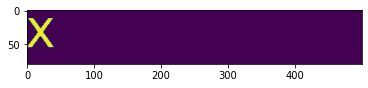

In [103]:
path='/Users/Alireza/Desktop/Datasets/covid4237/'
TextImage2NumpyArray(path)

/Users/Alireza/Desktop/Datasets/covid4237/TextImage/A.png
Number of objects is 2
number of objects 2
initial points 12 16 1.0
val: 1
621
2
13 16 1.0
2 [[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]
3
12 17 1.0
3 [[0. 0. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
4
12 18 1.0
4 [[0. 0. 0.]
 [3. 4. 0.]
 [0. 0. 0.]]
5
12 19 1.0
5 [[0. 0. 0.]
 [4. 5. 0.]
 [0. 0. 0.]]
6
12 20 1.0
6 [[0. 0. 0.]
 [5. 6. 0.]
 [0. 0. 0.]]
7
12 21 1.0
7 [[0. 0. 0.]
 [6. 7. 0.]
 [0. 0. 0.]]
8
13 22 1.0
8 [[7. 0. 0.]
 [0. 8. 0.]
 [0. 0. 0.]]
9
14 23 1.0
9 [[8. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
10
15 23 1.0
10 [[ 0.  9.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]
11
16 23 1.0
11 [[ 0. 10.  0.]
 [ 0. 11.  0.]
 [ 0.  0.  0.]]
12
17 24 1.0
12 [[11.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  0.]]
13
18 24 1.0
13 [[ 0. 12.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  0.]]
14
19 25 1.0
14 [[13.  0.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  0.]]
15
20 25 1.0
15 [[ 0. 14.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  0.]]
16
21 25 1.0
16 [[ 0. 15.  0.]
 [ 0. 16.  0.]
 [ 0.  0.  0.]]
17
22 26 1.0
17 [[16.

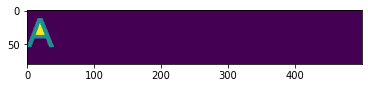

In [100]:
path='/Users/Alireza/Desktop/Datasets/covid4237/'
Text2Image('A',path,'A.png')
BorderAlphabet2Numpy(path,'A.png',1)

NameError: name 'TextImage2NumpyArray' is not defined

In [37]:
12%5

2

In [52]:

arr_aplphabet='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
for i in range(len(arr_aplphabet)):
   print(arr_aplphabet[i%len(arr_aplphabet)])

0
1
2
3
4
5
6
7
8
9
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [61]:
meet=np.array([[0,1,2,3,4,5],[10,11,12,13,14,15],[20,21,22,23,24,25],[30,31,32,33,34,35]])

In [62]:
meet

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35]])

In [77]:
a=meet[1:4,1:4]
a


array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [91]:
np.sum((a<32) & (a>0))

7

In [86]:
a[(a>2) & (a<8)]

array([], dtype=int64)